# Projet 2 - Analyse des données de systèmes éducatifs

## 1. Introduction à la problématique

### Objectives

* Valider la qualité du jeu de données
* Décrire les informations contenues dans le jeu de données
    * regarder les informations sur les données, indicateurs
* Selectionner les information pertinentes pour répondre à la problématique
    * identifier les bonnes indicateurs
* Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour différents groupes
    * identifier les groupes pertinents
    * définier les indicateurs et leurs ordres de grandeurs
    * analysez les données
* Présentez l'analyse de données / le travail fait
    * faires des graphiques pertinents et lisible
    * formuler une synthèse

### Contexte
Une start-up de la EdTech propose des contenus de formation en ligne pour un public de niveau lycée et université et considère une expansion à l'international

### Questions générales
* Quels sont les pays avec un fort potentiel de clients pour les services de la start-up ?
* Pour chacun de ces pays, quel sera l'évolution de ce potentiel de clients ?
* Dans quel pays l'enterprise doit-elle opérer en priorité ?

### Questions spécifiques
* Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
* Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
* Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
* Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

### Ressources
Les données de la Banque mondiale : 
* https://datacatalog.worldbank.org/dataset/education-statistics
* http://datatopics.worldbank.org/education/

## 2. Tour des Données

### 2.1. Préparation des Outils
* imports des libraries Python spécialisées : numpy, matplotlib, pandas, seaborn, ... après les avoir installer avec pip
* définir la configuration des modules graphiques

In [1]:
#imports: regular expresssions and operating system
import re,os, math

#data modules
import numpy as np
import pandas as pd
import scipy as sp

#graphic modules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set() #sets the theme of seaborn
#creates static png images of the plots within the notebook (other option: 'notebook' for interactive plots)
%matplotlib inline 

### 2.2 Import des données

In [3]:
#import data locally
#(could do it remotely)
PATH_TO_DATA = os.getcwd() + '\\Edstats_csv'

RAW_DATA = pd.read_csv(PATH_TO_DATA +'\\EdStatsData.csv')
COUNTRY_DATA = pd.read_csv(PATH_TO_DATA +'\\EdStatsCountry.csv')
COUNTRYSERIES_DATA = pd.read_csv(PATH_TO_DATA +'\\EdStatsCountry-Series.csv') 
FOOTNOTE_DATA = pd.read_csv(PATH_TO_DATA +'\\EdStatsFootNote.csv')
SERIES_DATA = pd.read_csv(PATH_TO_DATA +'\\EdStatsSeries.csv')


DATA_ALL_DIC = {"Data" : RAW_DATA, "Country Data" : COUNTRY_DATA, "Country Series" : COUNTRYSERIES_DATA,
            "Series Data" : SERIES_DATA, "Footnote Data" : FOOTNOTE_DATA}

### 2.3 Comprendre les bloques des données
* premiers tentatives de regarder les données de plus près
    * info(), head(), describe(), shape()
* comprendre l'organisation des données, les reférences entre les differents fichiers / données
* utiliser l'aide de visulisation de la Banque mondiale : https://databank.worldbank.org/source/education-statistics-%5E-all-indicators/Type/TABLE/preview/on
* lire la documentation sur les données

In [4]:
def show_data_info(dataname, data):
    print(50*'*')
    print(10*'*',dataname,10*'*')
    print(30*'-')
    print(f'The dataframe has the dimensions: {data.shape}')
    print(30*'-')
    print(10*'*','head()',10*'*')
    print(data.head())
    print(30*'-')
    print(10*'*','info()',10*'*')
    print(data.info())
    print(30*'-')
    print(10*'*','describe()',10*'*')
    print(data.describe())
    print(50*'_')

In [5]:
#have a quick first look at the data
for k,v in DATA_ALL_DIC.items():
    show_data_info(k,v)

**************************************************
********** Data **********
------------------------------
The dataframe has the dimensions: (886930, 70)
------------------------------
********** head() **********
  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1 

#### 
    

#### Résumé: Data Series - EdstatsData.csv

* Il y a **886930 lignes** et **70 colonnes**.


* **Les colonnes 0 à 3 sont des identificateurs** de la data (pays (2x) et data series (2x))
    - La data est de type 'object'.
    - La data est complète : tous les 886930 lignes sont non-null.
    - Ce sont les pays et les variables. (nom et code)
* **Les colonnes 4 à 68 sont des années**
    - Ce sont 65 colonnes.
    - La data est de type 'float64' : soit quantitatif (discrète ou continue) soit ordinal qualitatif.
    - La data n'est pas très complète. (Une estimation rapide: moins que 10% sont non-null)
    - Les années vont de 1970 à 2100.
        * Les dates dans le future doivent être des projections.
* **La colonne 69 est vide**.


* **Ici, on trouve la data sur les variables éducatives des différents pays**.

#### Résumé: Country Data - EdstatsCountry.csv

* Il y a **241 lignes** et **32 colonnes**.


* **Les colonnes 0 à 3 sont des identificateurs**
    - La data est de type 'object'.
    - La data est complète: tous les 271 lignes sont non-null.
    - Ce sont le code et noms de pay / région.
* **Les colonnes 4 à 30 donnent plus des informations sur les pays**
    - Ce sont 27 colonnes.
    - La plus part de la data est de type 'object'
        * sauf les colonnes 11, 28 et 29. Elles sont des 'float64' et donnent des années.
    - La data est plutôt complète. (Une estimation rapide: pour la plus part, plus que 60% des entrées sont non-null.)
* **La colonne 31 est vide**.


* **Ce tableau relie le 'code pays' à plus d'informations sur le pays/la région, c'est-à-dire le nom court et long, la description de la région et donne des infos caractèristiques sur les pays (devise, région, classment, dernière data d'enquète, etc. )**
* Il y a **241 différents classifications de pays / région.**

#### Résumé: Country Series - EdstatsCountry-Series.csv

* Il y a **613 lignes** et **4 colonnes**.


* **Les colonnes 0 à 1 sont des identificateurs**.
    - La data est de type 'object'.
    - La data est complète: tous les 613 lignes sont non-null.
    - Ce sont les codes de pays et de la variable.
* **La colonnes 3 donne la déscription de la variable du pays**.
    - La la data est de type 'object' : qualitatif nominale.
    - La data est complète.
* **La colonne 3 est vide**.


* **Ce tableau donne des déscriptions de certaines variables d'un pays**.

#### Résumé: Series Data - Edstats-Series.csv

* Il y a **3665 lignes** et **21 colonnes**.


* **La colonnes 0 est l'identificateur**.
    - La data est de type 'object'.
    - C'est le code de la variable. 
* **Les colonnes 1 à 4 donnent la définition de la variable**.
    - La data est de type 'object' : qualitatif nominale.
    - La data est presque complète.
        * sauf la colonne 3, pas tous les variable ont une définition courte ('Short Description).
* **Les colonnes 5 à 19 donnent plus des détails sur la variable**.
    - La data est de type 'object'.
    - Ces colonnes ne sont pas bien remplies à l'exception de la colonne 13.
        * **Les colonnes 5, 11, 17, 18, 19 sont complètement vides**.
        * **La colonne 13 est complète. Elle donne la source de la data.**    
* **La colonne 20 est vide**.


* **Ce tableau relie le code d'une variable ('series code') avec son nom, sa définition et sa source**.

#### Résumé: Footnote Data - EdstatsFootnote.csv

* Il y a **643638 lignes** et **5 colonnes**.


* **Les colonnes 0 à 2 sont des identificateurs**
    - La data est de type 'object'.
    - La data est complète. 
    - Ce sont les pays,les variables et l'année.
* **La colonne 3 est une description**
    - La data est de type 'object' .
    - La data est complète. 
* **La colonne 4 est vide**.


* **Ce tableau des notes de bas de page sur les datas**.
    - les variables éducatives des différents pays pour un année.

#### Résumé: 

Pour l'analyse de données on va principalement avoir besoin de:
* EdstatsData.csv, qui contient les données à analyser
    - un point de données est donné par les parametres: variable, pays/régions, année
* EdstatsSeries.csv, qui contient les définitions des variables
* EdstataCountry.csv, qui contient les définitions des pays, régions et groupes de pays

### 2.2 La qualité du jeu de données
* Re-formater le jeu de données
    * laisser tomber les colonnes indices dupliquées
    * travailler avec les codes de pays/région et de variable
    * re-nommer les indices/colonnes des parametres ('indicator', 'country', 'year')
* Regarder l'exhaustivité de l'ensemble de données 
    * données manquantes, dupliquées
    * Nombre d'unique variables, pays (lignes) et nombre d'années (colonnes)

In [6]:
def empty_rows(data):
    '''return a list with the indices of the empty rows'''
    tmp = data.notna().T.sum()
    return [tmp.index[i] for i,s in enumerate(tmp) if s == 0 ]

def empty_columns(data):
    '''returns a list with the column names of the empty columns'''
    tmp = data.notna().sum()
    return [tmp.index[i] for i,s in enumerate(tmp) if s == 0 ]

In [7]:
ALL_COUNTRIES = RAW_DATA['Country Code'].unique()
ALL_INDICATORS = RAW_DATA['Indicator Code'].unique()
#the first four columns are ID columns and the last column is empty.
data = RAW_DATA.iloc[:,4:-1]
ALL_YEARS = data.columns.values
num_cc = len(ALL_COUNTRIES)
num_ind = len(ALL_INDICATORS)
num_yyyy = len(ALL_YEARS)
print("Unique countries :", num_cc)
print("Unique indicators:", num_ind)
print("Number of unique country-indicator indices :", num_cc*num_ind)
print("Number of years for which there is data:", num_yyyy)
print("Total number of data points :", num_cc*num_ind*num_yyyy)
print(f"{data.isna().sum().sum()} data points are empty = {100*data.isna().sum().sum()/(num_cc*num_ind*num_yyyy)}%.")

print(f"There are {len(data.index.values)} rows.")
print(f"There are {len(empty_rows(data))} empty rows = {100*len(empty_rows(data))/len(data.index.values)}%.")
print(f"There are {len(data.columns.values)} columns.")
print(f"There are {len(empty_columns(data))} empty columns = {100*len(empty_columns(data))/len(data.columns.values)}%")

Unique countries : 242
Unique indicators: 3665
Number of unique country-indicator indices : 886930
Number of years for which there is data: 65
Total number of data points : 57650450
52568249 data points are empty = 91.18445562870714%.
There are 886930 rows.
There are 529525 empty rows = 59.703133279965726%.
There are 65 columns.
There are 0 empty columns = 0.0%


#### Résume : données en générale

* **242 uniques pays/régions**
* **3665 uniques variables**
* **65 années**


* **886930 combinisons de pays-variable**
    * C'est égal au nombre des lignes. **Il n'y a pas des duplicates dans les donnés**. (sauf s'il y a des erreur de mise en forme.)
    * Mais 529525 lignes sont vides. Il n'y a pas tous les variables pour tous les pays.
    * **approx. 60% des lignes sont vides**.


* **65 années**
    * Il n'y aucune année pour laquelle il n'y a pas aucune entrée.


* **57650450 combinisons de pays-variable-année**
    * **Moins de 10% des données sont complètes.**

## 3. Nettoyer les données

* regarder les pays, les variables et les années de plus près
    * choisir des pays et des régions / zones géographiques, écarter les groupes de pays non-géographiques
    * réduire les années aux 2000 à 2050
    * choisir les variables pertinents à la problématique
   

### 3.1 Les pays et les régions
* choisir les pays et les régions
* écarter les groupes de pays non-géographiques
* diviser en pays et régions geographiques
* utiliser EdstatsCountry.csv' / 'Country Data' / COUNTRY_DATA

In [8]:
ALL_COUNTRIES_COUNTRY = COUNTRY_DATA['Country Code'].unique()
print("Countries in Country Data :\t", len(ALL_COUNTRIES_COUNTRY))
print("Countries in the Data Series :\t", len(ALL_COUNTRIES))

Countries in Country Data :	 241
Countries in the Data Series :	 242


In [9]:
#look at the set differences to see if the Country codes in the two data set are the same 
#See what the extra country in the Data Set.
print("Set difference of the countries in Data Series and Country Data: ",set(ALL_COUNTRIES)-set(ALL_COUNTRIES_COUNTRY))

Set difference of the countries in Data Series and Country Data:  {'VGB'}


In [10]:
cc = 'VGB'
print(f'The country name of {cc} is\n{ RAW_DATA[RAW_DATA["Country Code"] == cc]["Country Name"] }.')

The country name of VGB is
190580    British Virgin Islands
190581    British Virgin Islands
190582    British Virgin Islands
190583    British Virgin Islands
190584    British Virgin Islands
                   ...          
194240    British Virgin Islands
194241    British Virgin Islands
194242    British Virgin Islands
194243    British Virgin Islands
194244    British Virgin Islands
Name: Country Name, Length: 3665, dtype: object.


In [11]:
#see if there is actual data for VBG = British Virgin Islands, 
# and if there is potentially another code, i.e. if there is a formatting error
RAW_DATA[RAW_DATA['Country Code']=='VGB'].info()
print()
print(COUNTRY_DATA[COUNTRY_DATA['Long Name'].str.contains('Brit|United Kingdom|Island|Virg', flags=re.IGNORECASE, regex=True)]['Long Name'].values)
print(COUNTRY_DATA[COUNTRY_DATA['Short Name'].str.contains('Brit|United Kingdom|Island|Virg', flags=re.IGNORECASE, regex=True)]['Short Name'].values)
print(COUNTRY_DATA[COUNTRY_DATA['Table Name'].str.contains('Brit|United Kingdom|Island|Virg', flags=re.IGNORECASE, regex=True)]['Table Name'].values)
print()
print(COUNTRY_DATA[COUNTRY_DATA['Short Name']=='Virgin Islands'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 190580 to 194244
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3665 non-null   object 
 1   Country Code    3665 non-null   object 
 2   Indicator Name  3665 non-null   object 
 3   Indicator Code  3665 non-null   object 
 4   1970            10 non-null     float64
 5   1971            29 non-null     float64
 6   1972            25 non-null     float64
 7   1973            31 non-null     float64
 8   1974            22 non-null     float64
 9   1975            38 non-null     float64
 10  1976            38 non-null     float64
 11  1977            12 non-null     float64
 12  1978            12 non-null     float64
 13  1979            38 non-null     float64
 14  1980            13 non-null     float64
 15  1981            39 non-null     float64
 16  1982            7 non-null      float64
 17  1983            32 non-nul

#### Résumé: 'Country Code'
* Les 241 'Country Code' dans la 'Country Data' (EdstatsCountry.csv) sont les même que dans le 'Data Series' (EdstatsData.csv).
* Il y a un pays en plus dans le 'Data Series' : Les îles vierges britanniques avec le code 'VGB'.

In [12]:
for cc in ALL_COUNTRIES: 
    print(COUNTRY_DATA[COUNTRY_DATA['Country Code'] == cc].loc[:,['Country Code',
                                                                  'Table Name',
                                                                  'Long Name',
                                                                  'Region',
                                                                  'Income Group']].values)

[['ARB' 'Arab World' 'Arab World' nan nan]]
[['EAS' 'East Asia & Pacific (all income levels)'
  'East Asia & Pacific (all income levels)' nan nan]]
[['EAP' 'East Asia & Pacific' 'East Asia & Pacific (developing only)' nan
  nan]]
[['EMU' 'Euro area' 'Euro area' nan nan]]
[['ECS' 'Europe & Central Asia (all income levels)'
  'Europe & Central Asia (all income levels)' nan nan]]
[['ECA' 'Europe & Central Asia' 'Europe & Central Asia (developing only)'
  nan nan]]
[['EUU' 'European Union' 'European Union' nan nan]]
[['HPC' 'Heavily indebted poor countries (HIPC)'
  'Heavily indebted poor countries (HIPC)' nan nan]]
[['HIC' 'High income' 'High income' nan nan]]
[['LCN' 'Latin America & Caribbean (all income levels)'
  'Latin America & Caribbean (all income levels)' nan nan]]
[['LAC' 'Latin America & Caribbean'
  'Latin America & Caribbean (developing only)' nan nan]]
[['LDC' 'Least developed countries: UN classification'
  'Least developed countries: UN classification' nan nan]]
[['LMY' 'L

[['PRT' 'Portugal' 'Portuguese Republic' 'Europe & Central Asia'
  'High income: OECD']]
[['PRI' 'Puerto Rico' 'Puerto Rico' 'Latin America & Caribbean'
  'High income: nonOECD']]
[['QAT' 'Qatar' 'State of Qatar' 'Middle East & North Africa'
  'High income: nonOECD']]
[['ROU' 'Romania' 'Romania' 'Europe & Central Asia' 'Upper middle income']]
[['RUS' 'Russian Federation' 'Russian Federation' 'Europe & Central Asia'
  'High income: nonOECD']]
[['RWA' 'Rwanda' 'Republic of Rwanda' 'Sub-Saharan Africa' 'Low income']]
[['WSM' 'Samoa' 'Samoa' 'East Asia & Pacific' 'Lower middle income']]
[['SMR' 'San Marino' 'Republic of San Marino' 'Europe & Central Asia'
  'High income: nonOECD']]
[['STP' 'São Tomé and Principe'
  'Democratic Republic of São Tomé and Principe' 'Sub-Saharan Africa'
  'Lower middle income']]
[['SAU' 'Saudi Arabia' 'Kingdom of Saudi Arabia'
  'Middle East & North Africa' 'High income: nonOECD']]
[['SEN' 'Senegal' 'Republic of Senegal' 'Sub-Saharan Africa'
  'Lower middle inc

In [13]:
COUNTRY_DATA[COUNTRY_DATA['Country Code'] == 'ARB']['Special Notes'].values

array(['Arab World aggregate. Arab World is composed of members of the League of Arab States.'],
      dtype=object)

In [14]:
print(np.where(ALL_COUNTRIES == 'WLD'))
print(ALL_COUNTRIES[:25])
print(ALL_COUNTRIES[25:])

print(COUNTRY_DATA['Region'].unique())

droplist = ['ARB','EAP','ECA','EMU','EUU','HPC','HIC','LAC','LDC','LMY','LIC','LMC','MNA','MIC','OED','SSA','UMC','WLD']

def drop_elements(elementarray, droplist):
    return np.array([el for el in elementarray if el not in droplist])

ALL_COUNTRIES = drop_elements(ALL_COUNTRIES, droplist)
REGIONS = ALL_COUNTRIES[:7]
COUNTRIES = ALL_COUNTRIES[7:]
#reduce the Data Series
DATA = RAW_DATA[RAW_DATA['Country Code'].isin(ALL_COUNTRIES)]

(array([24], dtype=int64),)
['ARB' 'EAS' 'EAP' 'EMU' 'ECS' 'ECA' 'EUU' 'HPC' 'HIC' 'LCN' 'LAC' 'LDC'
 'LMY' 'LIC' 'LMC' 'MEA' 'MNA' 'MIC' 'NAC' 'OED' 'SAS' 'SSF' 'SSA' 'UMC'
 'WLD']
['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN'
 'CYM' 'CAF' 'TCD' 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV'
 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV'
 'GNQ' 'ERI' 'EST' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO'
 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI'
 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA'
 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'PRK' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO'
 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MKD' 'MDG' 'MWI'
 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG'
 'MNE' 'MAR' 'M

#### Résumé : pays et régions

* Il y a 25 régions / groupements de pays dont 18 sont des groupement économiques ou politiques
* **Garde 7 régions** et **217 pays** = **224 pays et régions**

### 3.2 Les années
* réduire les nombre des années à une plage pertinente : 2000 à 2050.
    * les dernières 20 années et les futures 30 années pour voir l'évolution.
* diviser les années and deux groups : dates passées et dates futures.
    * La base de données était mise à jour en 2020.

In [15]:
ALL_YEARS = np.array([y for y in ALL_YEARS if int(y) >= 2000 and int(y) <= 2050])

l = len(RAW_DATA.index.values)
for y in ALL_YEARS:
    d = RAW_DATA.loc[:,y].count()
    print(f"For {y}, there are {d} entries. {round(100*d/l,1)}% of the rows are filled.")

YEARS = np.array([y for y in ALL_YEARS if int(y) <= 2017])
YEARS_PROJ = np.array([y for y in ALL_YEARS if int(y) >= 2020])

print(YEARS)
print(YEARS_PROJ)

For 2000, there are 176676 entries. 19.9% of the rows are filled.
For 2001, there are 123509 entries. 13.9% of the rows are filled.
For 2002, there are 124205 entries. 14.0% of the rows are filled.
For 2003, there are 130363 entries. 14.7% of the rows are filled.
For 2004, there are 128814 entries. 14.5% of the rows are filled.
For 2005, there are 184108 entries. 20.8% of the rows are filled.
For 2006, there are 140312 entries. 15.8% of the rows are filled.
For 2007, there are 137272 entries. 15.5% of the rows are filled.
For 2008, there are 134387 entries. 15.2% of the rows are filled.
For 2009, there are 142108 entries. 16.0% of the rows are filled.
For 2010, there are 242442 entries. 27.3% of the rows are filled.
For 2011, there are 146012 entries. 16.5% of the rows are filled.
For 2012, there are 147264 entries. 16.6% of the rows are filled.
For 2013, there are 137509 entries. 15.5% of the rows are filled.
For 2014, there are 113789 entries. 12.8% of the rows are filled.
For 2015, 

In [16]:
#reduce the years
print(DATA.columns.values[0:3])
print(ALL_YEARS)
DATA = DATA.filter(list(DATA.columns.values[0:4]) + list(ALL_YEARS))
DATA.info()

['Country Name' 'Country Code' 'Indicator Name']
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025'
 '2030' '2035' '2040' '2045' '2050']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 820960 entries, 3665 to 886929
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    820960 non-null  object 
 1   Country Code    820960 non-null  object 
 2   Indicator Name  820960 non-null  object 
 3   Indicator Code  820960 non-null  object 
 4   2000            170693 non-null  float64
 5   2001            117498 non-null  float64
 6   2002            118168 non-null  float64
 7   2003            124321 non-null  float64
 8   2004            122758 non-null  float64
 9   2005            177999 non-null  float64
 10  2006            134198 non-null  float64
 11  2007            131149 non-null  float64
 12  2008     

#### Résumé : années

* Les nombre des entrées pour les années 2020 à 2050 sont égal. Ce sont des projections qui sont fait pour des intervalles de 5 ans.
* Il semble que **les données les plus actuelles viennent de 2017**. Après, ce sont de projections.

### 3.3 Les variables
* regarder les déscriptions des variables pour voir si elles sont pertinentes.
* choisir les variables pertinents:
    * infrastructure : internet, usage ordinateur, ...
    * cible : niveau education = BAC+ / universitaire
    * marché : nombre des potentiels clients, moyennes financières, ...
* utiliser 'EdstatsSeries.csv' / 'Series Data' / SERIES_DATA

In [17]:
ALL_INDICATORS_SERIES = SERIES_DATA['Series Code'].unique()
print("Indicators in Series Data :\t", len(ALL_INDICATORS_SERIES))
print("Indicators in the Data Series :\t", len(ALL_INDICATORS))

Indicators in Series Data :	 3665
Indicators in the Data Series :	 3665


In [18]:
#Verify that the 'Indicator Code' and the 'Series Code' are the indeed the same in the Data Series and the Series Data,
#even if they have the same number of unique elements.

print("Set difference of the indicators in the Data Series and Series Data:\n\n",set(ALL_INDICATORS)-set(ALL_INDICATORS_SERIES))
print()
print("Set difference of the indicators in the Series Data and Data Series:\n\n",set(ALL_INDICATORS_SERIES)-set(ALL_INDICATORS))
print()

ALL_INDICATORS = np.array([i.upper().strip() for i in ALL_INDICATORS])
ALL_INDICATORS_SERIES = np.array([i.upper().strip() for i in ALL_INDICATORS_SERIES])

print("Set difference of the indicators in the Data Series and Series Data:\n\n",set(ALL_INDICATORS)-set(ALL_INDICATORS_SERIES))
print()
print("Set difference of the indicators in the Series Data and Data Series:\n\n",set(ALL_INDICATORS_SERIES)-set(ALL_INDICATORS))
print()

Set difference of the indicators in the Data Series and Series Data:

 {'UIS.LP.AG15T99', 'UIS.THAGE.3.A.GPV', 'UIS.THAGE.0', 'UIS.LP.AG65.M', 'UIS.SLE.1T6.GPI', 'UIS.LP.AG15T99.F', 'UIS.AIR.1.GLAST.GPI', 'UIS.E.4.PU', 'UIS.XGDP.FSGOV.FDINSTADM.FFD', 'UIS.NIR.1.AGM1.F', 'UIS.NIR.1.AGP1.M', 'UIS.NIR.1.AGP1.F', 'UIS.E.3.PU.F', 'UIS.LPP.AG65', 'UIS.LP.AG15T24', 'UIS.E.23.PU.F', 'UIS.LP.AG15T24.M', 'UIS.E.1.GUK.F', 'UIS.XPUBP.0', 'UIS.LR.AG15T99.GPI', 'UIS.LR.AG65.F', 'UIS.NIR.1.AGP1', 'UIS.NIR.1.AGM1.M', 'UIS.LPP.AG15T99', 'UIS.E.2.PU.F', 'UIS.NIR.1.AGM1', 'UIS.XGDP.0.FSGOV.FDINSTADM.FFD', 'UIS.E.1.GUK', 'UIS.OE.56.40510', 'UIS.THDUR.0', 'UIS.XSPENDP.56.FDPUB.FNCAP', 'UIS.E.0.PU.F', 'UIS.XPUBP.4', 'UIS.FOSEP.56.FUK.F', 'UIS.TRANRA.23.GPV.GPI', 'UIS.E.1.PU.F', 'UIS.GER.1T6.M', 'UIS.THAGE.4.A.GPV', 'UIS.XGDP.1.FSGOV.FDINSTADM.FFD', 'UIS.GER.1T6.GPI', 'UIS.GER.1T6.F', 'UIS.E.1.PU', 'UIS.XSPENDP.56.FDPUB.FNNONS', 'UIS.E.4.PU.F', 'UIS.LR.AG65.M', 'UIS.E.23.PU', 'UIS.LP.AG65', 'UIS.SR.1.GLAST.G

In [19]:
#look more closely at the topics and choose the indicators that are relevant.
#Have a look at the topics to see which might be potentially interesting
TOPICS = SERIES_DATA['Topic'].unique()
print(f"There are {len(TOPICS)} different topics:\n")
data = SERIES_DATA['Topic']
print(data.value_counts())

There are 37 different topics:

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                        

#### Résumé: 'Indicator Code'
* Il y a des erreurs de mise en forme entre les deux fichiers 'EdstatsSeries.csv' ('Series Data' / SERIES_DATA) et 'EdstatsData.csv' ('Data Series' / RAW_DATA).
    * miniscule/majoscule et des espaces qui traînnent.
* Les 'Indicator Code' dans le Data Series et équivalent au 'Series Code' dans le Series Data.
* Il y **3665 unique indicateurs et 37 thématiques**.

In [20]:
#Look at little more closely at the indicators that are provided - especially under topics potentially of interest.

interesting_topics = ['Attainment']
interesting_topics = ['Pre-Primary','Primary', 'Early Childhood Education']
interesting_topics = ['Secondary', 'Tertiary', 'Post-Secondary/Non-Tertiary']
#interesting_topics = ['Infrastructure: Communications', 'Expenditures']
#interesting_topics = ['EMIS','Education Management Information Systems (SABER)','Tertiary Education (SABER)','Teachers (SABER)']
#interesting_topics = ['Learning Outcomes']
#interesting_topics = ['Teachers']
#interesting_topics = ['Population','Health: Population: Structure', 'Health: Population: Dynamics']
#interesting_topics = ['Education Equality']
#interesting_topics = ['Expenditures']
#interesting_topics = ['Laber','Background']
#interesting_topics = []
#interesting_topics = ['Economic Policy & Debt: Purchasing power parity',
#                      'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 
#                      'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
#                      'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']
interesting_topics = ['Secondary', 'Tertiary']

for topic in interesting_topics:
    print(topic)
    print(50*'-')
    data = SERIES_DATA[SERIES_DATA['Topic'] == topic].loc[:,['Series Code','Indicator Name']]
    for name in data.values:
        print(name[0], name[1],sep="\t--")
    print(50*'_')

Secondary
--------------------------------------------------
SE.ENR.PRSC.FM.ZS	--Gross enrolment ratio, primary and secondary, gender parity index (GPI)
SE.ENR.SECO.FM.ZS	--Gross enrolment ratio, secondary, gender parity index (GPI)
SE.SEC.AGES	--Official entrance age to lower secondary education (years)
SE.SEC.CMPT.LO.FE.ZS	--Lower secondary completion rate, female (%)
SE.SEC.CMPT.LO.MA.ZS	--Lower secondary completion rate, male (%)
SE.SEC.CMPT.LO.ZS	--Lower secondary completion rate, both sexes (%)
SE.SEC.DURS	--Theoretical duration of secondary education (years)
SE.SEC.DURS.LO 	--Theoretical duration of lower secondary education (years)
SE.SEC.DURS.UP	--Theoretical duration of upper secondary education (years)
SE.SEC.ENRL	--Enrolment in secondary education, both sexes (number)
SE.SEC.ENRL.FE	--Enrolment in secondary education, female (number)
SE.SEC.ENRL.FE.VO.ZS	--Percentage of female students in secondary education enrolled in vocational programmes, female (%)
SE.SEC.ENRL.FE.ZS	--

UIS.E.3.PU	--Enrolment in upper secondary education, public institutions, both sexes (number)
UIS.E.3.Pu.F	--Enrolment in upper secondary education, public institutions, female (number)
UIS.E.3.V	--Enrolment in upper secondary vocational, both sexes (number)
UIS.E.3.V.F	--Enrolment in upper secondary vocational, female (number)
UIS.FEP.2	--Percentage of students in lower secondary education who are female (%)
UIS.FEP.2.GPV	--Percentage of students in lower secondary general education who are female (%)
UIS.FEP.2.V	--Percentage of students in lower secondary vocational education who are female (%)
UIS.FEP.3	--Percentage of students in upper secondary education who are female (%)
UIS.FEP.3.GPV	--Percentage of students in upper secondary general education who are female (%)
UIS.FEP.3.V	--Percentage of students in upper secondary vocational education who are female (%)
UIS.FOFSTP.2	--Out-of-school adolescents of lower secondary school age, percentage female (%)
UIS.FOFSTP.3	--Out-of-school

#### Notes: les indicators, leurs definitions, et les thematiques


### Les indicators pertinents

#### 'Attainment'
* Les études mesures le niveau scolaire de la population.
* Il y 3 études / sources :
    - Barro-Lee
    - Projection
    - UIS ("The UNESCO Institute for Statistics")

* ISCED = International Standard Classification of Education
* https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education
    * rédefiné en 2011 (ancienne definition date de 1997)
* ISCED 3 = Upper Secondary Education = Lycée
* ISCED 6+ = Bachelors and higher / Tertiary Education = Université

#### 'Secondary', 'Tertiary'
* Ces thèmes ont des indicateurs interessantes:
    - complètion de niveau 'upper secondary' et 'tertiary'
* information sur taux d'inscription, nombre total d'inscriptions, hors-école, achèvement, système, infrastructures, ...

#### 'Infrastructure: Communications'
* il y a deux indicators: 
    - usage des ordinateurs : "Personal computers (per 100 people)"
    - usage de l'internet : "Internet users (per 100 people)"
* très important pour une service en ligne

#### 'Population',  'Health: Population: Structure', 'Health: Population: Dynamics'
* Donne informations sur la démographique et sa croissance

#### 'Learning outcomes'
* Différentes études évaluent la qualité / les résultats d'apprentissage des systèmes éducatifs dans les différents pays.
* Les thèmes abordés entre autres sont : la lecture, les différentes langues, les sciences, les mathématiques.
* La plus part des études regardent les compétences de l'enseignement primaire. On les ignore.
* PIAAC regarde les compétences génerals des adults
    - "The Programme for the International Assessment of Adult Competencies (PIAAC) is a programme of assessment and analysis of adult skills."
    - Il y a un indicateur qui montre le percentage des adultes qui on échoué dans le test basique ICT:
        + "the ICT core test, which assesses basic ICT skills, such as the capacity to use a mouse or scroll through a web page, needed to take the computer-based assessment."
* PISA regarde les compétences des jeunes de l'âge de 15 ans.
* TIMSS regarde les compétences en sciences et mathématiques pour '4th' et '8th' grade.

#### 'Education Equality'
* Les études regardent le niveau scolaire de la population, mais aussi la distribution entre homme/femme, rich/pauvre et urban/rural
* Il y a études / sources:
    - DHS (The Demographic and Health Surveys (DHS) Program ): regarde 'primary', 'secondary' et 'post secondary' scolarité.
    - MICS ("Multiple Indicator Cluster Surveys" de UNICEF): regarde 'primary', 'secondary', et le moyen nombre d'années de scolarité 15+ et 15-19.
    - UIS : ne regarde que la scolarité justqu'au niveau 'lower secondary' = collège.

#### 'Economic Policy & Debt: Purchasing power parity', 'Economic Policy & Debt: National accounts: US at current prices: Aggregate indicators', Economic Policy & Debt: National accounts: US at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
* Le GDP et GNI: donne information sur la taille de l'economie du pays.
* "Purchasing power parity (PPP) is a measurement of prices in different countries that uses the prices of specific goods to compare the absolute purchasing power of the countries' currencies."



### Les thématiques pas pertinents
Certaines pourraient peut-être être intéressantes pour une analyse plus poussée.


#### 'SABER', 'EMIS'
* Ce sont des indicateurs liés aux politiques. Pourrait potentiellement montrer les efforts des pays pour améliorer leurs systèmes éducatifs. Mais sont difficiles à interpréter à ce stade.
SABER = Systems Approach for Better Education Results

* https://www.worldbank.org/en/topic/education/brief/systems-approach-for-better-education-results-saber 
* "SABER is an initiative to produce comparative data and knowledge on education policies and institutions, with the aim of helping countries systematically strengthen their education systems and the ultimate goal of promoting Learning for All."
* The indicators labeled SABER refer to policiy goals and the evaluation towards achieving these goals.

EMIS = Education Management Information Systems

* http://wbgfiles.worldbank.org/documents/hdn/ed/saber/supporting_doc/Background/EMIS/SABER_EMIS_Training_Manual_August2015.pdf
* "An education management information system is responsible for producing and monitoring education statistics within an education system."
* "SABER’s EMIS policy domain aims to help countries identify areas for improvement in data collection, data and system management, and data use in decision making and improving the different elements of the education system."


#### 'Pre-Primary', 'Primary', 'Early Childhood Education', 'Post-Secondary/Non-Tertiary'

#### 'Teachers'
* Information sur le nombre, la salaire et l'éducation des enseignants pour les différents niveaux.

#### 'Expenditures'
* Informations sur les dépenses des pays pour leurs systhèmes éducatifs.

#### 'Literacy'
* Informations sur l'alphabétisation de la population. Ces indicateurs ne sont pas intéressants, car on peut assumer que quelqu'un avec un Baccalauréat sait lire.

#### 'Laber'
* Inforamtion sur la pourcentage des jeunes sans occupation (pas scolarisés, pas en formation et sans travaille).

#### 'Background'
* Informations sur la durée de la scolarisation obligatoire et l'âge d'entrée.

#### 'Social Protection & Labor: Labor force structure', 'Social Protection & Labor: Unemployment'

#### 'Health: Risk factors', 'Health: Mortality'






#### Notes: unités 

* percentage de la population 
* population / population en milliers
* nombre moyen des années (e.g. de scolarité)
* taux, ratios (scolarisation, abandon, fem/masc, ....)
* nombre moyen d'étudiants par X (class, livres, ...)

#### 3.3.1 Selectionner les données pertinentes

<b>Liste des indicateurs potentiellement pertinents</b> :

* Internet users (per 100 people)(IT.NET.USER.P2)
* Personal computers (per 100 people)(IT.CMP.PCMP.P2)


* Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary (BAR.SEC.CMPT.15UP.ZS)
* Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary (BAR.TER.CMPT.15UP.ZS)
* Barro-Lee: Percentage of population age 25+ with secondary schooling. Completed Secondary (BAR.SEC.CMPT.25UP.ZS)
* Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary (BAR.TER.CMPT.25UP.ZS)
* Barro-Lee: Population in thousands, age 15+, total (BAR.POP.15UP)
* Barro-Lee: Population in thousands, age 25+, total (BAR.POP.25UP)
    
    
* Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total (PRJ.ATT.15UP.3.MF)
* Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total (PRJ.ATT.15UP.4.MF)
* Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Upper Secondary. Total (PRJ.ATT.25UP.3.MF)
* Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Total (PRJ.ATT.25UP.4.MF)
* Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total (PRJ.ATT.2024.3.MF)
* Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total (PRJ.ATT.2024.4.MF)
* Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total (PRJ.POP.2024.3.MF)
* Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total (PRJ.POP.2024.4.MF)
* Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total (PRJ.POP.ALL.3.MF)
* Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total (PRJ.POP.ALL.4.MF)
* Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total (PRJ.ATT.ALL.3.MF)
* Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total (PRJ.ATT.ALL.4.MF)
    
    
* UIS: Percentage of population age 25+ with completed upper secondary education. Total (UIS.EA.3.AG25T99)
* UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total (UIS.EA.3T6.AG25T99)
* UIS: Percentage of population age 25+ with at least a completed short-cycle tertiary degree (ISCED 5 or higher). Total (UIS.EA.5T8.AG25T99)
* UIS: Percentage of population age 25+ with at least a completed bachelor's or equivalent degree (ISCED 6 or higher). Total (UIS.EA.6T8.AG25T99)
 
 
* Enrolement in upper secondary education, both sexes (number) (UIS.E.3)
* Enrolment in upper secondary general, both sexes (number) (UIS.E.3.GPV)
* Adjusted net enrolment rate, upper secondary, both sexes (%) (UIS.NERA.3)
* Enrolment in tertiary education, ISCED 5 programmes, both sexes (number) (UIS.E.5.B)
* Enrolment in tertiary education, ISCED 6 programmes, both sexes (number) (UIS.E.6)
* Enrolment in tertiary education, ISCED 7 programmes, both sexes (number) (UIS.E.7)
* Enrolment in tertiary education, ISCED 8 programmes, both sexes (number) (UIS.E.8)
* Graduates from ISCED 5 programmes in tertiary education, both sexes (number) (UIS.G.5.B.T)
* Graduates from ISCED 6 programmes in tertiary education, both sexes (number) (UIS.G.6.T)
* Graduates from ISCED 7 programmes in tertiary education, both sexes (number) (UIS.G.7.T)
* Graduates from ISCED 8 programmes in tertiary education, both sexes (number) (UIS.G.8.T)


* Enrolment in secondary education, both sexes (number) (SE.SEC.ENRL)
* Enrolment in secondary general, both sexes (number) (SE.SEC.ENRL.GC)
* Gross enrolment ratio, upper secondary, both sexes (%)(SE.SEC.ENRR.UP)

* Enrolment in tertiary education, all programmes, both sexes (number) (SE.TER.ENRL)
* Gross enrolment ratio for tertiary education, both sexes (%) (SE.TER.ENRR)
* Graduates from tertiary education, both sexes (number) (SE.TER.GRAD)
* Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)(SE.TER.CMPL.ZS)


* Population, total (SP.POP.TOTL)
* Population growth (annual %) (SP.POP.GROW)
* Population, ages 0-14, total(SP.POP.0014.TO)
* Population, ages 15-24, total(SP.POP.1524.TO.UN)
* Population, ages 15-64, total (SP.POP.1564.TO)
* School age population, upper secondary education, both sexes (number)(SP.SEC.UTOT.IN)
* School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)


* PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test (LO.PIAAC.TEC.YOU.FAILNO)
* PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Failed the ICT Core Test (LO.PIAAC.TEC.FAIL)
* PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience (LO.PIAAC.TEC.NO)


* GDP, PPP (current international US) (NY.GDP.MKTP.PP.CD)
* GDP per capita, PPP (current international US) (NY.GDP.PCAP.PP.CD)
* GDP (current US) (NY.GDP.MKTP.CD)
* GDP per capita (current US) (NY.GDP.PCAP.CD)
* GNI, PPP (current international US) (NY.GNP.MKTP.PP.CD)
* GNI per capita, PPP (current international US) (NY.GNP.PCAP.PP.CD)
* GNI (current US) (NY.GNP.MKTP.CD)
* GNI per capita, Atlas method (current US) (NY.GNP.PCAP.CD)




* HH.DHS.GAR.456	--DHS: Gross attendance rate. Post Secondary
* HH.DHS.GAR.456.F	--DHS: Gross attendance rate. Post Secondary. Female
* HH.DHS.GAR.456.M	--DHS: Gross attendance rate. Post Secondary. Male
* HH.DHS.GAR.456.Q1	--DHS: Gross attendance rate. Post Secondary. Quintile 1
* HH.DHS.GAR.456.Q2	--DHS: Gross attendance rate. Post Secondary. Quintile 2
* HH.DHS.GAR.456.Q3	--DHS: Gross attendance rate. Post Secondary. Quintile 3
* HH.DHS.GAR.456.Q4	--DHS: Gross attendance rate. Post Secondary. Quintile 4
* HH.DHS.GAR.456.Q5	--DHS: Gross attendance rate. Post Secondary. Quintile 5
* HH.DHS.GAR.456.R	--DHS: Gross attendance rate. Post Secondary. Rural
* HH.DHS.GAR.456.U	--DHS: Gross attendance rate. Post Secondary. Urban


* HH.MICS.GAR.456	--MICS: Gross attendance rate. Post Secondary
* HH.MICS.GAR.456.F	--MICS: Gross attendance rate. Post Secondary. Female
* HH.MICS.GAR.456.M	--MICS: Gross attendance rate. Post Secondary. Male
* HH.MICS.GAR.456.Q1	--MICS: Gross attendance rate. Post Secondary. Quintile 1
* HH.MICS.GAR.456.Q2	--MICS: Gross attendance rate. Post Secondary. Quintile 2
* HH.MICS.GAR.456.Q3	--MICS: Gross attendance rate. Post Secondary. Quintile 3
* HH.MICS.GAR.456.Q4	--MICS: Gross attendance rate. Post Secondary. Quintile 4
* HH.MICS.GAR.456.Q5	--MICS: Gross attendance rate. Post Secondary. Quintile 5
* HH.MICS.GAR.456.R	--MICS: Gross attendance rate. Post Secondary. Rural
* HH.MICS.GAR.456.U	--MICS: Gross attendance rate. Post Secondary. Urban


* HH.MICS.YRS.15UP.GIN	--MICS: Gini coefficient of average years of schooling. Age 15+
* HH.MICS.YRS.15UP.GIN.F	--MICS: Gini coefficient of average years of schooling. Age 15+. Female
* HH.MICS.YRS.15UP.GIN.M	--MICS: Gini coefficient of average years of schooling. Age 15+. Male
* HH.MICS.YRS.15UP.GIN.Q1	--MICS: Gini coefficient of average years of schooling. Age 15+. Quintile 1
* HH.MICS.YRS.15UP.GIN.Q2	--MICS: Gini coefficient of average years of schooling. Age 15+. Quintile 2
* HH.MICS.YRS.15UP.GIN.Q3	--MICS: Gini coefficient of average years of schooling. Age 15+. Quintile 3
* HH.MICS.YRS.15UP.GIN.Q4	--MICS: Gini coefficient of average years of schooling. Age 15+. Quintile 4
* HH.MICS.YRS.15UP.GIN.Q5	--MICS: Gini coefficient of average years of schooling. Age 15+. Quintile 5
* HH.MICS.YRS.15UP.GIN.R	--MICS: Gini coefficient of average years of schooling. Age 15+. Rural
* HH.MICS.YRS.15UP.GIN.U	--MICS: Gini coefficient of average years of schooling. Age 15+. Urban

In [21]:
#look at the groups of indicators and see if there is sufficient data
def num_entries_per_year(data, indicatorlist, output = False):
    years = [str(y) for y in range(2010, 2026)]
    data = data[data['Indicator Code'].isin(indicatorlist)].filter(['Indicator Code', 'Country Code']+years)
    droplist = []
    for i in indicatorlist:
        data2 = data[data['Indicator Code'] == i]
        countlist = {y : data[data['Indicator Code'] == i][y].count() for y in data.columns.values[2:]}
        n = sum(countlist.values())
        num_cc = len(data2.iloc[:,2:].dropna(how = 'all').index.values)
        
        if output:
            print(i, "Number of countries: ", num_cc)
            for y,c in countlist.items():
                print(y, c)
        if n == 0:
            droplist.append(i)
    return droplist

In [22]:
my_indicators = ['IT.NET.USER.P2','IT.CMP.PCMP.P2',
                 'BAR.SEC.CMPT.15UP.ZS', 'BAR.TER.CMPT.15UP.ZS', 'BAR.SEC.CMPT.25UP.ZS', 'BAR.TER.CMPT.25UP.ZS',
                 'PRJ.ATT.15UP.3.MF','PRJ.ATT.15UP.4.MF','PRJ.ATT.25UP.3.MF', 'PRJ.ATT.25UP.4.MF', 
                 'PRJ.ATT.2024.3.MF','PRJ.ATT.2024.4.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF',
                 'PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'PRJ.ATT.ALL.3.MF', 'PRJ.ATT.ALL.4.MF',
                 'UIS.EA.3T6.AG25T99', 'UIS.EA.6T8.AG25T99', 'UIS.EA.3.AG25T99', 'UIS.EA.5T8.AG25T99',
                 'UIS.E.3','UIS.E.3.GPV','UIS.NERA.3','UIS.E.5.B','UIS.E.6','UIS.E.7','UIS.E.8',
                 'UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T',
                 'SE.SEC.ENRL', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRR.UP','SE.TER.ENRL', 'SE.TER.ENRR','SE.TER.GRAD', 'SE.TER.CMPL.ZS',
                 'SP.POP.TOTL', 'SP.POP.GROW', 'SP.POP.0014.TO', 'SP.POP.1524.TO.UN', 'SP.POP.1564.TO',
                 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN',
                 'LO.PIAAC.TEC.YOU.FAILNO', 'LO.PIAAC.TEC.FAIL', 'LO.PIAAC.TEC.NO',
                 'NY.GDP.MKTP.PP.CD','NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD',
                 'NY.GNP.MKTP.PP.CD', 'NY.GNP.PCAP.PP.CD', 'NY.GNP.MKTP.CD', 'NY.GNP.PCAP.CD',
                 'HH.DHS.GAR.456', 'HH.MICS.GAR.456', 'HH.MICS.YRS.15UP.GIN']
droplist = num_entries_per_year(DATA, my_indicators, output = True)
print(droplist)

IT.NET.USER.P2 Number of countries:  211
2010 209
2011 211
2012 209
2013 208
2014 208
2015 208
2016 208
2017 0
2020 0
2025 0
IT.CMP.PCMP.P2 Number of countries:  0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2020 0
2025 0
BAR.SEC.CMPT.15UP.ZS Number of countries:  144
2010 144
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2020 0
2025 0
BAR.TER.CMPT.15UP.ZS Number of countries:  144
2010 144
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2020 0
2025 0
BAR.SEC.CMPT.25UP.ZS Number of countries:  144
2010 144
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2020 0
2025 0
BAR.TER.CMPT.25UP.ZS Number of countries:  144
2010 144
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0
2020 0
2025 0
PRJ.ATT.15UP.3.MF Number of countries:  166
2010 166
2011 0
2012 0
2013 0
2014 0
2015 166
2016 0
2017 0
2020 166
2025 166
PRJ.ATT.15UP.4.MF Number of countries:  166
2010 166
2011 0
2012 0
2013 0
2014 0
2015 166
2016 0
2017 0
2020 166
2025 166
PRJ.ATT.25UP.3.MF Number of countries:  166
20

#### Résumé: variables - un premier choix
Pour une première analyse garde les variables  qui ont de la data recente et assez complète:
* IT.NET.USER.P2  -- information sur l'usage internet, récente (2016) et presque complète
* PRJ.ATT ...  -- projection sur le niveau d'education de la population des pays / régions
* UIS.EA. ... -- information sur le niveau d'education de la population (pas très complète)
* UIS.E. ... -- information sur le nombre des personnes inscrites dans les différents programmes d'éducation (plus complète que la data de UIS.EA. ...)
* SE.SEC. / SE.TER. ... -- information sur le nombre des personnes inscrites dans les différentes programmes d'éducation (un petite peu plus récente (2015) et complète que les data UIS.E ...)
* SP.POP. / SP.SEC / SP.TER ... -- information sur la popluation et démographie, récente (2016) et presque complète
* NY.GDP. / NY.GNP. ... -- information sur l'économie des pays

In [23]:
ALL_MY_INDICATORS = ['IT.NET.USER.P2',
                     'PRJ.ATT.15UP.3.MF','PRJ.ATT.15UP.4.MF','PRJ.ATT.25UP.3.MF', 'PRJ.ATT.25UP.4.MF', 
                     'PRJ.ATT.2024.3.MF','PRJ.ATT.2024.4.MF', 'PRJ.POP.2024.3.MF', 'PRJ.POP.2024.4.MF',
                     'PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'PRJ.ATT.ALL.3.MF', 'PRJ.ATT.ALL.4.MF',
                     'UIS.EA.3T6.AG25T99', 'UIS.EA.6T8.AG25T99', 'UIS.EA.3.AG25T99', 'UIS.EA.5T8.AG25T99',
                     'UIS.E.3','UIS.E.3.GPV','UIS.NERA.3','UIS.E.5.B','UIS.E.6','UIS.E.7','UIS.E.8',
                     'UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T',
                     'SE.SEC.ENRL', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRR.UP','SE.TER.ENRL', 'SE.TER.ENRR', 'SE.TER.GRAD',
                     'SP.POP.TOTL', 'SP.POP.GROW', 'SP.POP.0014.TO', 'SP.POP.1524.TO.UN', 'SP.POP.1564.TO',
                     'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN',
                     'NY.GDP.MKTP.PP.CD','NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD',
                     'NY.GNP.MKTP.PP.CD', 'NY.GNP.PCAP.PP.CD', 'NY.GNP.MKTP.CD', 'NY.GNP.PCAP.CD']

In [24]:
DATA = DATA[DATA['Indicator Code'].isin(ALL_MY_INDICATORS)]
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10976 entries, 3673 to 886921
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    10976 non-null  object 
 1   Country Code    10976 non-null  object 
 2   Indicator Name  10976 non-null  object 
 3   Indicator Code  10976 non-null  object 
 4   2000            4700 non-null   float64
 5   2001            4744 non-null   float64
 6   2002            4804 non-null   float64
 7   2003            4784 non-null   float64
 8   2004            4903 non-null   float64
 9   2005            4907 non-null   float64
 10  2006            4909 non-null   float64
 11  2007            4983 non-null   float64
 12  2008            5011 non-null   float64
 13  2009            5036 non-null   float64
 14  2010            7074 non-null   float64
 15  2011            5098 non-null   float64
 16  2012            5098 non-null   float64
 17  2013            5325 non-nu

In [25]:
#drop the year 2017, since there is no data for that
DATA = DATA.drop(columns = ['2017'])
ALL_YEARS = list(ALL_YEARS)
ALL_YEARS.remove('2017')
ALL_YEAR = np.array(ALL_YEARS)
YEARS = np.array([y for y in ALL_YEARS if int(y) < 2020])

### 3.4 Reformatter la data

* Reformater la data:
    * donner des noms sans espace aux columns
    * travailler que avec les codes (laisser tomber les noms des indicateurs et pays)
* Ecrire des fonctions pour pouvoir travailler plus facilement avec la data :
    * sélectionner des tranches
    * sélectionner les axis

In [26]:
DATA = DATA.drop(columns = ['Country Name', 'Indicator Name'])
DATA = DATA.rename(columns = {'Indicator Code' : 'indicator', 'Country Code' : 'country'})
INDEX_NAMES = ['indicator','country','year']
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10976 entries, 3673 to 886921
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    10976 non-null  object 
 1   indicator  10976 non-null  object 
 2   2000       4700 non-null   float64
 3   2001       4744 non-null   float64
 4   2002       4804 non-null   float64
 5   2003       4784 non-null   float64
 6   2004       4903 non-null   float64
 7   2005       4907 non-null   float64
 8   2006       4909 non-null   float64
 9   2007       4983 non-null   float64
 10  2008       5011 non-null   float64
 11  2009       5036 non-null   float64
 12  2010       7074 non-null   float64
 13  2011       5098 non-null   float64
 14  2012       5098 non-null   float64
 15  2013       5325 non-null   float64
 16  2014       5227 non-null   float64
 17  2015       5955 non-null   float64
 18  2016       2766 non-null   float64
 19  2020       1992 non-null   float64
 20  20

In [27]:
def deconstruct_df(data):
    #could also use filter function
    data_columns = [p for p in data.columns.values if p not in INDEX_NAMES]
    index_column = [i for i in INDEX_NAMES if i not in data.columns.values][0]
    data_d = pd.DataFrame(columns = INDEX_NAMES)
    
    for p in data_columns :
        #print(p)
        y_data = data.filter(INDEX_NAMES + [p])
        y_data[index_column] = (p)
        y_data = y_data.rename(columns = {p : 'value'})
        data_d = data_d.append(y_data)
    
    data = data_d
    
    #swap the order of the columns
    cols = list(data.columns)
    a = cols.index('value')
    a, b = cols.index('value'), cols.index(index_column)
    cols[b], cols[a] = cols[a], cols[b]
    data = data[cols]
    return data_d

In [28]:
DATA = deconstruct_df(DATA)
print(DATA.count())
DATA.sample(n=20)

indicator    263424
country      263424
year         263424
value         99268
dtype: int64


indicator country  year          value
831688  PRJ.ATT.15UP.4.MF     TUV  2004            NaN
199207        UIS.G.5.B.T     BGR  2000    5103.000000
331099  NY.GDP.MKTP.PP.CD     FJI  2045            NaN
217478     NY.GDP.MKTP.CD     CMR  2030            NaN
122165        UIS.E.3.GPV     ARM  2007  100185.000000
274824  PRJ.POP.2024.4.MF     CUB  2003            NaN
570608        SP.POP.TOTL     MCO  2014   38132.000000
271039  PRJ.ATT.25UP.3.MF     HRV  2014            NaN
576710        SE.TER.GRAD     MNE  2020            NaN
113528   PRJ.ATT.ALL.4.MF     AGO  2000            NaN
290726        SE.SEC.ENRL     DJI  2002   20516.000000
770897  NY.GDP.PCAP.PP.CD     SUR  2020            NaN
377414   PRJ.ATT.ALL.3.MF     GRD  2003            NaN
570407     SP.SEC.UTOT.IN     MCO  2000            NaN
221197        UIS.G.5.B.T     CAN  2006            NaN
696305  PRJ.POP.2024.3.MF     STP  2015       1.910000
520385  PRJ.POP.2024.3.MF     MAC  2003            NaN
543617     SE.SEC.ENRL.GC     MLT  2020            NaN
195492  NY.GDP.PCAP.PP.CD     BRN  2007   79616.870305
540056          UIS.G.7.T     MLI  2007            NaN

In [29]:
def reduce_df_d(df_d, indicators, countries, years):
    select = [a and b and c for a, b, c in zip([i for i in df_d.indicator.isin(indicators)],
                                               [i for i in df_d.country.isin(countries)],
                                               [i for i in df_d.year.isin(years)])]
    return df_d[select]

#test 
test = True
if test:
    test_indicators = ['PRJ.POP.ALL.4.MF']
    test_countries = ['FRA','DEU']
    test_years = ['2010','2015','2020']
    
    print(DATA.info())   
    print(reduce_df_d(DATA, test_indicators, test_countries, test_years))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263424 entries, 3673 to 886921
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   indicator  263424 non-null  object 
 1   country    263424 non-null  object 
 2   year       263424 non-null  object 
 3   value      99268 non-null   float64
dtypes: float64(1), object(3)
memory usage: 10.0+ MB
None
               indicator country  year     value
340830  PRJ.POP.ALL.4.MF     FRA  2010  11625.61
359155  PRJ.POP.ALL.4.MF     DEU  2010  19311.89
340830  PRJ.POP.ALL.4.MF     FRA  2015  13539.27
359155  PRJ.POP.ALL.4.MF     DEU  2015  20957.98
340830  PRJ.POP.ALL.4.MF     FRA  2020  15539.72
359155  PRJ.POP.ALL.4.MF     DEU  2020  22515.63


In [30]:
def reconstruct_df(df_d, index_columns, datacolumn) :
    df_T = df_d.set_index(index_columns).pivot(columns = datacolumn)
    df_T.columns = pd.Index([v[1] for v in df_T.columns], name = datacolumn)
    return df_T.reset_index()
 
reconstruct_df(DATA,['indicator','country'], 'year').info()
reconstruct_df(DATA,['indicator','year'], 'country').info()
reconstruct_df(DATA,['country','year'], 'indicator').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicator  10976 non-null  object 
 1   country    10976 non-null  object 
 2   2000       4700 non-null   float64
 3   2001       4744 non-null   float64
 4   2002       4804 non-null   float64
 5   2003       4784 non-null   float64
 6   2004       4903 non-null   float64
 7   2005       4907 non-null   float64
 8   2006       4909 non-null   float64
 9   2007       4983 non-null   float64
 10  2008       5011 non-null   float64
 11  2009       5036 non-null   float64
 12  2010       7074 non-null   float64
 13  2011       5098 non-null   float64
 14  2012       5098 non-null   float64
 15  2013       5325 non-null   float64
 16  2014       5227 non-null   float64
 17  2015       5955 non-null   float64
 18  2016       2766 non-null   float64
 19  2020       1992 non-null   float64
 20  2025  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicator  10976 non-null  object 
 1   country    10976 non-null  object 
 2   2000       4700 non-null   float64
 3   2001       4744 non-null   float64
 4   2002       4804 non-null   float64
 5   2003       4784 non-null   float64
 6   2004       4903 non-null   float64
 7   2005       4907 non-null   float64
 8   2006       4909 non-null   float64
 9   2007       4983 non-null   float64
 10  2008       5011 non-null   float64
 11  2009       5036 non-null   float64
 12  2010       7074 non-null   float64
 13  2011       5098 non-null   float64
 14  2012       5098 non-null   float64
 15  2013       5325 non-null   float64
 16  2014       5227 non-null   float64
 17  2015       5955 non-null   float64
 18  2016       2766 non-null   float64
 19  2020       1992 non-null   float64
 20  2025  

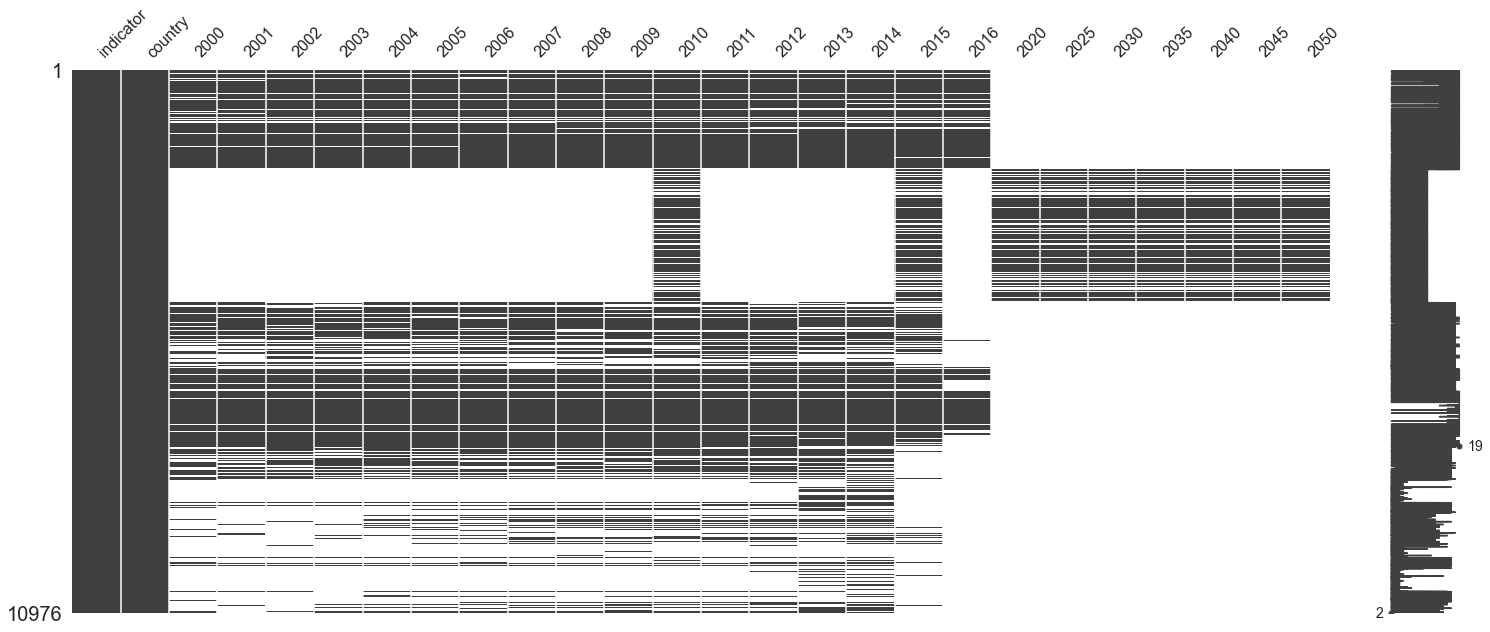

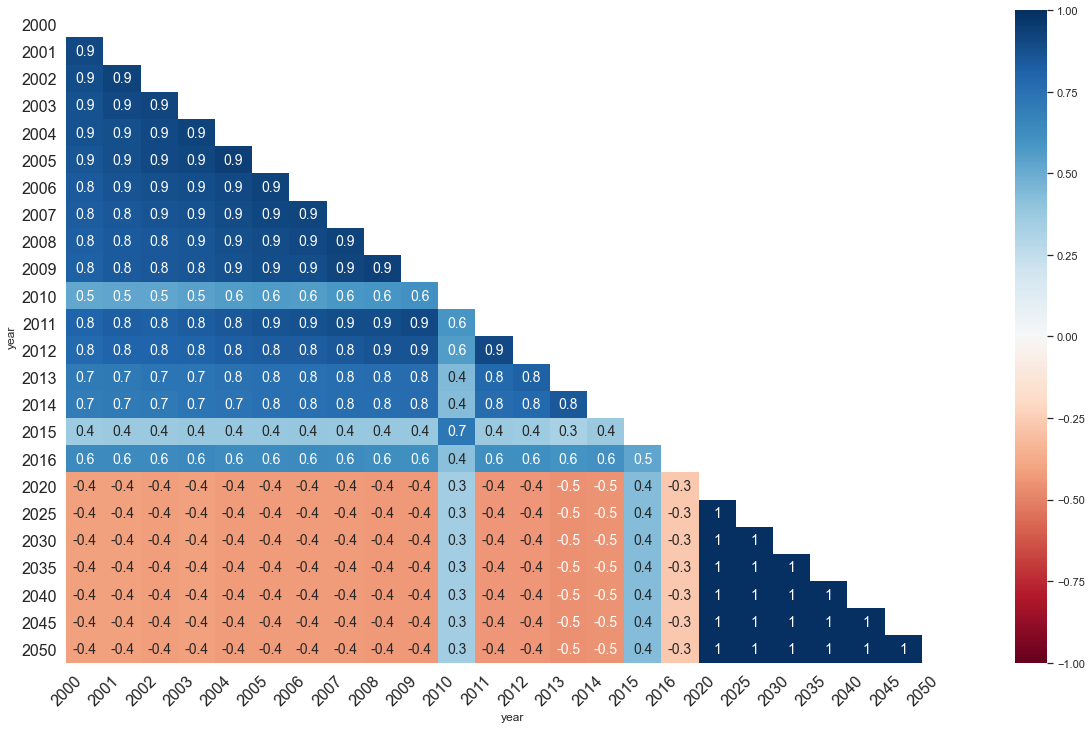

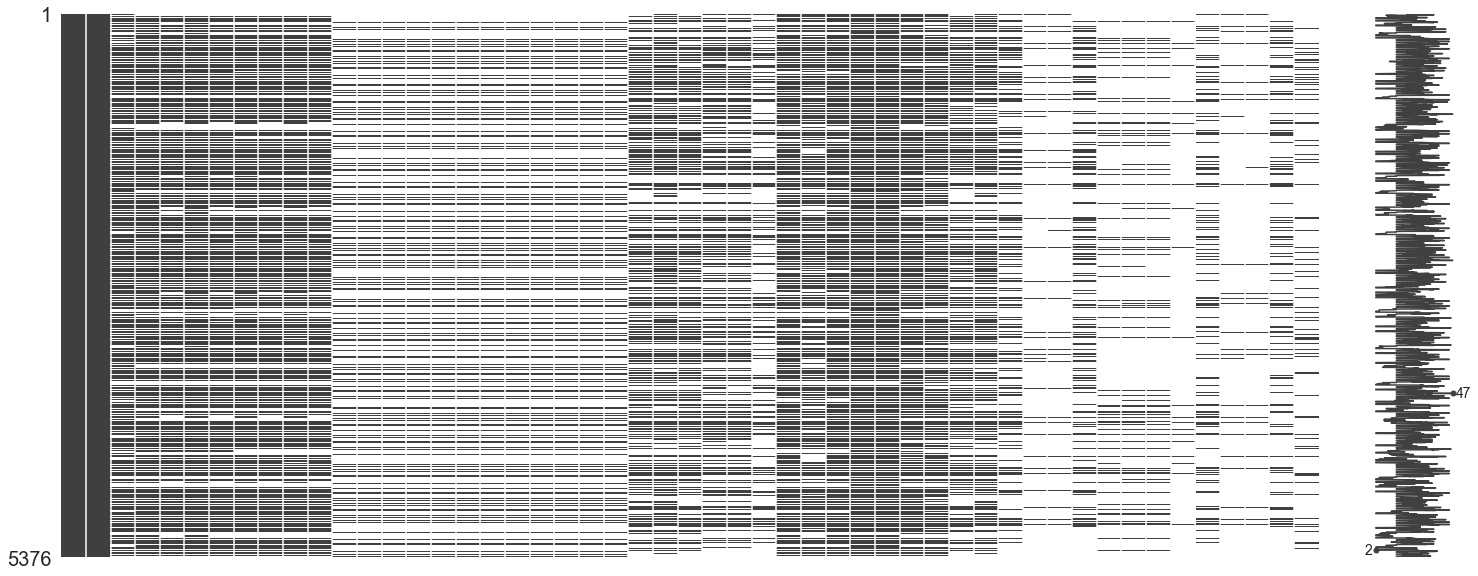

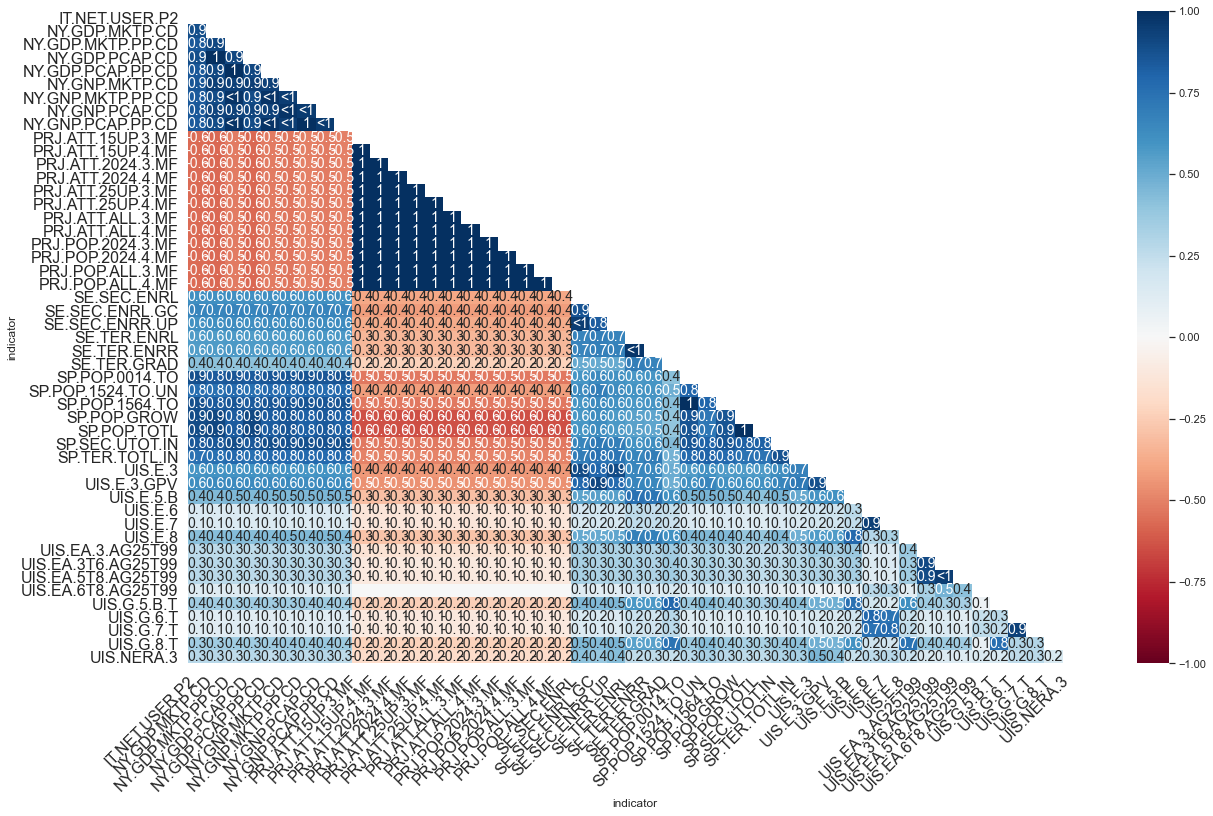

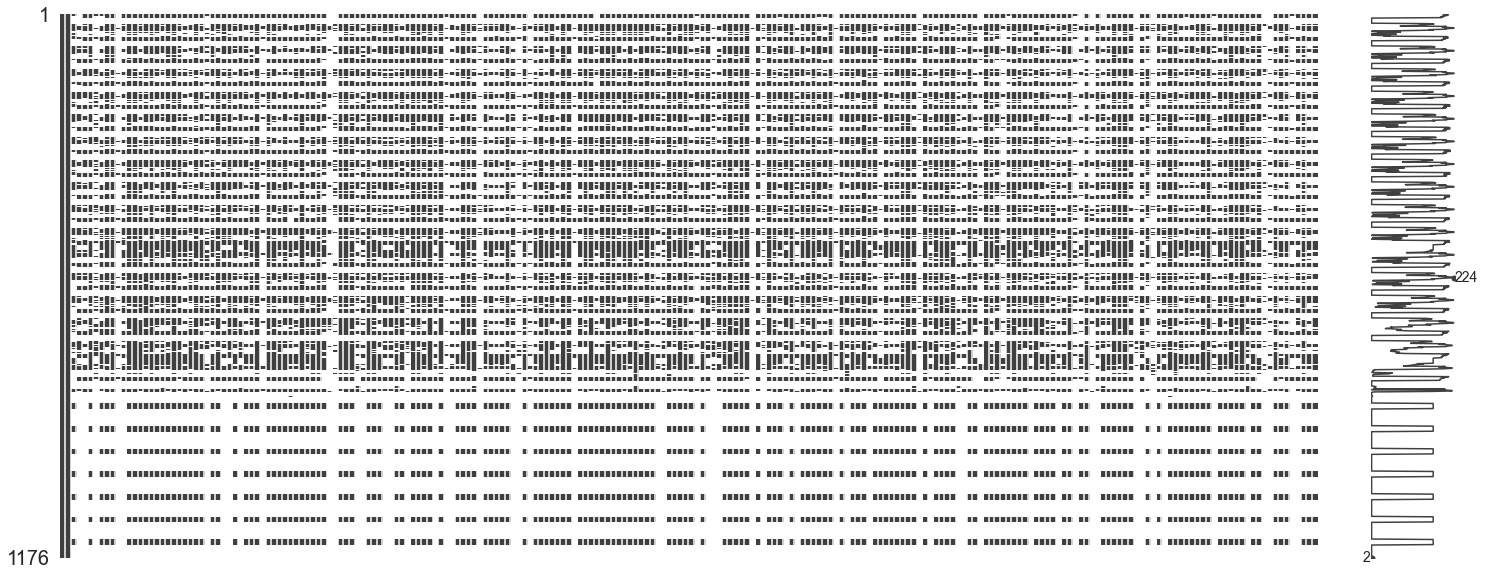

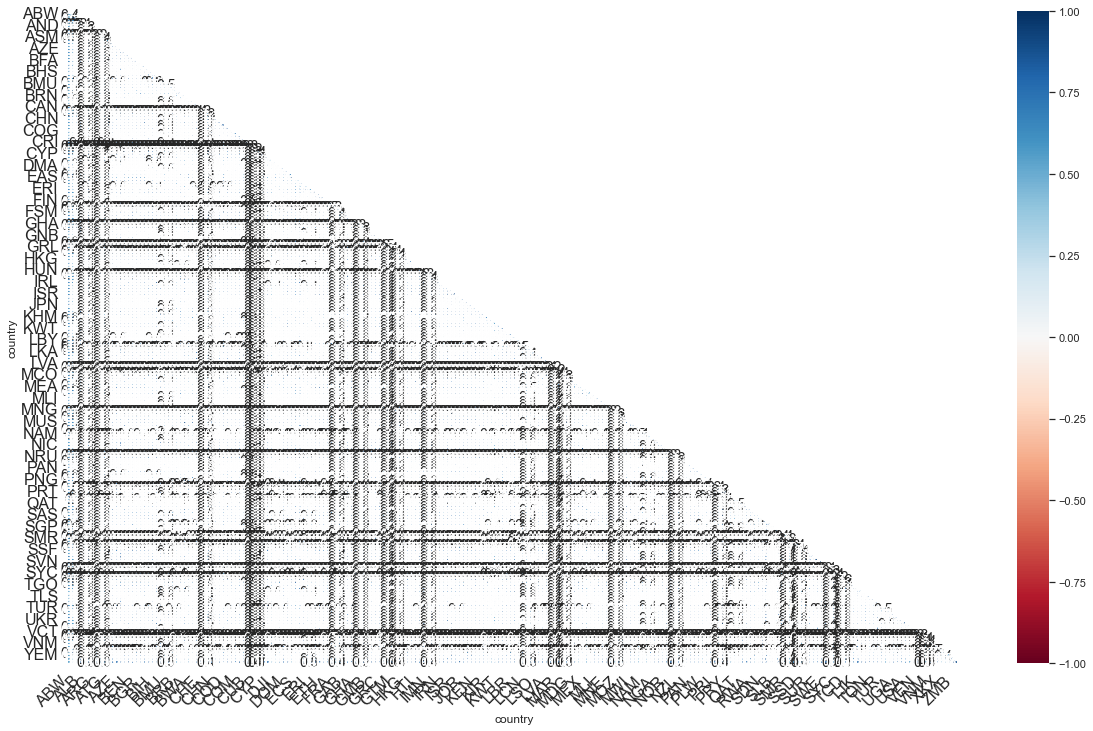

In [31]:
#try missingno package that is given as ressource
from missingno import matrix as msno_matrix
from missingno import heatmap as msno_heatmap

for i in range(3) :
    j = (i+1) % 3
    k = (i+2) % 3
    data = reconstruct_df(DATA,[INDEX_NAMES[i],INDEX_NAMES[j]],INDEX_NAMES[k])
    print(data.info())
    print(data.count())
    msno_matrix(data)
    msno_heatmap(data)

#### Résumé: dates
* La plus récente data vient de 2016, au delà la data est des projections.
* Les années plus proches sont correlées.
* Les dates de projection est anti-correlée avec les dates passées.
    * La data de projection est faite pour les intervales de 5 ans à partir de 2010.
    * La data de projection vient d'un dataset / un projection.
    
#### Résumé : variables
* Certaines variables appartiennent au même dataset ou sont measurées par la même organisation (proche de 100% correlation)
    * e.g. les projections: PRJ.
    * e.g. les GDP et GNP: NY.
    * e.g. la population : SP.
* Les projections sont anti-correlées avec les autres data. Il y a de la data pour differents dates. Des dates "futures" pour les projections et les dates "passées" pour la data actuelle.

## 4 Analyse des données

* Regarder les differents variables individuellement
    * Ecater des pays pour lesquels on n'a pas assez des infos / variables pour faire une analyse
    * Essayer à estimer les valeurs des variables manquantes
    * Regarder la moyenne/médiane/écart-type
* Définir un score pour évaluer l'attractivité d'un pays

### 4.1 Fonctions pour analyser les données

In [32]:
def make_2D_map(df_d, vv, indexcolumns, datacolumn):
    df = reconstruct_df(df_d,indexcolumns, datacolumn)
    return df[df[indexcolumns[0]] == vv]

ind = 'IT.NET.USER.P2'
make_2D_map(DATA, ind, ['indicator', 'year'] , 'country')

country       indicator  year        ABW        AFG        AGO        ALB  \
0        IT.NET.USER.P2  2000  15.442823        NaN   0.105046   0.114097   
1        IT.NET.USER.P2  2001  17.100000   0.004723   0.136014   0.325798   
2        IT.NET.USER.P2  2002  18.800000   0.004561   0.270377   0.390081   
3        IT.NET.USER.P2  2003  20.800000   0.087891   0.370682   0.971900   
4        IT.NET.USER.P2  2004  23.000000   0.105809   0.464815   2.420388   
5        IT.NET.USER.P2  2005  25.400000   1.224148   1.143367   6.043891   
6        IT.NET.USER.P2  2006  28.000000   2.107124   1.500000   9.609991   
7        IT.NET.USER.P2  2007  30.900000   1.900000   1.700000  15.036115   
8        IT.NET.USER.P2  2008  52.000000   1.840000   1.900000  23.860000   
9        IT.NET.USER.P2  2009  58.000000   3.550000   2.300000  41.200000   
10       IT.NET.USER.P2  2010  62.000000   4.000000   2.800000  45.000000   
11       IT.NET.USER.P2  2011  69.000000   5.000000   3.100000  49.000000   
12       IT.NET.USER.P2  2012  74.000000   5.454545   6.500000  54.655959   
13       IT.NET.USER.P2  2013  78.900000   5.900000   8.900000  57.200000   
14       IT.NET.USER.P2  2014  83.780000   7.000000  10.200000  60.100000   
15       IT.NET.USER.P2  2015  88.661227   8.260000  12.400000  63.252933   
16       IT.NET.USER.P2  2016  93.542454  10.595726  13.000000  66.363445   
17       IT.NET.USER.P2  2020        NaN        NaN        NaN        NaN   
18       IT.NET.USER.P2  2025        NaN        NaN        NaN        NaN   
19       IT.NET.USER.P2  2030        NaN        NaN        NaN        NaN   
20       IT.NET.USER.P2  2035        NaN        NaN        NaN        NaN   
21       IT.NET.USER.P2  2040        NaN        NaN        NaN        NaN   
22       IT.NET.USER.P2  2045        NaN        NaN        NaN        NaN   
23       IT.NET.USER.P2  2050        NaN        NaN        NaN        NaN   

country        AND        ARE        ARG        ARM  ...  VGB        VIR  \
0        10.538836  23.625301   7.038683   1.300470  ...  NaN  13.815081   
1              NaN  26.271754   9.780807   1.631095  ...  NaN  18.375766   
2        11.260469  28.316485  10.882124   1.960405  ...  NaN  27.494432   
3        13.546413  29.477953  11.913697   4.575217  ...  NaN  27.429073   
4        26.837954  30.131296  16.036684   4.899009  ...  NaN  27.377009   
5        37.605766  40.000000  17.720583   5.252983  ...  NaN  27.344320   
6        48.936847  52.000000  20.927202   5.631788  ...  NaN  27.332611   
7        70.870000  61.000000  25.946633   6.021253  ...  NaN  27.339336   
8        70.040000  63.000000  28.112623   6.210000  ...  NaN  27.361777   
9        78.530000  64.000000  34.000000  15.300000  ...  NaN  27.396510   
10       81.000000  68.000000  45.000000  25.000000  ...  NaN  31.220000   
11       81.000000  78.000000  51.000000  32.000000  ...  NaN  35.600000   
12       86.434425  84.999991  55.800000  37.500000  ...  NaN  40.547900   
13       94.000000  88.000000  59.900000  41.900000  ...  NaN  45.300000   
14       95.900000  90.400000  64.700000  54.622806  ...  NaN  50.070000   
15       96.910000  90.500000  68.043064  59.102378  ...  NaN  54.839137   
16       97.930637  90.600007  70.150764  62.000000  ...  NaN  59.608316   
17             NaN        NaN        NaN        NaN  ...  NaN        NaN   
18             NaN        NaN        NaN        NaN  ...  NaN        NaN   
19             NaN        NaN        NaN        NaN  ...  NaN        NaN   
20             NaN        NaN        NaN        NaN  ...  NaN        NaN   
21             NaN        NaN        NaN        NaN  ...  NaN        NaN   
22             NaN        NaN        NaN        NaN  ...  NaN        NaN   
23             NaN        NaN        NaN        NaN  ...  NaN        NaN   

country        VNM        VUT        WSM  XKX        YEM        ZAF  \
0         0.254248   2.108337   0.566393  NaN   0.082500   5.348560   
1         1.265651   2.830572  

In [33]:
def make_1D_slice(df_d, valuelist, indexcolumns, datacolumn) :
    df = reconstruct_df(df_d,indexcolumns, datacolumn)
    select = [a and b for a, b in zip([a for a in df[indexcolumns[0]] == valuelist[0]], 
                                      [a for a in df[indexcolumns[1]] == valuelist[1]])]
    return df[select].set_index(indexcolumns).T

ind = 'IT.NET.USER.P2'
cc = 'FRA'
make_1D_slice(DATA, [ind, cc], ['indicator','country'],'year')

indicator IT.NET.USER.P2
country              FRA
year                    
2000           14.307924
2001           26.325904
2002           30.180000
2003           36.140000
2004           39.150000
2005           42.870000
2006           46.870000
2007           66.090000
2008           70.680000
2009           71.580000
2010           77.280000
2011           77.819999
2012           81.440000
2013           81.919800
2014           83.750000
2015           84.694500
2016           85.622200
2020                 NaN
2025                 NaN
2030                 NaN
2035                 NaN
2040                 NaN
2045                 NaN
2050                 NaN

In [34]:
def investigate_indicator(ind, df_d, is_rawdata = True, output = True) :
    '''return the 2D data without empty rows and columns and return the years and countries for which one has data'''
    
    if is_rawdata:
        data = make_2D_map(df_d, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year')
    else :
        data = df_d
    #drop columns / countries that have no data
    data = data.dropna(axis = 1, how='all').dropna(axis = 0, how='all')

    dy = data.index.values
    dc = data.columns.values

    if output:
        print(50*'*')
        print(ind)
        try: 
            data.loc[:,np.isin(data.columns.values, COUNTRIES)].plot(legend = False)
            plt.show()
            data.loc[:,np.isin(data.columns.values, REGIONS)].plot(legend = False)
            plt.show()
        except:
            print("No data to plot.")
        print(f"We have data between {min(dy)} and {max(dy)}.\nThe exact years are :\n{dy}")
        print()
        print(f"We have data for the {len(dc)} countries. \nThe countries are :\n{dc}")
        print()
        print(f"These countries have absolutely no data : {set(COUNTRIES)-set(dc)}")
        print(f"These regions have absolutely no data : {set(REGIONS)-set(dc)}")
        print(50*'*')
    
    return (data, dy, dc)

In [35]:
def initial_investigation(ind, is_projection_data = False, output = True, last = 3):
    
    data, dy, dc = investigate_indicator(ind, DATA, output=output)
    y1 = 2010
    y2 = 2016 if not is_projection_data else 2050
    years = [str(y) for y in range(y1,y2+1) if np.isin(str(y),data.index.values)]
    data2, dy2, dc2 = investigate_indicator(ind, data.loc[years, :], is_rawdata = False, output = output)
    print(f"Completeness for the years {min(years)}-{max(years)}:", data2.count().sum()/(len(years)*len(dc2)))
    print()
    print(data2.T.describe())
    #if not is_projection_data :
     #   for y in years[-last:]:
      #      print(f"Number of countries for the year {y}:", data2.loc[str(y), :].count())
    return (data2, dy2, dc2)

In [36]:
def lin_interpolate(xdata, ydata, x3):
    x1, x2 = xdata
    y1, y2 = ydata
    return (x3- x1)*(y2-y1)/(x2-x1) + y1
    

In [37]:
def check_nearest_neighbors(xdata, ydata, na_list):
    value_list = [np.nan]*len(na_list)
    for i, na in enumerate(na_list) :
        if na == xdata[0] :
            x1,x2 = xdata[1:3]
            #print(f"case 1 : {na}")
            #print(x1,x2)
        elif na == xdata[-1] :
            x1,x2 = xdata[-3:-1]
            #print(f"case 2 : {na}")
            #print(x1,x2)
        else :
            k = xdata.index(na)
            x1,x2 = xdata[k-1], xdata[k+1]
            #print(f"case 3 : {na}")
            #print(x1,x2)
        if x1 not in na_list and x2 not in na_list:
            y1 = ydata[xdata.index(x1)]
            y2 = ydata[xdata.index(x2)]
            value_list[i] = lin_interpolate((x1,x2),(y1,y2),na)
    return value_list

In [38]:
def drop_countries(data,last = 3):
    drop_country = []
    for c in data.columns.values :
        data_slice = data[c] 
        na_list = [int(s) for s in data_slice.loc[data_slice.isna()].index.values]
        xrange = [int(y) for y in data.index.values]
        if len(na_list) > len(xrange)/2 and not len(set(xrange[-last:])-set(na_list)) :
            drop_country.append(c)
            data = data.drop(columns=[c])
    print("The following countries were dropped :")
    print(drop_country)
    return data

In [39]:
def fill_indicator_simple(data, ind='Indicator', output=False):
    '''Fill missing data points with a linear fit if they have two adjacent data points. 
    The end points are lineraly extrapolated if there are two following / leading data points.'''
    
    #collect data for filling in holes in a DataFrame
    fill_data = data.copy()
    
    #iterate over all countries and keep all years
    xrange = [int(y) for y in data.index.values]
    for c in data.columns.values :
        data_slice = data[c] #note data_slice is a Series object and not longer a DataFrame
        data_slice_clean = data_slice.dropna()
        na_list = [int(s) for s in data_slice.loc[data_slice.isna()].index.values]
        if len(na_list):
            yrange = data_slice.values
            fill_list = check_nearest_neighbors(xrange, yrange, na_list)
            for i,na in enumerate(na_list):
                fill_data[c][str(na)] = fill_list[i]               
            if output:
                print(f"The country {c} has some missing data points.")
                xdata = [int(y) for y in data_slice_clean.index.values]
                ydata = data_slice_clean.values
                plt.plot(xdata, ydata,'o',alpha=0.5, color='b')
                plt.plot(na_list,fill_list,'o',alpha=0.5, color='r')
                plt.xlabel("Year")
                plt.ylabel(ind)
                plt.show()                                                                                                                       

    return data.fillna(value = fill_data)    

In [40]:
def fill_indicator_linear(data):
    '''Fill the data holes using the dataframe interpolate function and extrapolate. 
    If only one data point is given, fill the data set with this value.
    If no data points are given, an error will be raised.'''
    data.index = [int(y) for y in data.index.values]
    data_clean = data.copy()
    for c in data.columns.values :
        data_slice = data[c]
        num_datapoints = data_slice.notna().sum()
        if num_datapoints == 1 :
            data_clean[c] = data_slice.fillna(data_slice[data_slice.notna()].values[0])
        else :
            data_clean[c] = data_slice.interpolate(method = "slinear", fill_value = "extrapolate")
    data_clean.index = [str(y) for y in data_clean.index]
    data.index = [str(y) for y in data.index.values]
    return data_clean

In [41]:
def fill_indicator(data, func, p0_func, bounds_func = lambda : (-np.inf,np.inf), ind = 'Indicator', output = False):
    '''Fill the data of the indicator for a given country using a fit to func1.'''
    #collect data for filling in holes in a DataFrame
    fill_data = data.copy()
    
    #iterate over all countries
    xrange = [int(y) for y in data.index.values]
    for c in data.columns.values :
        data_slice = data[c] #note data_slice is a Series object and not longer a DataFrame
        data_slice_clean = data_slice.dropna()
        na_list = [int(s) for s in data_slice.loc[data_slice.isna()].index.values]
        if len(na_list):
            try :
                xdata = [int(y) for y in data_slice_clean.index.values]
                ydata = data_slice_clean.values
                if output :
                    plt.plot(xdata,ydata,'o',alpha=0.5)
                p, pcov = sp.optimize.curve_fit(func, xdata, ydata, p0 = p0_func(xdata, ydata), bounds = bounds_func())
                yrange = [func(x, *p) for x in xrange]
                if output :
                    print(f'For {c} the fit succeeded.')
                    print(p)
                    print(np.sqrt(np.diag(pcov)))
                    plt.plot(xrange,yrange,'-')
                    plt.xlabel("Year")
                    plt.ylabel(ind)
                    plt.show()
                fill_data[c] = yrange
            except :
                print(f'For {c} the fit failed.')
                if output:
                    yrange = [func(x, *p0_func(xdata, ydata)) for x in xrange]
                    plt.plot(xrange,yrange,'-')
            finally :
                plt.show()
                
                    
    
    return data.fillna(value = fill_data)

In [42]:
def plot_boxplot(ind, data_clean, unit = "", years=None, **kwags) :

    for countries, titlename in zip([COUNTRIES, REGIONS], ["Pays","Régions"]) :
    
        if years == None:
            data_plot = data_clean.loc[:,np.isin(data_clean.columns.values, countries)].T
        else:
            data_plot = data_clean.loc[years,np.isin(data_clean.columns.values, countries)].T
 
        fig1, ax1 = plt.subplots()
        data_years = [int(y) for y in data_plot.columns.values]
        ax1.boxplot(data_plot, positions = data_years, **kwags)
        #ax1.plot(data_years, data_plot.mean().values,'o', alpha=0.5, color = 'black')
        ax1.set_xlabel("Années")
        ax1.set_ylabel(unit)
        title = " - ".join((ind, titlename))
        ax1.set_title(title)
        plt.show()

In [43]:
def print_info_year(y, data, unit="", ind = 'Indicator', **kwags):
    print(y)

    for countries, titlename in zip([COUNTRIES, REGIONS], ["Pays","Régions"]) :
        data_plot = data.loc[y,np.isin(data.columns.values, countries)].T
        print(titlename)
        print("Median: ", data_plot.median())
        print("Mean: ", data_plot.T.mean())
        print("Std: ", data_plot.std())
        
        fig, ax = plt.subplots()
        ax.hist(data_plot, **kwags)
            #ax1.plot(data_years, data_plot.mean().values,'o', alpha=0.5, color = 'black')
        ax.set_xlabel(unit)
        ax.set_ylabel("Nombre d'occurences")
        title = " - ".join((ind, titlename))
        ax.set_title(title)
        plt.show()

In [44]:
def list_countrynames(clist):
    for c in clist:
        print(c, COUNTRY_DATA[COUNTRY_DATA['Country Code'] == c]['Short Name'].iloc[0])

### 4.2 Les variables

#### 4.2.1 Usage de l'internet / ordinateurs
* Il n'y a qu'un indicator dans les données.

#### IT.NET.USER.P2
* Utilisateurs de l'Internet (per 100 personnes)
* Pourcentages de la population qui utilise l'internet.
* Un indicateur essentiel pour une service / application web.
* Cet indicateur est presque complèt pour les années 2010-2016.

**************************************************
IT.NET.USER.P2


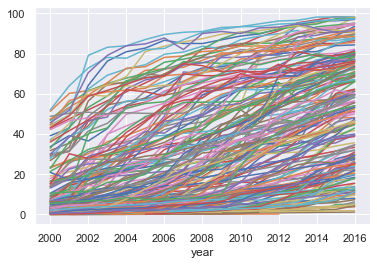

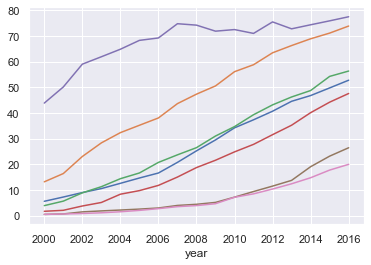

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 212 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE'
 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU'
 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV'
 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU'
 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' '

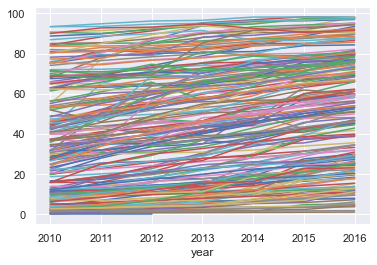

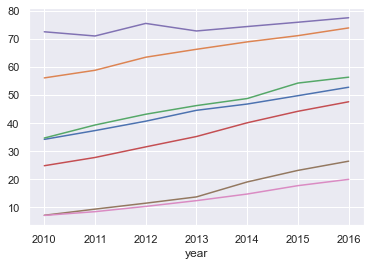

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 211 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE'
 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU'
 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV'
 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU'
 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS'

In [45]:
ind = 'IT.NET.USER.P2'
initial_investigation(ind)[0].T.info()

#### Résumé: IT.NET.USER.P2
* Pour 204 pays, il y a de la data pour les années 2010-2016.
    * 13 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est presque complète pour les années 2010-2016. Après avoir écarter les pays, pour lequels il n'y a pas de data, presque 99% des données sont saisies.
* Garder que les pays pour les quels ont a soit plus la moité des données soit l'information d'un des dernières trois années.
* Utiliser d'abord un simple interpolation / extrapolation lineaire pour remplir les trous dans les données.
* Cette variable devrait suivre une courbe S / la fonction Sigmoïde.
    * utiliser cette fonction pour remplirer les données manquantes s'il y a plusieurs années manquantes

In [46]:
def SigmoidGrowth(x,b,c,x0):
    return c / (1 + np.exp(-b*(x-x0)))

In [47]:
def p0_SigmoidGrowth(xdata,ydata):
    return (0.5,max(ydata),2010)

In [48]:
def bounds_SigmoidGrowth():
    bounds = ([0,0,1990],[np.inf,100,np.inf])
    return bounds

The following countries were dropped :
['ASM', 'CHI', 'CUW', 'IMN', 'MAF', 'MNP', 'NRU', 'PLW', 'SSD', 'SXM', 'TCA', 'VGB', 'XKX']

The country AFG has some missing data points.


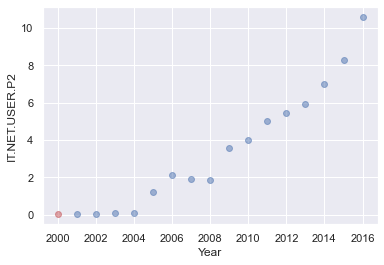

The country AND has some missing data points.


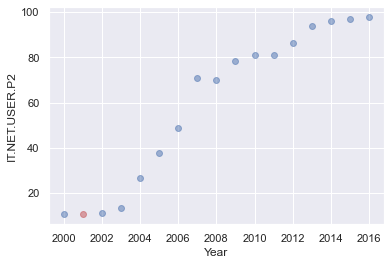

The country AUS has some missing data points.


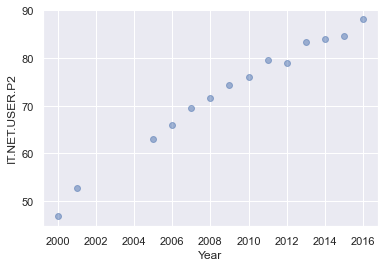

The country AZE has some missing data points.


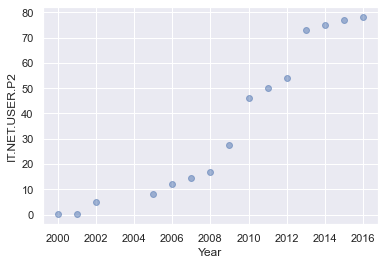

The country BLR has some missing data points.


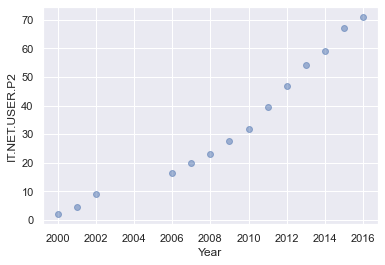

The country BLZ has some missing data points.


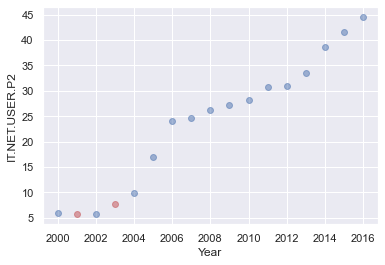

The country CYM has some missing data points.


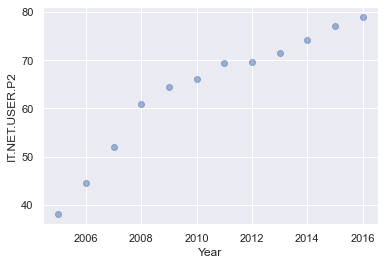

The country ERI has some missing data points.


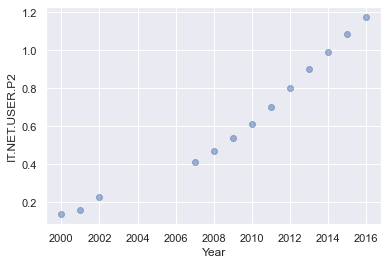

The country GIB has some missing data points.


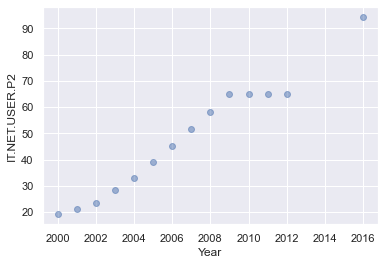

The country GUY has some missing data points.


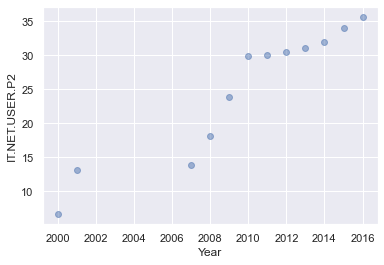

The country IRQ has some missing data points.


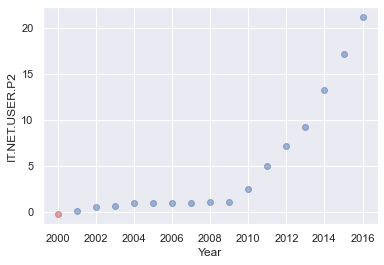

The country LBR has some missing data points.


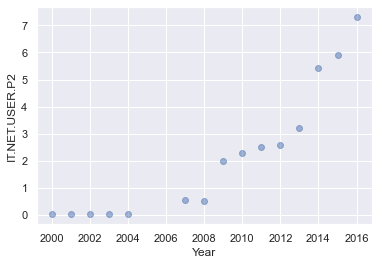

The country LBY has some missing data points.


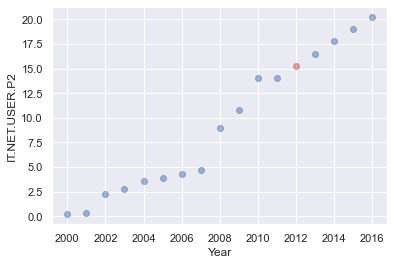

The country MMR has some missing data points.


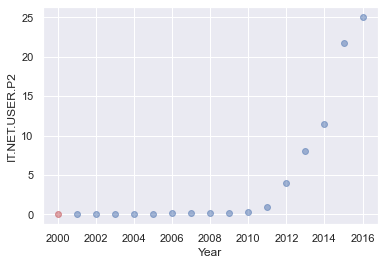

The country MNE has some missing data points.


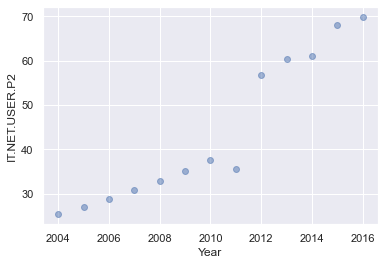

The country MNG has some missing data points.


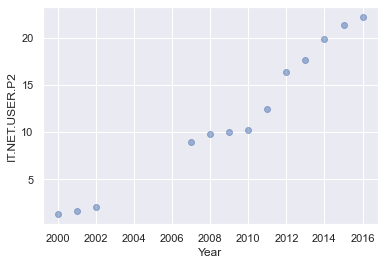

The country NCL has some missing data points.


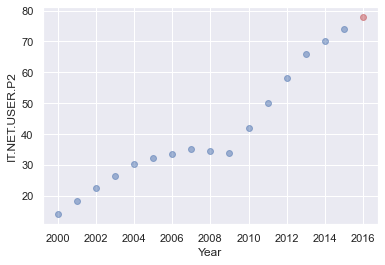

The country PAK has some missing data points.


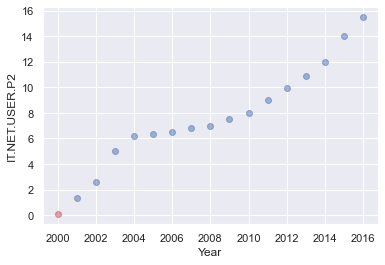

The country PRK has some missing data points.


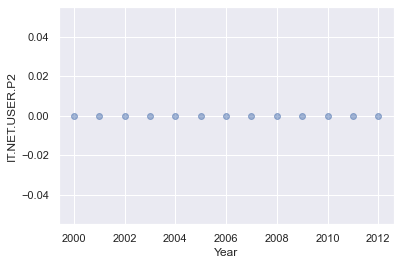

The country RWA has some missing data points.


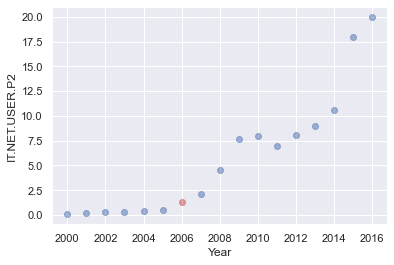

The country SDN has some missing data points.


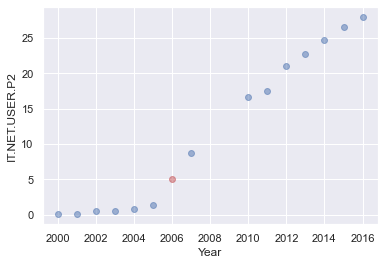

The country SMR has some missing data points.


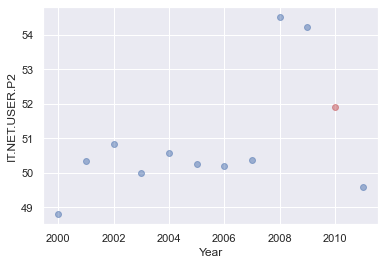

The country SOM has some missing data points.


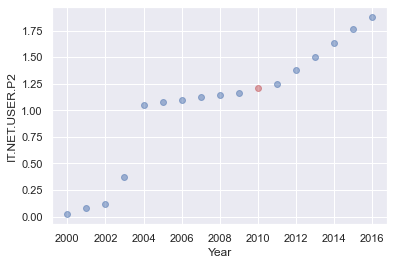

The country SRB has some missing data points.


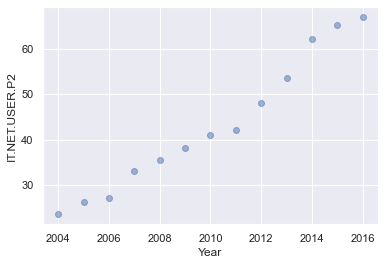

The country SYC has some missing data points.


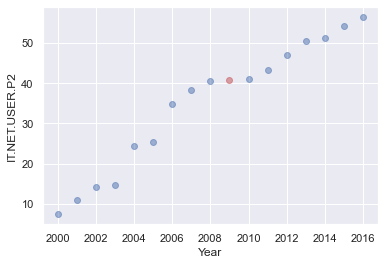

The country TLS has some missing data points.


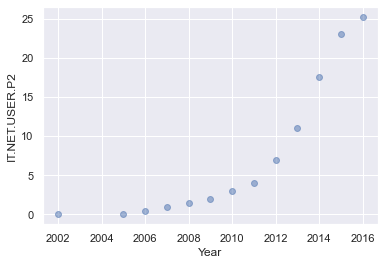

The country TUV has some missing data points.


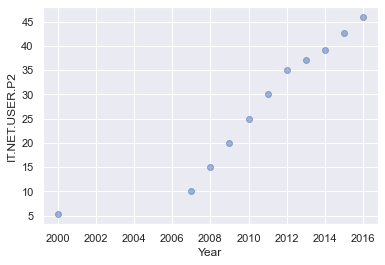

In [49]:
#keep this line just to check that every thing works
#print(ALL_YEARS)
ind = 'IT.NET.USER.P2'
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop countries for which there is less than half of the data points and none of the last 3 years present.
data = drop_countries(data)
print()
#fill single holes that have nearest neighbors (including endpoints, if the two following/leading datapoints are not NaNs.)
data_holes = data.loc[: ,data.isna().sum() != 0]
data_holes_filled = fill_indicator_simple(data_holes, ind, output=True)
data_clean = data.fillna(value = data_holes_filled)

In [50]:
print(data_clean.T.describe())

year         2000        2001        2002        2003        2004        2005  \
count  207.000000  206.000000  205.000000  200.000000  202.000000  205.000000   
mean     8.630607   10.792301   13.706714   16.271223   18.734791   20.958863   
std     13.278840   15.491234   18.530363   20.433342   21.852430   23.015649   
min     -0.300000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.294900    0.603122    1.050423    1.618643    2.177737    2.851752   
50%      2.210692    3.247668    4.626175    6.829578    8.697186   11.484009   
75%      9.282820   14.207723   19.370000   25.020945   29.331181   34.862927   
max     52.000000   64.000000   79.120000   83.140000   83.890000   87.000000   

year         2006        2007        2008        2009        2010        2011  \
count  206.000000  211.000000  210.000000  210.000000  211.000000  211.000000   
mean    23.317732   25.629998   28.433737   31.150500   34.172703   36.941067   
std     24.070585   25.2179

For AUS the fit succeeded.
[1.26528311e-01 9.95323672e+01 2.00055856e+03]
[0.01056357 3.15363551 0.44914493]


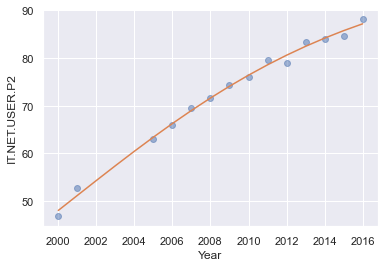

For AZE the fit succeeded.
[4.95095628e-01 8.46490091e+01 2.01019828e+03]
[0.05407184 4.17829862 0.31280689]


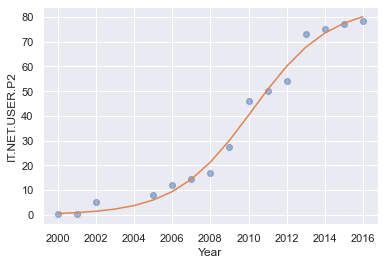

For BLR the fit succeeded.
[2.64335666e-01 1.00000000e+02 2.01251990e+03]
[0.01774382 7.67964554 0.6478775 ]


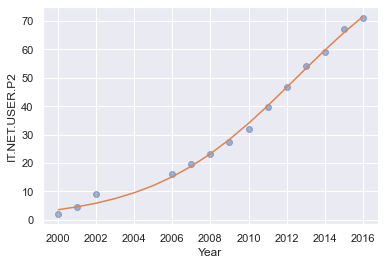

For CYM the fit succeeded.
[3.70740868e-01 7.75878116e+01 2.00505048e+03]
[0.043156   1.61732441 0.19366594]


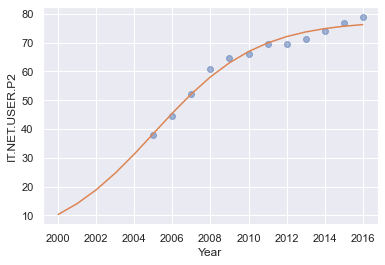

For ERI the fit succeeded.
[1.71704198e-01 2.39115957e+00 2.01609123e+03]
[0.00775465 0.23470446 1.0717966 ]


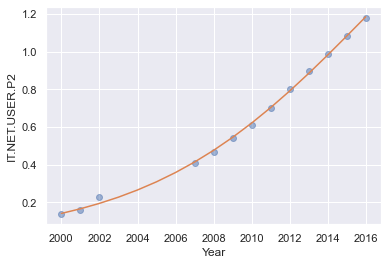

For GIB the fit succeeded.
[2.13667063e-01 1.00000000e+02 2.00707434e+03]
[ 0.03162917 10.35338622  1.15860539]


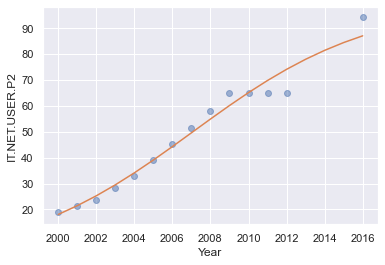

For GUY the fit succeeded.
[1.81822159e-01 4.57898276e+01 2.00876120e+03]
[ 0.05856755 11.34623258  3.13623344]


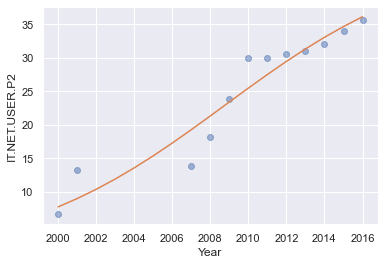

For LBR the fit succeeded.
[3.09890134e-01 1.75736788e+01 2.01710345e+03]
[ 0.06775366 11.98519719  3.827272  ]


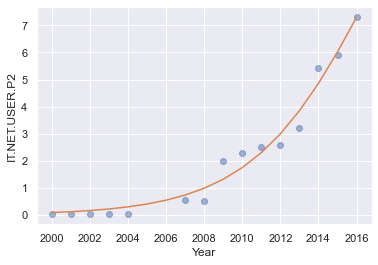

For MNE the fit succeeded.
[1.79074358e-01 1.00000000e+02 2.01160891e+03]
[ 0.06803982 41.08846697  4.95756362]


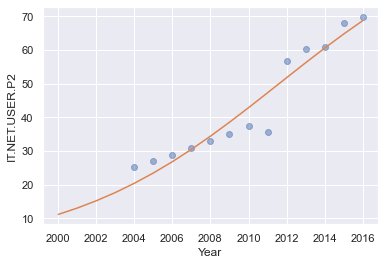

For MNG the fit succeeded.
[2.38152819e-01 3.17303919e+01 2.01211133e+03]
[0.03776345 5.46499433 1.6040223 ]


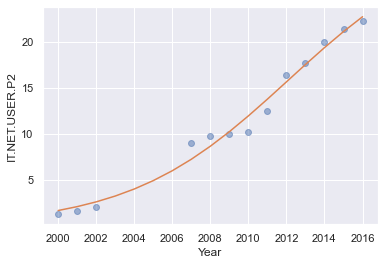

For PRK the fit succeeded.
[5.00e-01 1.00e-10 2.01e+03]
[8.54428008e-01 1.94886159e-10 9.02679116e+00]


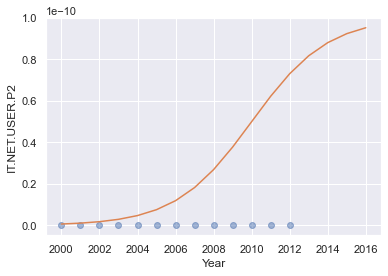

For SDN the fit succeeded.
[4.54160197e-01 2.86022460e+01 2.00964393e+03]
[0.04250495 1.25276318 0.33180517]


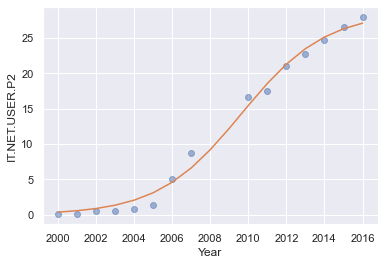

For SMR the fit succeeded.
[1.02164226e-02 9.44733586e+01 1.99000000e+03]
[3.83219344e-01 3.02346890e+03 6.22352887e+03]


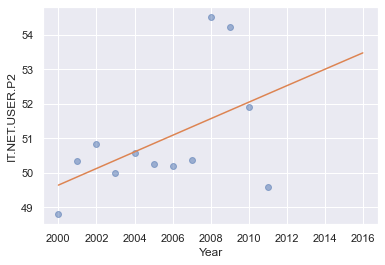

For SRB the fit succeeded.
[1.62864555e-01 1.00000000e+02 2.01183341e+03]
[ 0.03345673 23.18809474  3.02734361]


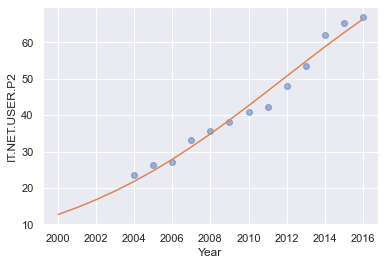

For TLS the fit succeeded.
[6.60543525e-01 3.20385386e+01 2.01380812e+03]
[0.05919294 2.42489603 0.29099718]


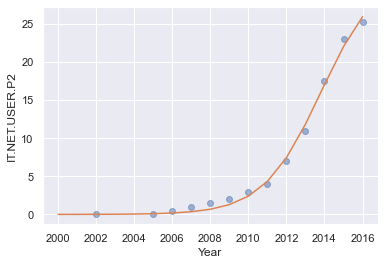

For TUV the fit succeeded.
[3.88096918e-01 4.94292407e+01 2.01003204e+03]
[0.05597513 3.35461792 0.45670838]


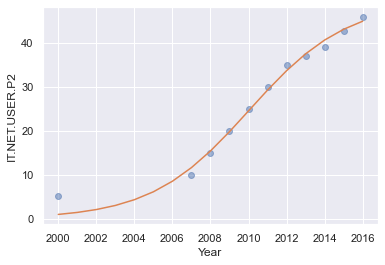

In [51]:
# fit the remaining data holes with a S-kurve function
data_holes = data_clean.loc[:,data_clean.isna().sum() != 0]
dc_holes = data_holes.columns.values
data_holes_filled = fill_indicator(data_holes, SigmoidGrowth, p0_SigmoidGrowth, 
                                   bounds_func=bounds_SigmoidGrowth, ind = ind, output = True)

data_clean = data_clean.fillna(value = data_holes_filled)

In [52]:
print(data_clean.T.describe())

year         2000        2001        2002        2003        2004        2005  \
count  211.000000  211.000000  211.000000  211.000000  211.000000  211.000000   
mean     8.628915   10.741395   13.874463   16.120339   18.538873   20.548607   
std     13.169882   15.342062   18.500252   20.238065   21.747773   22.831016   
min     -0.300000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.294900    0.608675    1.082941    1.666924    2.179950    2.715999   
50%      2.434398    3.430887    4.999714    6.933722    8.528818   11.483198   
75%     10.060011   14.331559   19.150239   24.170071   28.946757   33.570000   
max     52.000000   64.000000   79.120000   83.140000   83.890000   87.000000   

year         2006        2007        2008        2009        2010        2011  \
count  211.000000  211.000000  211.000000  211.000000  211.000000  211.000000   
mean    22.920259   25.629998   28.342569   31.060805   34.172703   36.941067   
std     23.938659   25.2179

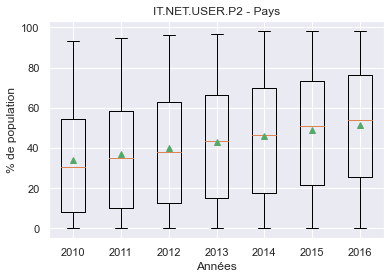

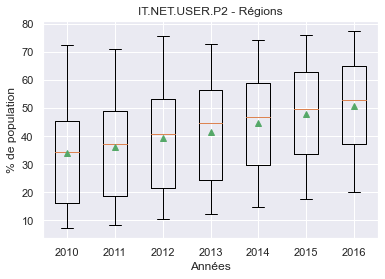

2010
Pays
Median:  30.325
Mean:  34.1844416925049
Std:  27.413851660526802


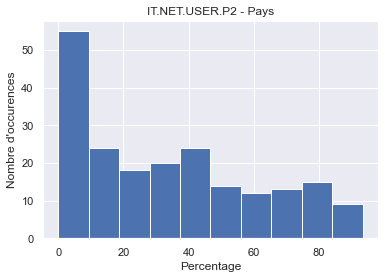

Régions
Median:  34.2308383100865
Mean:  33.830603724188364
Std:  24.142626104089167


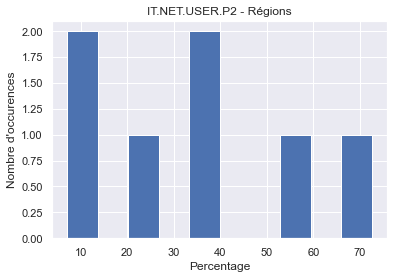

2016
Pays
Median:  53.736859036515945
Mean:  51.30292298864768
Std:  28.646550367540545


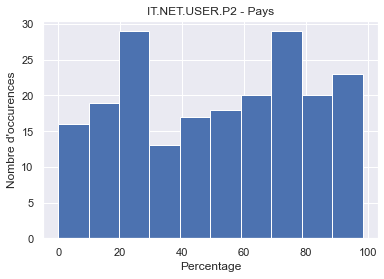

Régions
Median:  52.7963207892303
Mean:  50.67294617784136
Std:  21.738012454402565


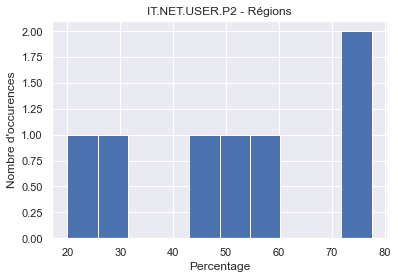

In [53]:
years = [str(y) for y in range(2010,2017)]
plot_boxplot(ind, data_clean, unit = "% de population", years = years, showmeans = True)
print_info_year('2010', data_clean, unit = "Percentage", ind = ind)
print_info_year('2016', data_clean, unit = "Percentage", ind = ind)

#### Résumé: IT.NET.USER.P2
* **Garde 204 pays et 7 régions**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 53.7 %, 51.3% et 28.6% pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 52.8 %, 50.7% et 21.7% pour les régions**
* Le score va être propotioniel au usage de l'internet.

In [54]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = deconstruct_df(data_clean.copy().reset_index())
DATA_CLEAN

indicator country  year      value
0   IT.NET.USER.P2     ABW  2000  15.442823
1   IT.NET.USER.P2     ABW  2001  17.100000
2   IT.NET.USER.P2     ABW  2002  18.800000
3   IT.NET.USER.P2     ABW  2003  20.800000
4   IT.NET.USER.P2     ABW  2004  23.000000
..             ...     ...   ...        ...
12  IT.NET.USER.P2     ZWE  2012  12.000000
13  IT.NET.USER.P2     ZWE  2013  15.500000
14  IT.NET.USER.P2     ZWE  2014  16.364740
15  IT.NET.USER.P2     ZWE  2015  22.742818
16  IT.NET.USER.P2     ZWE  2016  23.119989

[3587 rows x 4 columns]

#### 4.2.2 Niveau d'education du pays
* 'SE.SEC.ENRL', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRR.UP','SE.TER.ENRL', 'SE.TER.ENRR', 'SE.TER.GRAD'
* 'UIS.E.3','UIS.E.3.GPV','UIS.NERA.3','UIS.E.5.B','UIS.E.6','UIS.E.7','UIS.E.8','UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T'
* 'UIS.EA.3T6.AG25T99', 'UIS.EA.6T8.AG25T99'
* 'SP.SEC.UTOT.IN', 'SP.TER.TOTL.IN'
* inscription dans l'enseignement secondaire et supérieur (nombre et %), population avec l'âge scolaire
* donne information sur le niveau d'education 

#### Education tertiaire

In [55]:
#tertiary enrolment/graduation
my_indicators = ['SE.TER.ENRL', 'SE.TER.ENRR', 'SE.TER.GRAD', 
                 'UIS.E.5.B','UIS.E.6','UIS.E.7','UIS.E.8','UIS.G.5.B.T', 'UIS.G.6.T', 'UIS.G.7.T', 'UIS.G.8.T',
                 'UIS.EA.3T6.AG25T99', 'UIS.EA.6T8.AG25T99', 'UIS.EA.5T8.AG25T99',
                 'SP.TER.TOTL.IN']

In [56]:
num_c = []
for ind in my_indicators :
    print(50*'*')
    print(ind)
    data, dy, dc = initial_investigation(ind, output=False)
    num_c.append(len(dc))
    print()
    print(f"There are {len(dc)} countries for the indicator {ind}.")
    
print()
print(f"{my_indicators[num_c.index(max(num_c))]} has the most countries.")

**************************************************
SE.TER.ENRL
Completeness for the years 2010-2016: 0.6624102154828412

year           2010          2011          2012          2013          2014  \
count  1.470000e+02  1.490000e+02  1.480000e+02  1.380000e+02  1.310000e+02   
mean   2.298180e+06  2.480601e+06  2.569238e+06  2.773283e+06  3.085502e+06   
std    7.208971e+06  7.549402e+06  7.826913e+06  8.182494e+06  9.102269e+06   
min    5.000000e+00  1.890000e+02  1.000000e+02  2.380000e+02  1.780000e+02   
25%    5.886150e+04  7.068300e+04  6.710950e+04  9.721850e+04  1.130575e+05   
50%    2.023450e+05  2.368910e+05  2.408850e+05  2.560121e+05  2.832940e+05   
75%    8.522200e+05  1.021288e+06  1.023460e+06  1.232937e+06  1.629698e+06   
max    5.523363e+07  5.658473e+07  5.887421e+07  6.091618e+07  6.909780e+07   

year           2015           2016  
count  1.100000e+02       7.000000  
mean   1.573105e+06  197838.428571  
std    5.494281e+06  210245.804130  
min    1.940000e+02

Completeness for the years 2010-2015: 0.29333333333333333

year            2010           2011           2012          2013  \
count       3.000000       3.000000      11.000000  8.000000e+01   
mean   175643.666667  176379.666667  110790.181818  2.384864e+05   
std    201810.176518  214175.017157  142017.036559  9.575364e+05   
min     11638.000000    4438.000000     213.000000  7.200000e+01   
25%     62959.000000   56423.500000   12774.000000  8.884500e+03   
50%    114280.000000  108409.000000   55920.000000  2.800842e+04   
75%    257646.500000  262350.500000  126160.000000  8.722775e+04   
max    401013.000000  416292.000000  429006.000000  7.357287e+06   

year           2014           2015  
count  7.500000e+01       4.000000  
mean   1.925121e+05  127443.500000  
std    6.319973e+05  158263.726283  
min    7.000000e+00      48.000000  
25%    8.041500e+03    1965.000000  
50%    3.177900e+04   90141.000000  
75%    1.163515e+05  215619.500000  
max    5.085064e+06  329444.0000

In [57]:
ind = 'SP.TER.TOTL.IN'
ind2 = 'SE.TER.ENRL'
ind3 = 'SE.TER.ENRR'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data = drop_countries(data,len(years))

data2 = make_2D_map(DATA, ind2, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data3 = make_2D_map(DATA, ind3, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data4 = data2.div(data3).multiply(100)

The following countries were dropped :
['AND', 'ARE', 'ASM', 'BIH', 'CHI', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM', 'IMN', 'MAF', 'MCO', 'MNP', 'NCL', 'OMN', 'PYF', 'SGP', 'SXM', 'TCA', 'VIR', 'XKX']


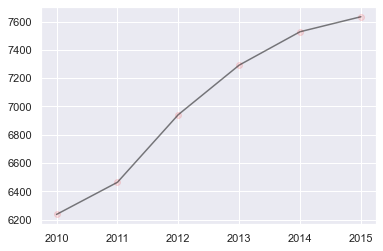

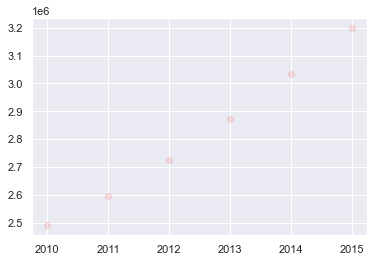

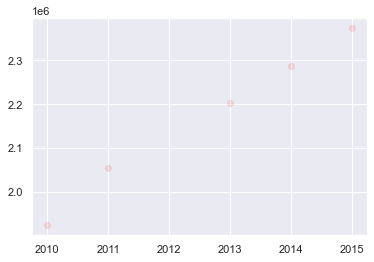

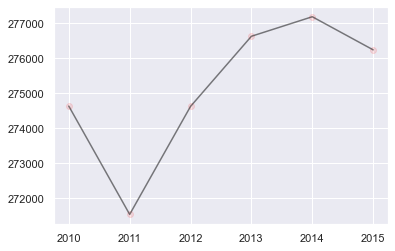

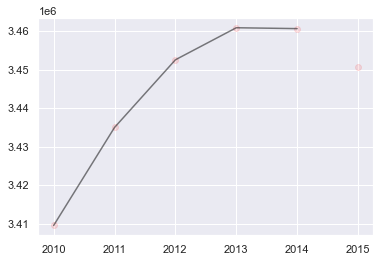

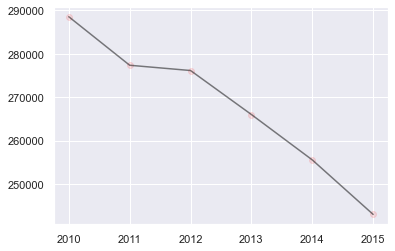

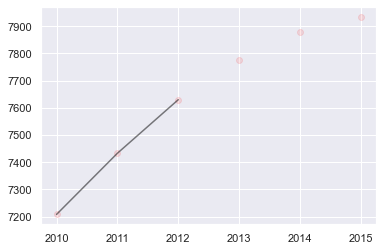

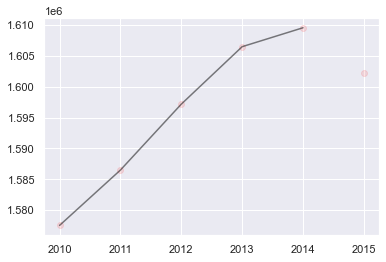

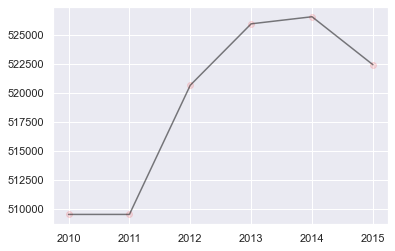

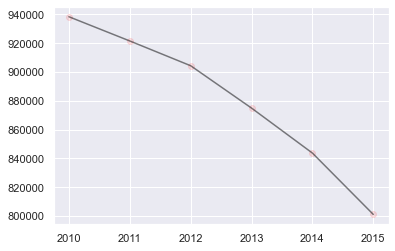

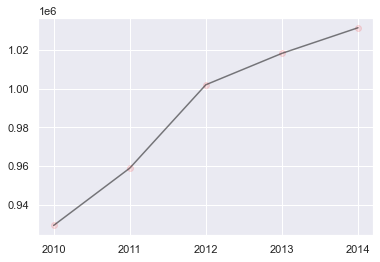

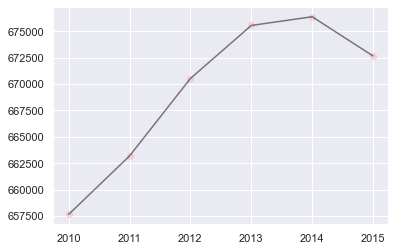

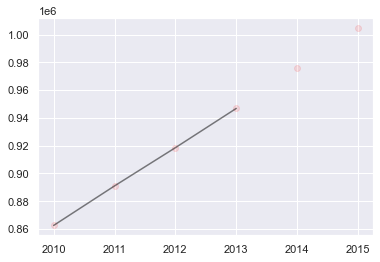

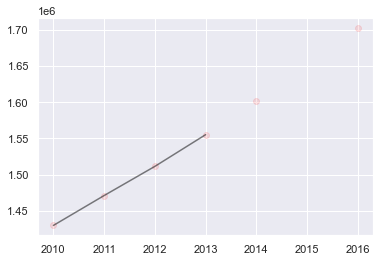

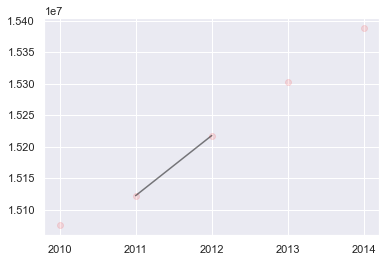

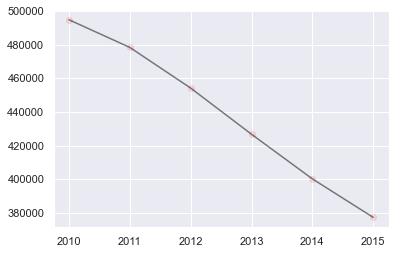

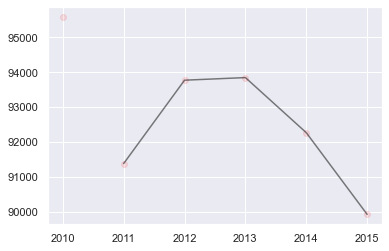

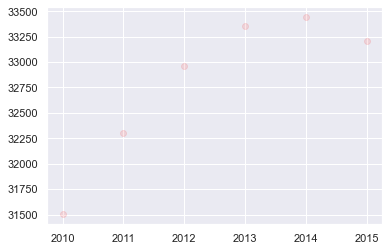

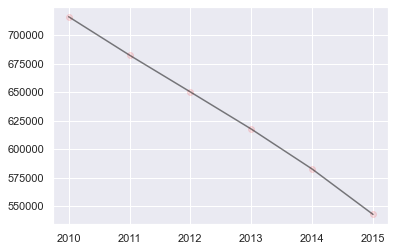

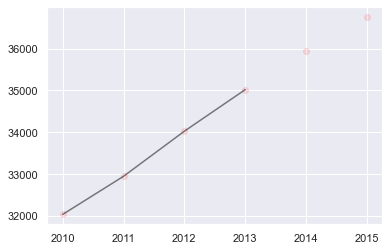

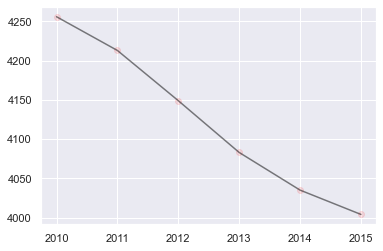

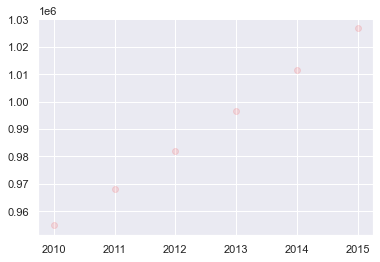

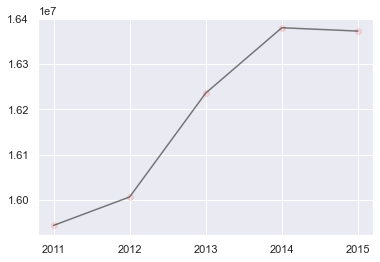

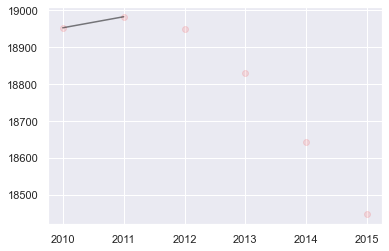

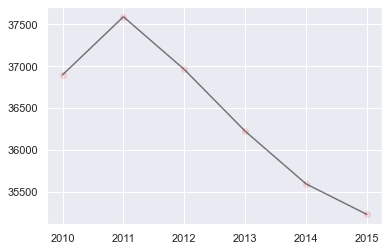

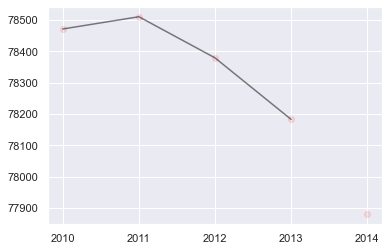

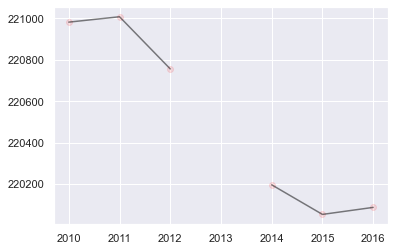

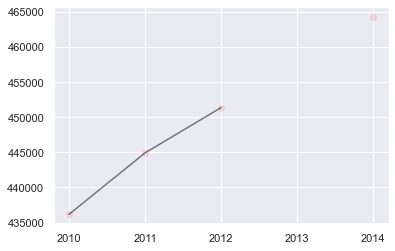

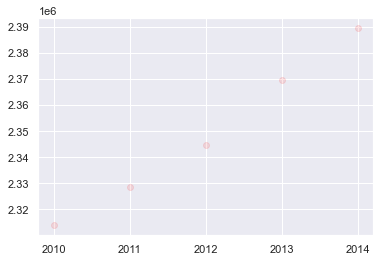

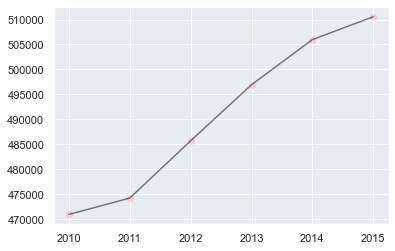

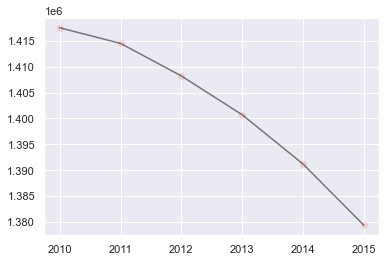

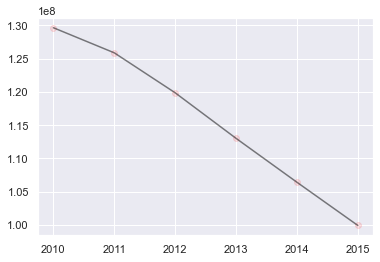

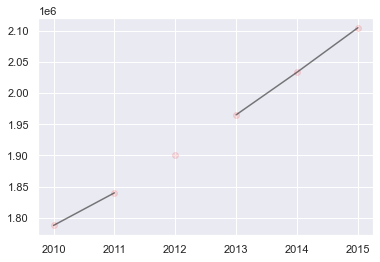

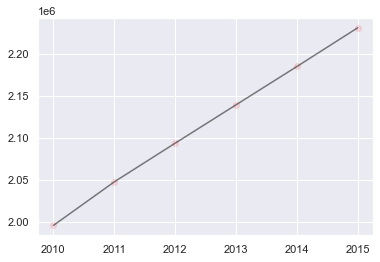

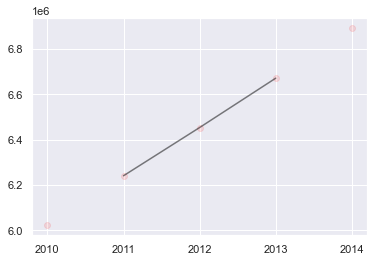

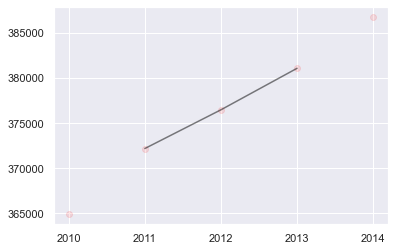

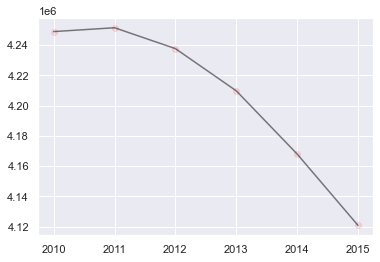

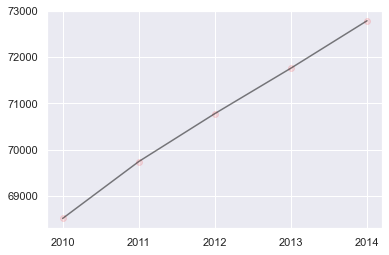

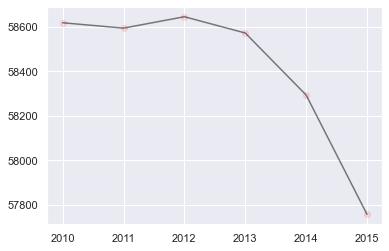

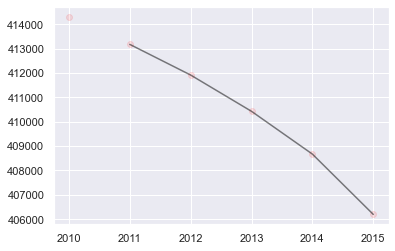

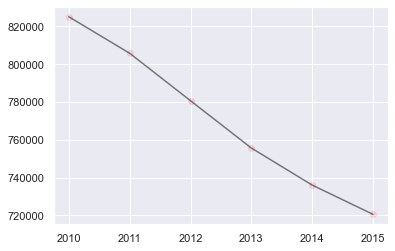

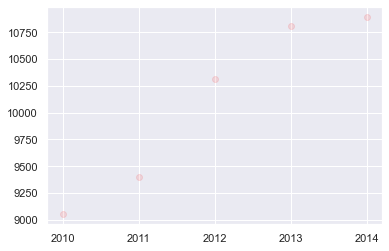

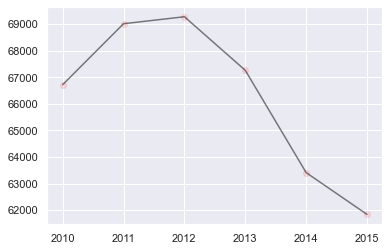

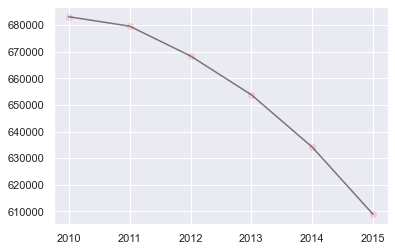

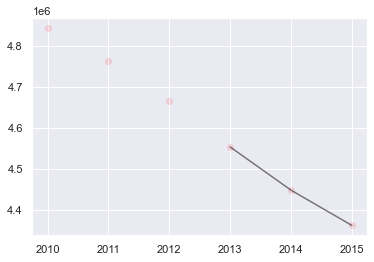

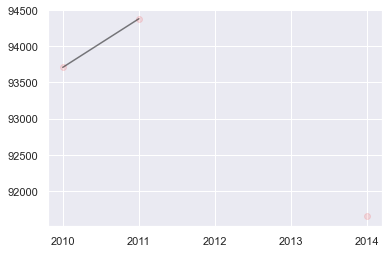

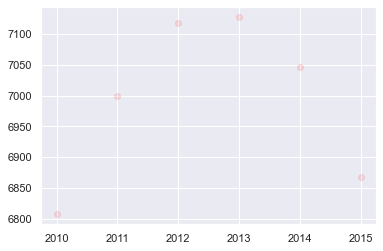

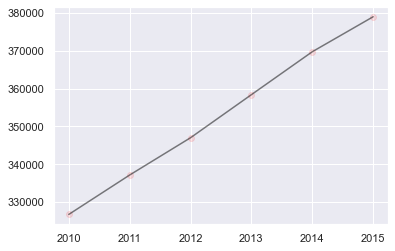

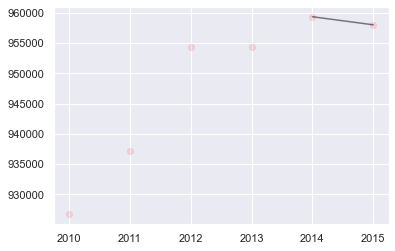

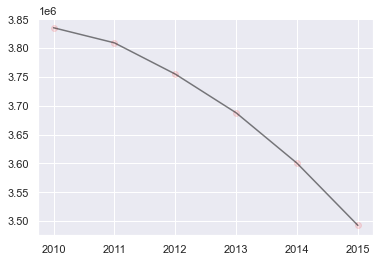

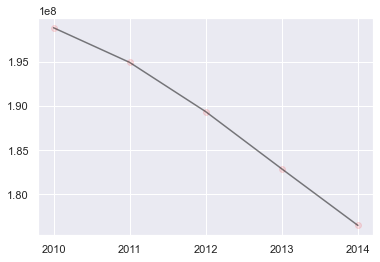

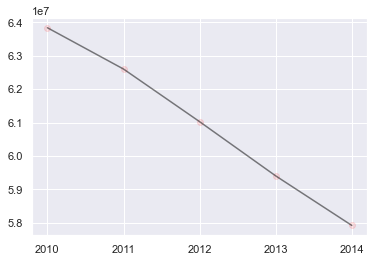

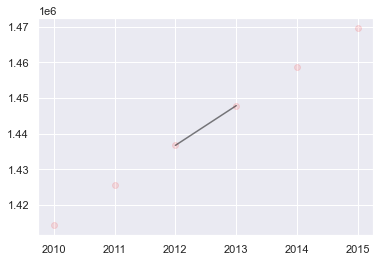

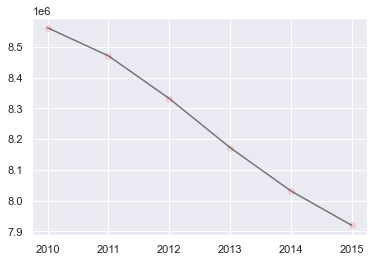

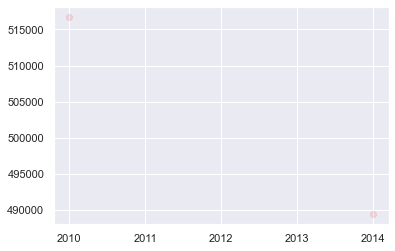

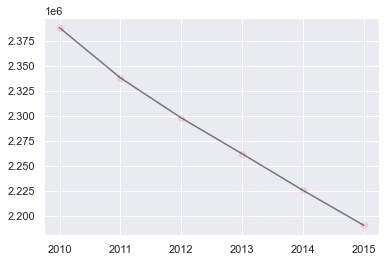

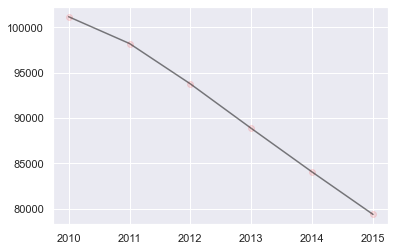

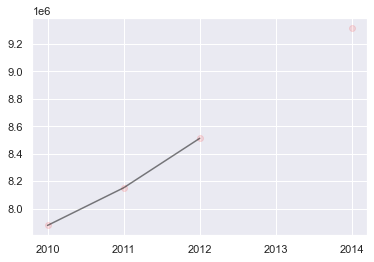

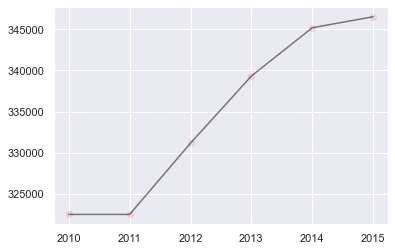

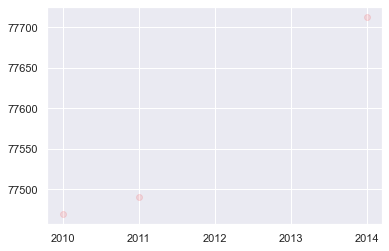

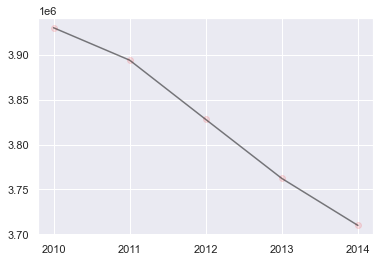

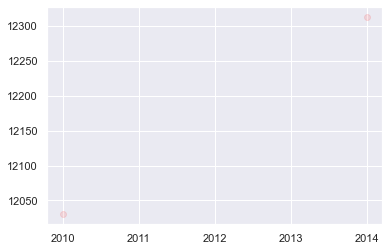

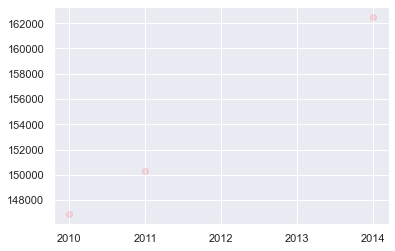

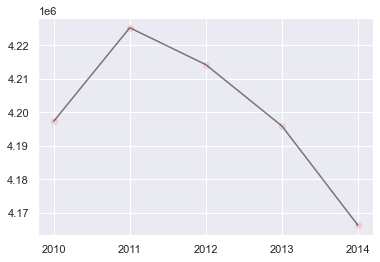

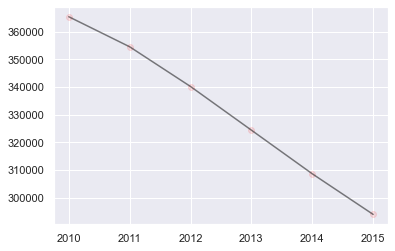

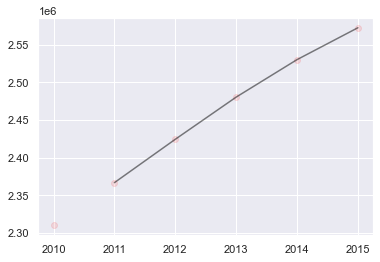

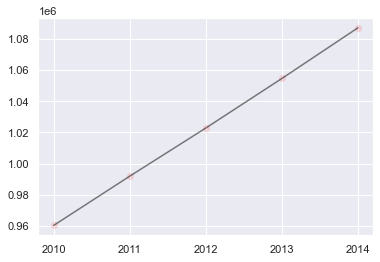

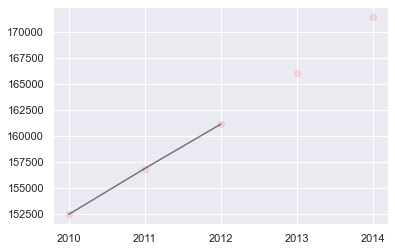

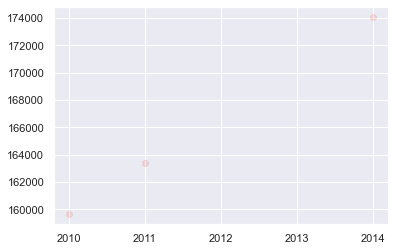

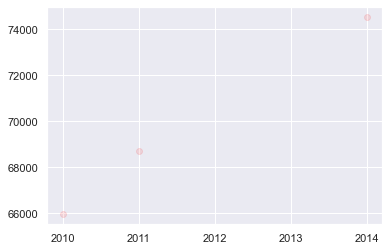

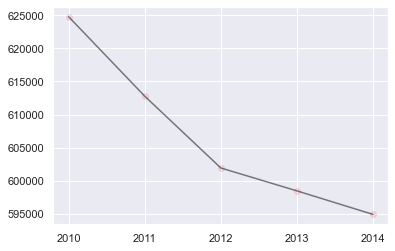

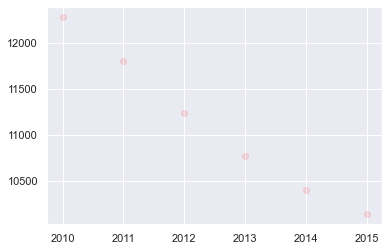

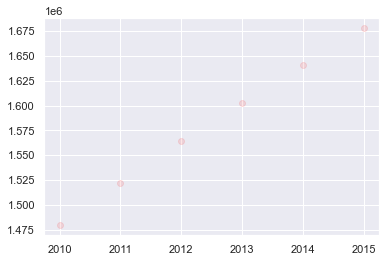

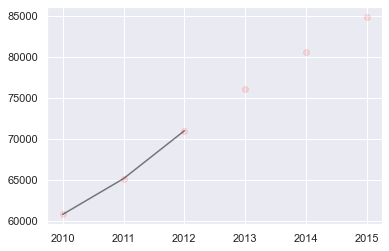

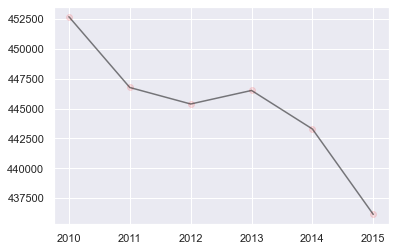

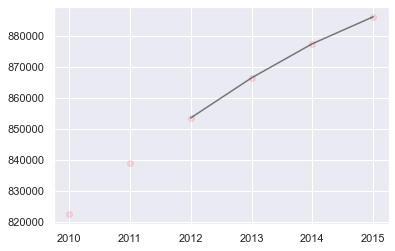

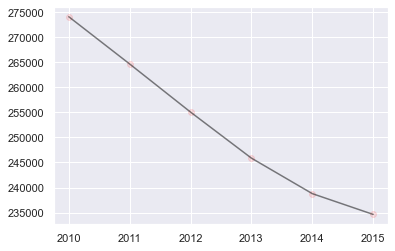

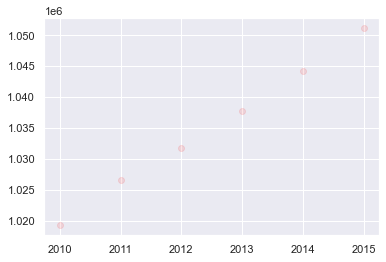

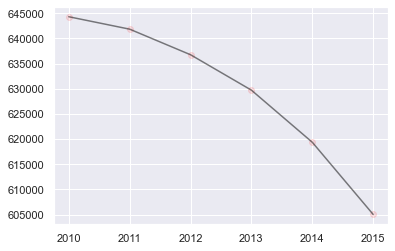

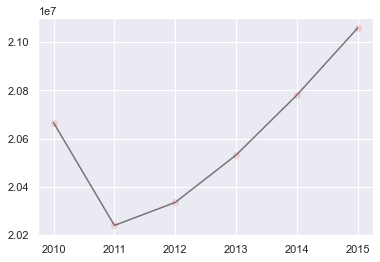

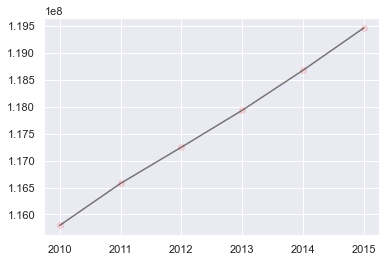

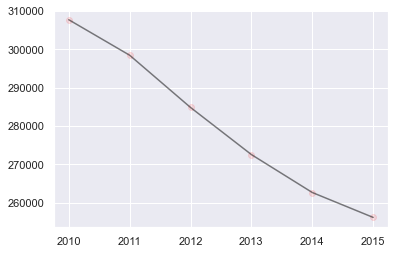

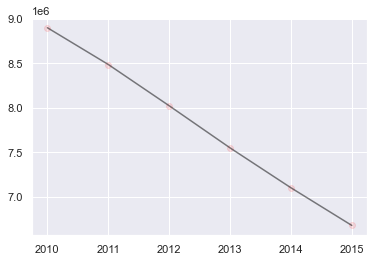

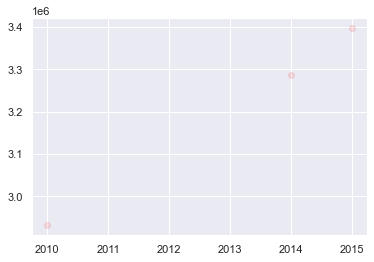

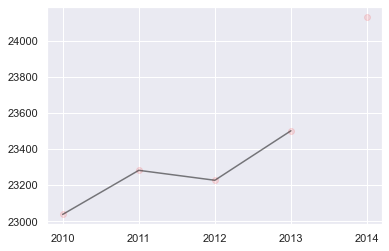

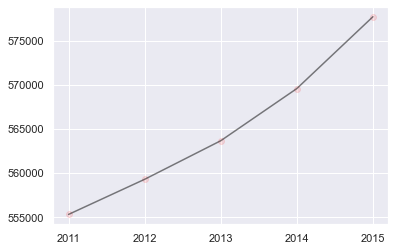

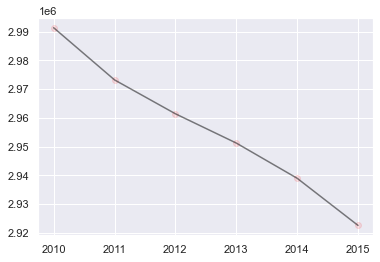

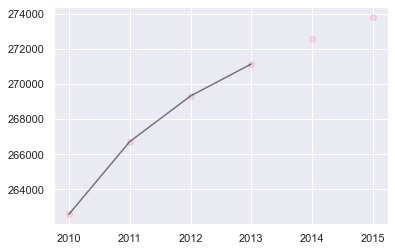

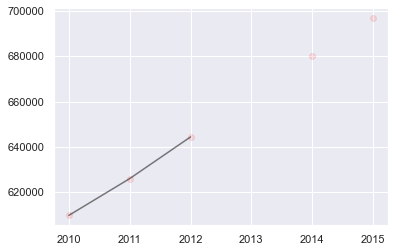

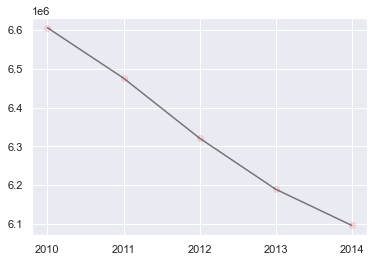

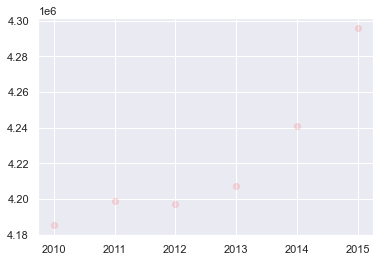

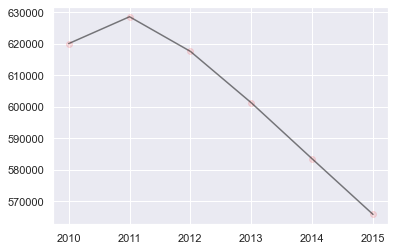

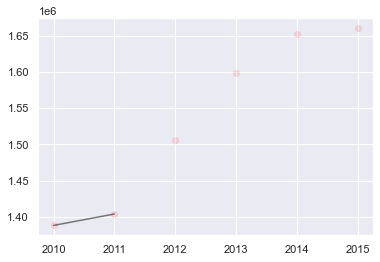

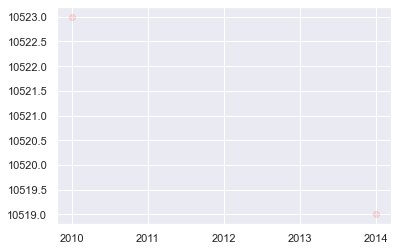

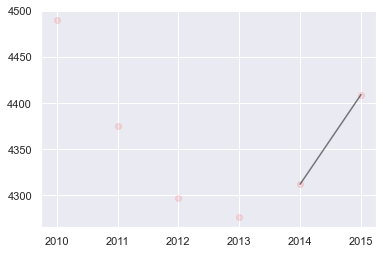

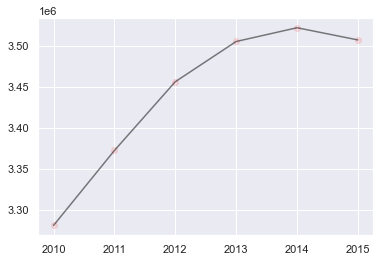

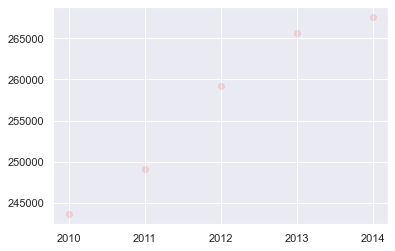

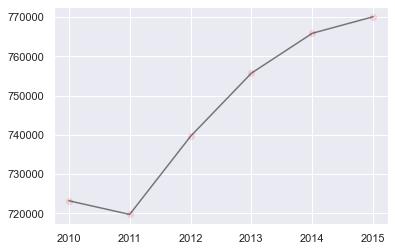

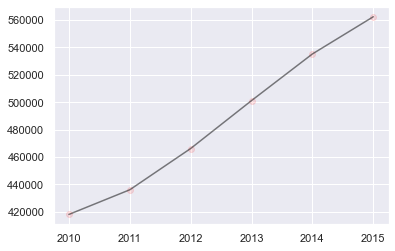

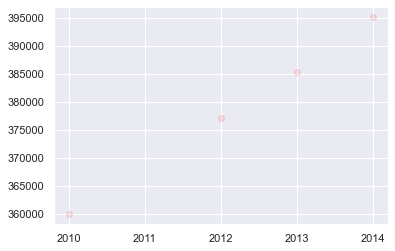

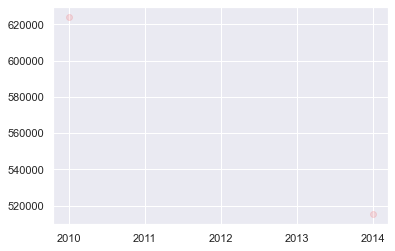

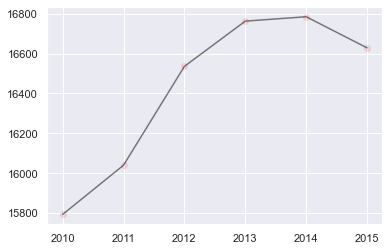

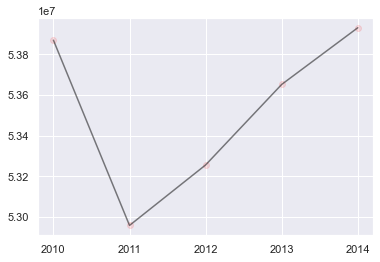

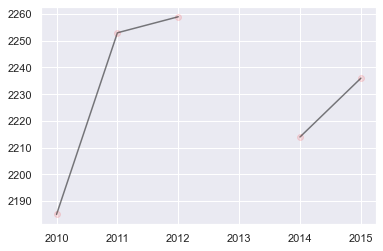

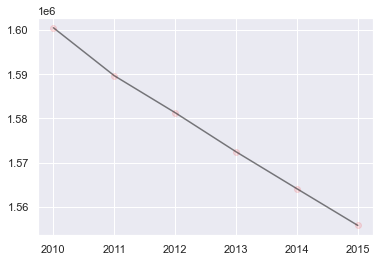

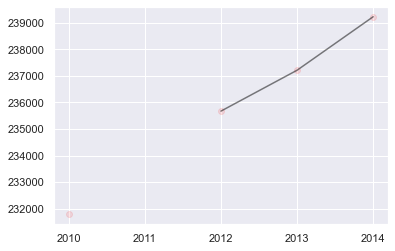

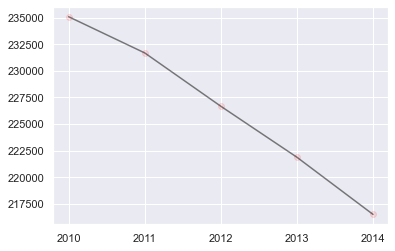

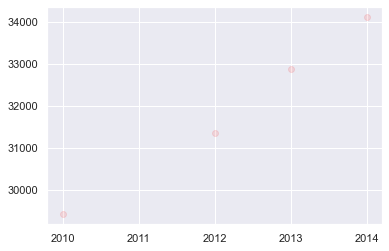

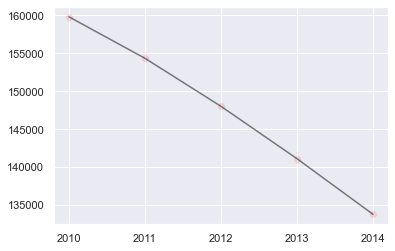

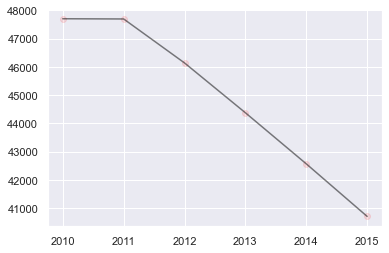

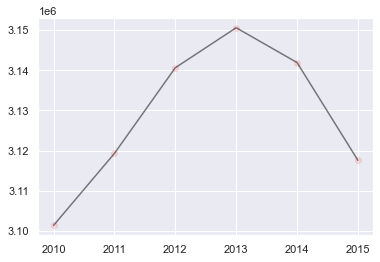

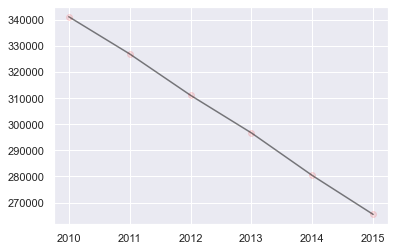

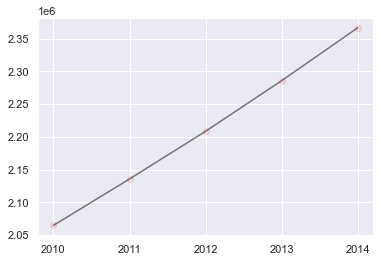

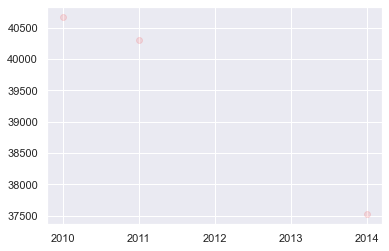

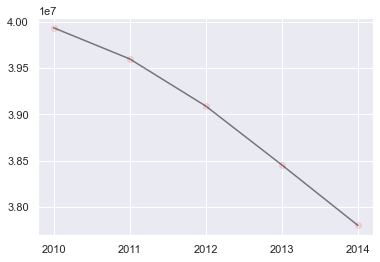

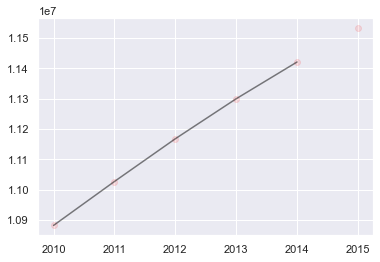

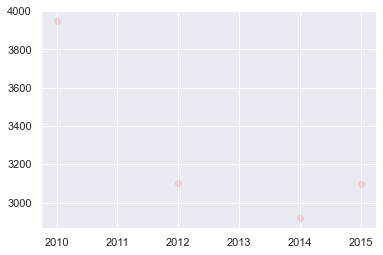

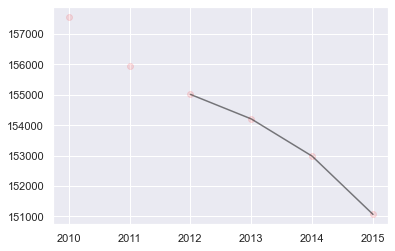

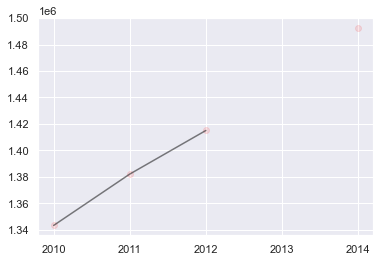

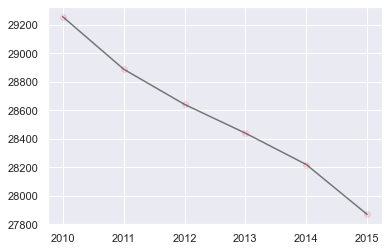

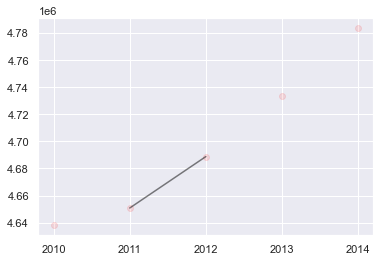

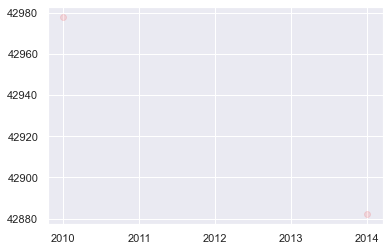

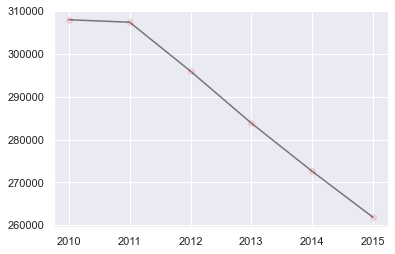

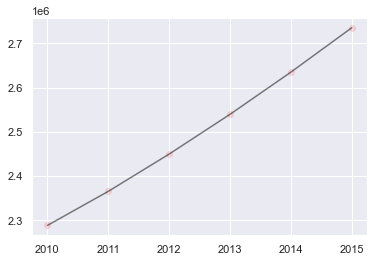

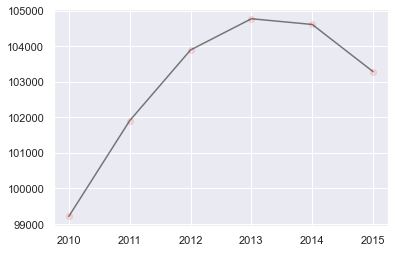

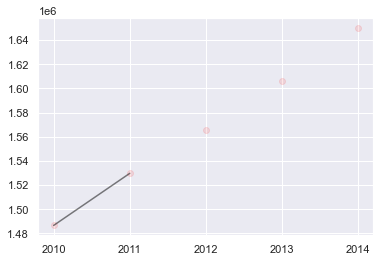

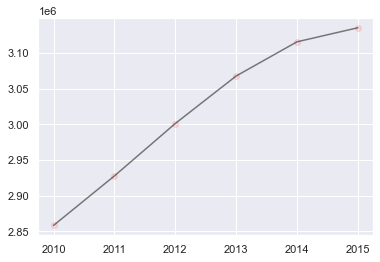

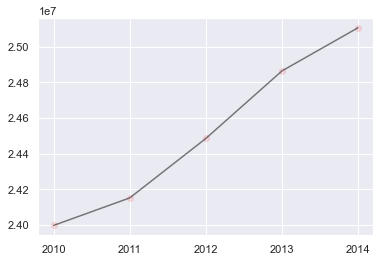

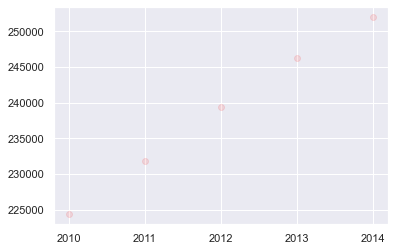

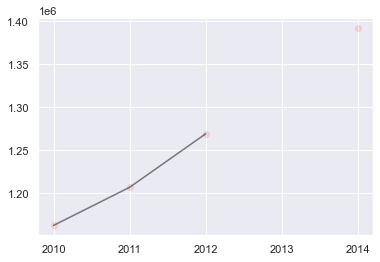

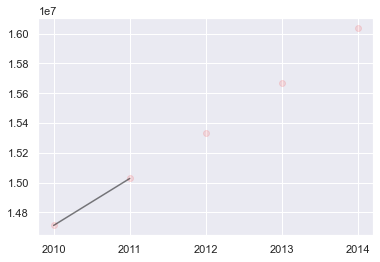

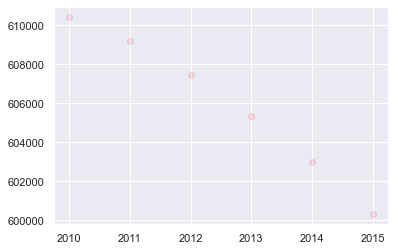

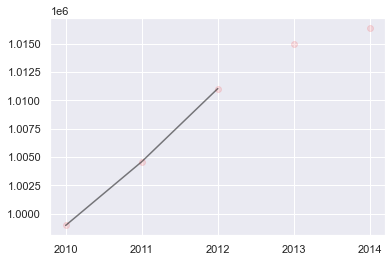

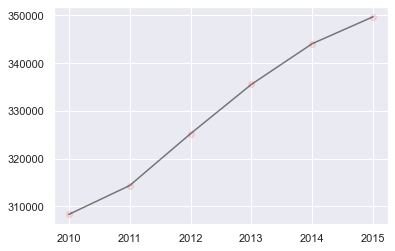

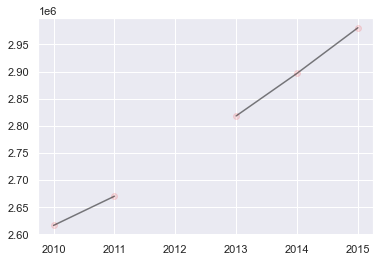

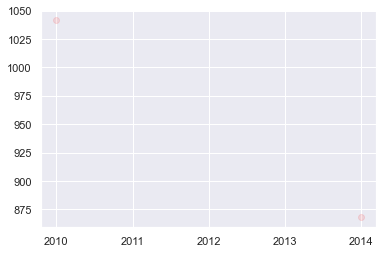

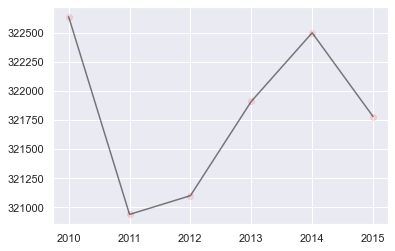

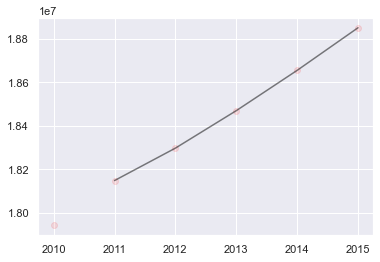

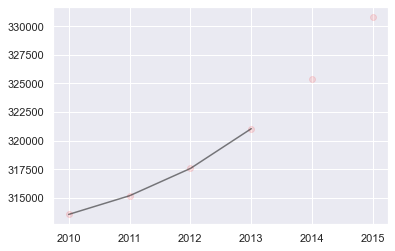

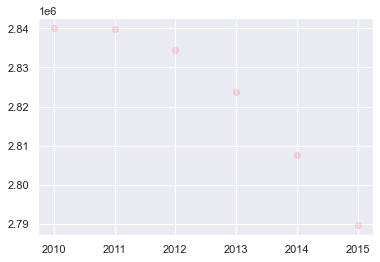

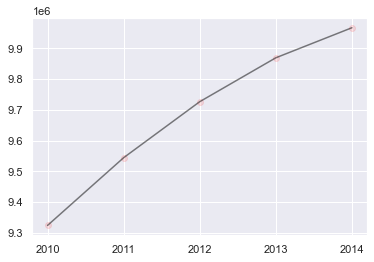

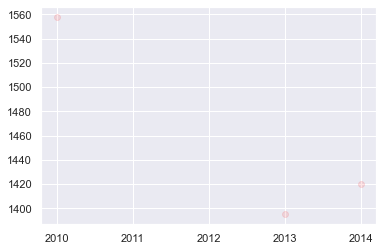

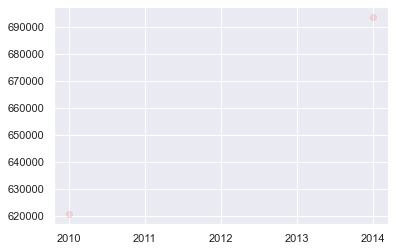

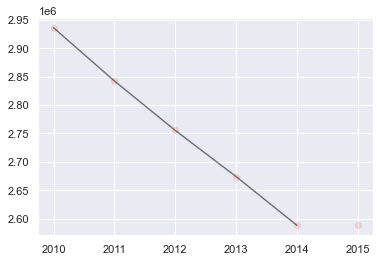

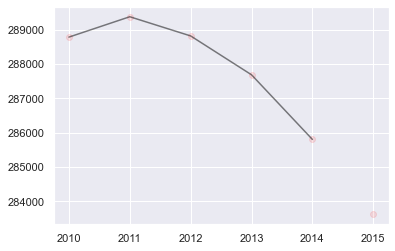

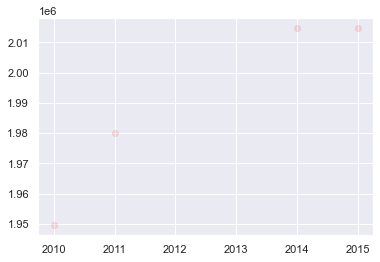

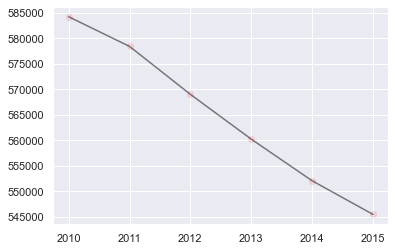

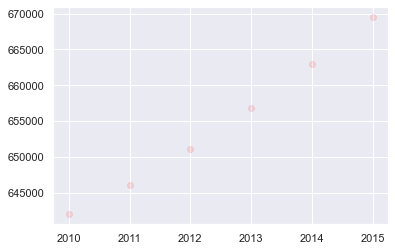

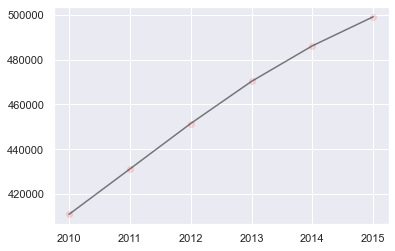

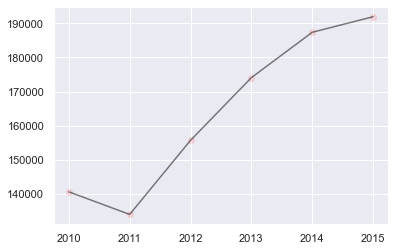

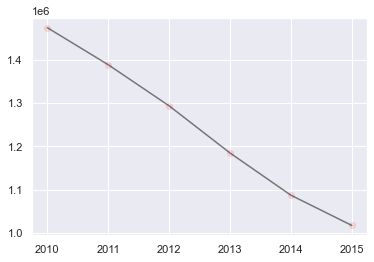

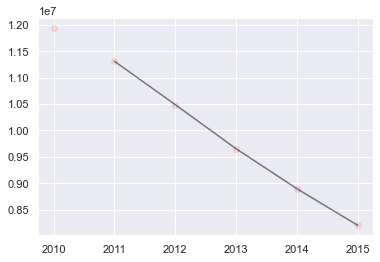

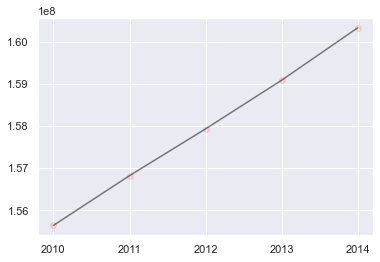

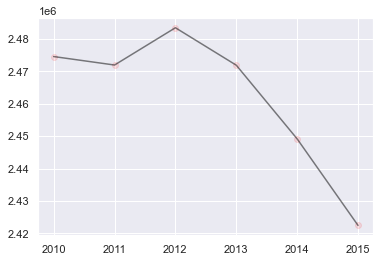

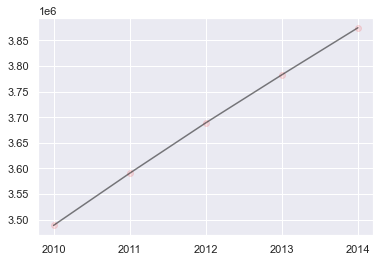

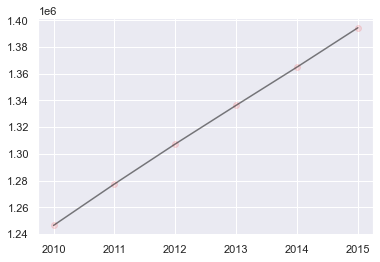

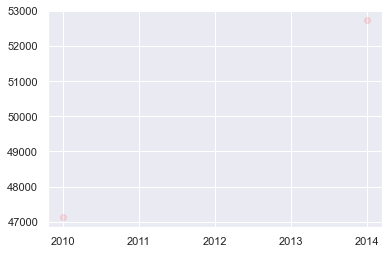

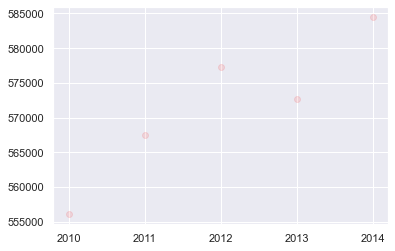

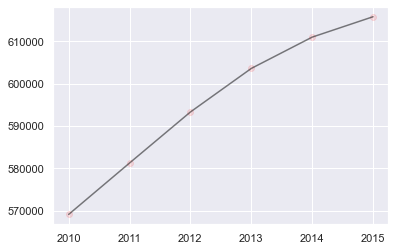

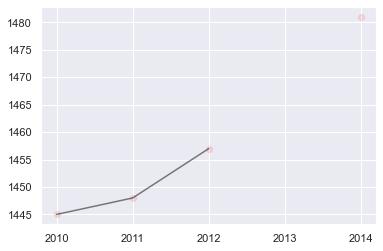

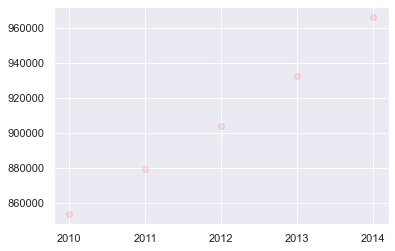

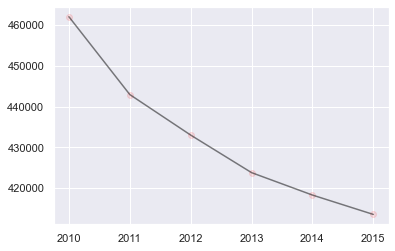

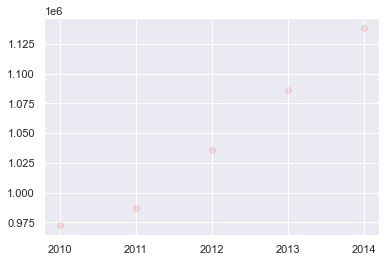

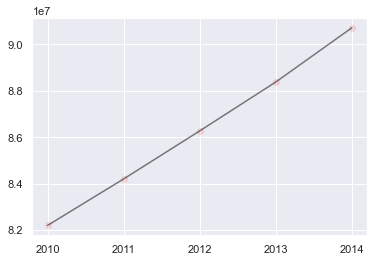

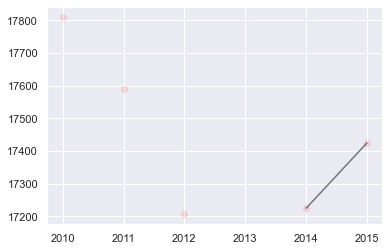

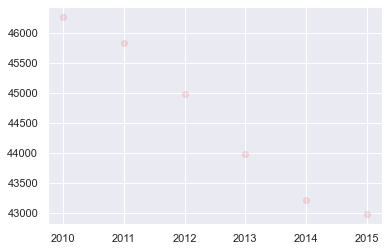

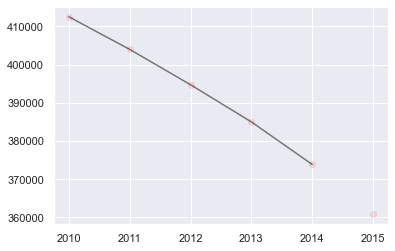

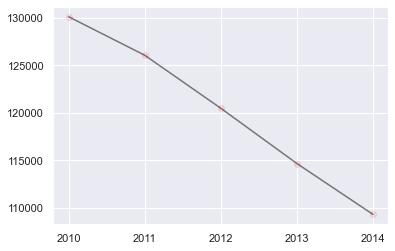

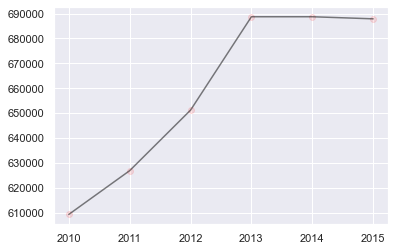

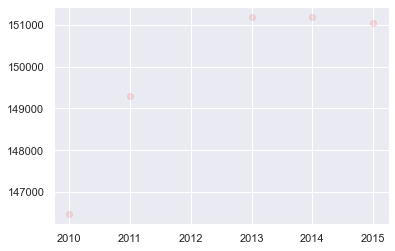

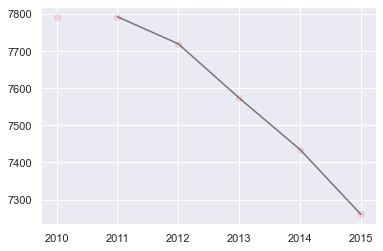

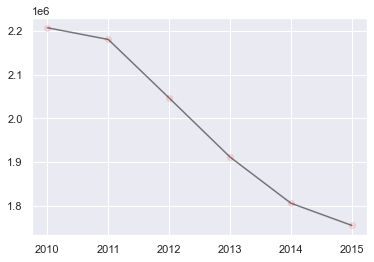

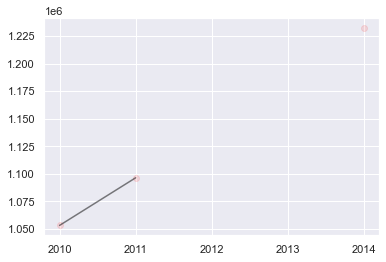

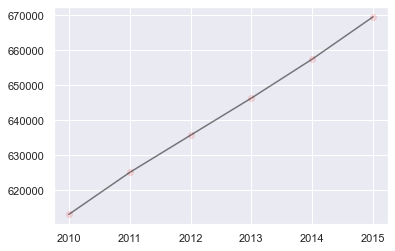

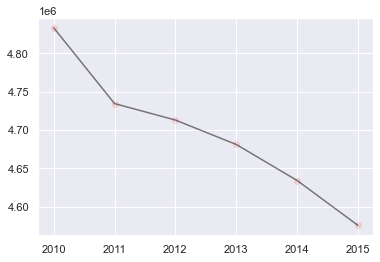

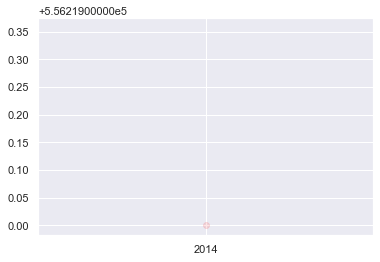

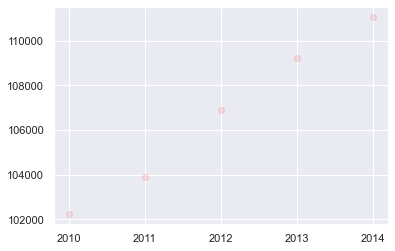

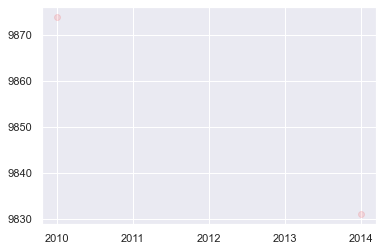

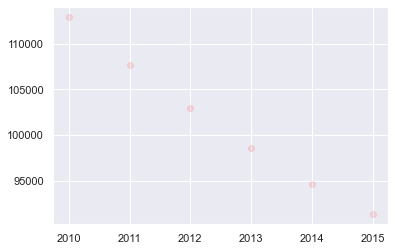

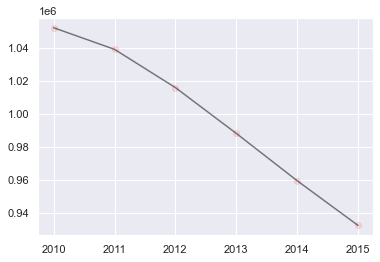

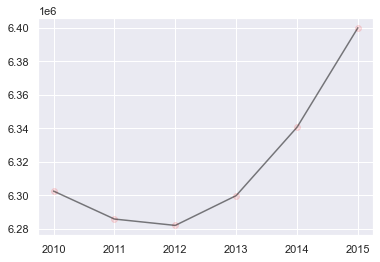

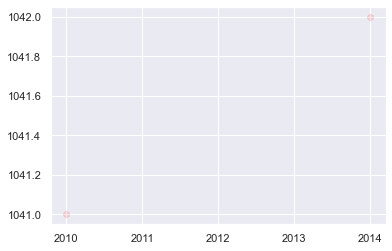

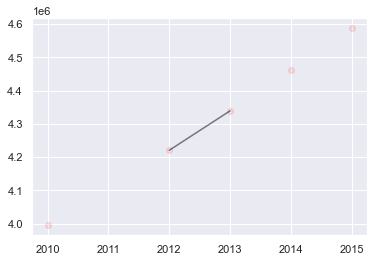

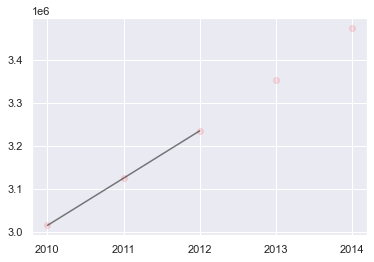

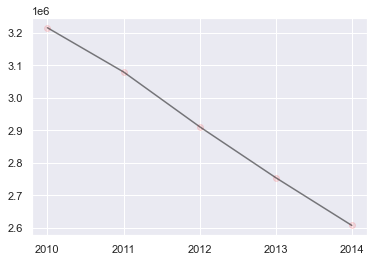

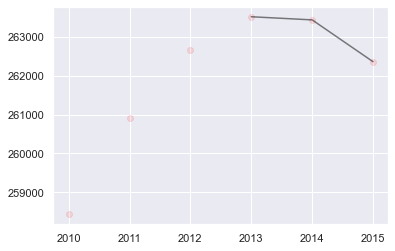

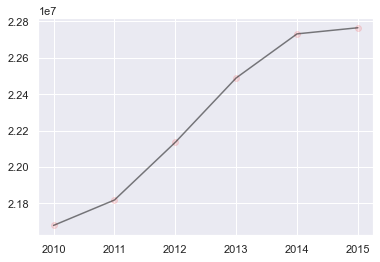

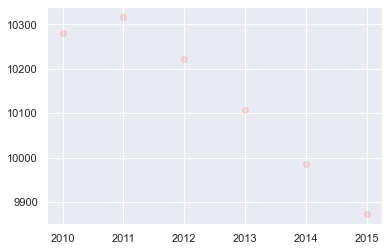

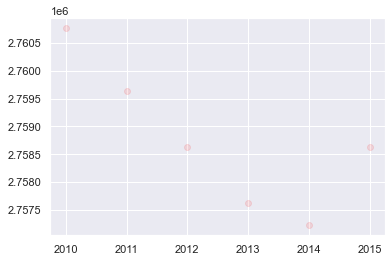

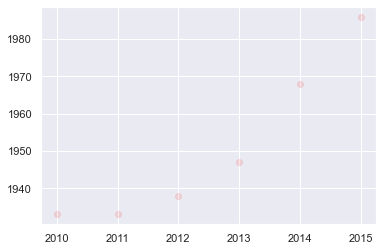

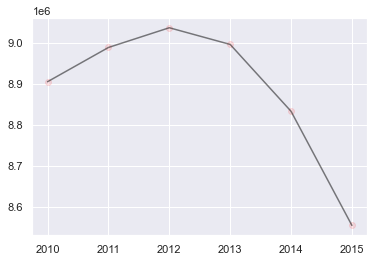

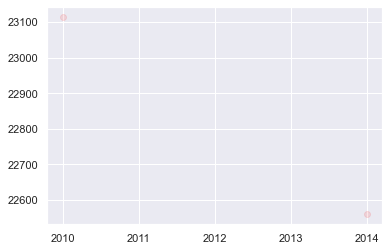

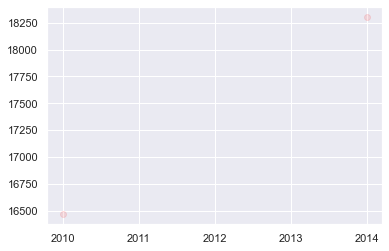

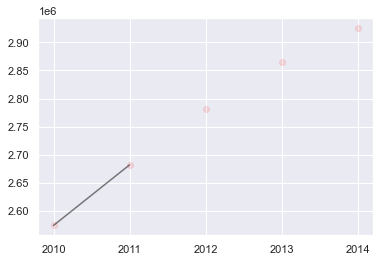

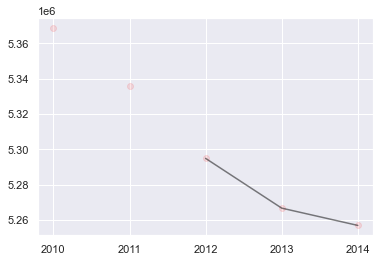

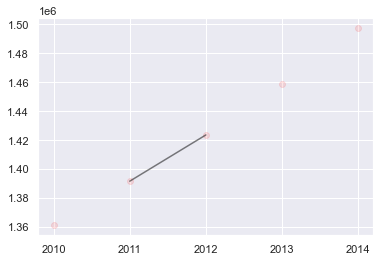

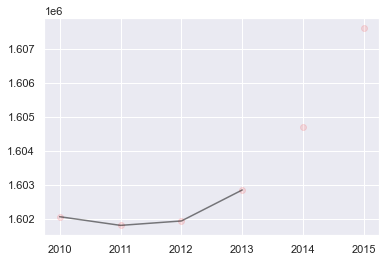

In [58]:
data_holes = data.loc[: ,data.isna().sum() != 0]
for c in data_holes.columns.values :
    plt.plot(data_holes[c], 'o', alpha=0.1, color = 'red')
    plt.plot(data4[c],'-', alpha=0.5, color = 'black')
    plt.show()

In [59]:
print(data.isna().sum().sum())
print(data.fillna(value = data4).isna().sum().sum())

349
349


#### Résumé : SP.TER.TOTL.IN, SE.TER.ENRL, SE.TER.ENRR
* SE.TER.ENRR = SE.TER.ENRL / SP.TER.TOTL.IN

#### SP.TER.TOTL.IN
Population avec l'âge pour 'teriary education'.

**************************************************
SP.TER.TOTL.IN


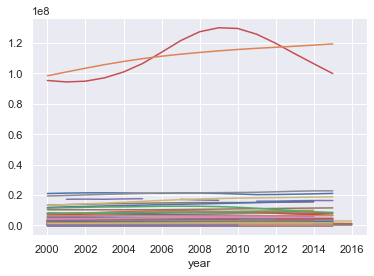

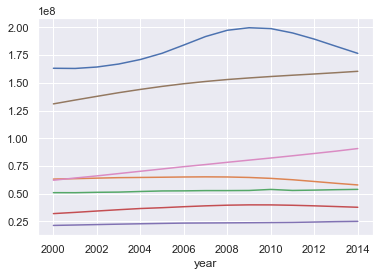

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 206 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI'
 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL'
 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR'
 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI'
 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH'
 'FIN' 'FJI' 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB'
 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND'
 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ'
 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE'
 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX'
 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' '

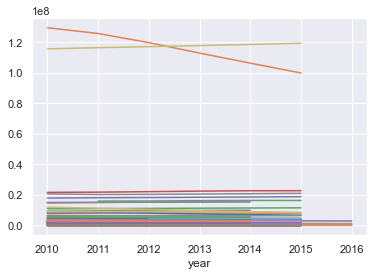

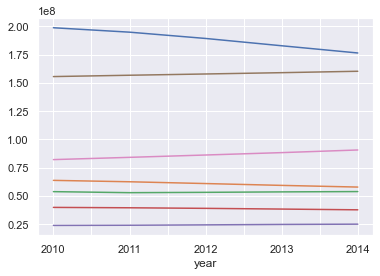

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 202 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB'
 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK'
 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI'
 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD'
 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ'
 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA'
 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU'
 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI'
 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC' 'NAM' 'NER'
 'NGA' 'NIC' 'NLD' 'NOR' 'NPL'

In [60]:
ind = 'SP.TER.TOTL.IN'
initial_investigation(ind)[0].T.info()

#### Résumé: SP.TER.TOTL.IN
* Pour 195 pays, il y a de la data pour les années 2010-2016.
    * 22 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 75% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Pour les 202 pays et régions, il y a de data pour l'année 2014.**
* Garder que tous ces 205 pays.
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [61]:
ind = 'SP.TER.TOTL.IN'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop data, where half of the data points are missing and there are no data points for the last 3 years (2014, 2015, 2016)
data = drop_countries(data,3)

The following countries were dropped :
['AND', 'ARE', 'ASM', 'BIH', 'CHI', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM', 'IMN', 'MAF', 'MCO', 'MNP', 'NCL', 'OMN', 'PYF', 'SGP', 'SXM', 'TCA', 'VIR', 'XKX']


In [62]:
len(data.columns.values)

202

In [63]:
data_clean = fill_indicator_linear(data)
data_clean.T[years].describe()

2010          2011          2012          2013          2014  \
count  2.020000e+02  2.020000e+02  2.020000e+02  2.020000e+02  2.020000e+02   
mean   6.108873e+06  6.083296e+06  6.045661e+06  5.999616e+06  5.955561e+06   
std    2.290728e+07  2.270690e+07  2.239605e+07  2.204517e+07  2.172879e+07   
min    1.041000e+03  9.985000e+02  9.550000e+02  9.115000e+02  8.680000e+02   
25%    1.465625e+05  1.495585e+05  1.512834e+05  1.519482e+05  1.516418e+05   
50%    6.223820e+05  6.277225e+05  6.405560e+05  6.380365e+05  6.267365e+05   
75%    2.486400e+06  2.564956e+06  2.664337e+06  2.640306e+06  2.602514e+06   
max    1.988264e+08  1.949116e+08  1.893518e+08  1.828877e+08  1.765053e+08   

               2015          2016  
count  2.020000e+02  2.020000e+02  
mean   5.910514e+06  5.865477e+06  
std    2.143240e+07  2.115405e+07  
min    8.245000e+02  7.810000e+02  
25%    1.510522e+05  1.495862e+05  
50%    6.123205e+05  6.143760e+05  
75%    2.584005e+06  2.608119e+06  
max    1.701229e+08  1.637405e+08

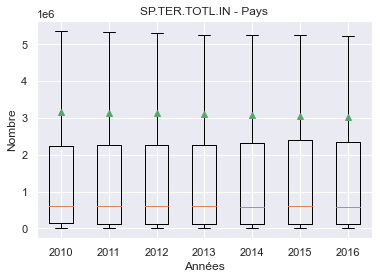

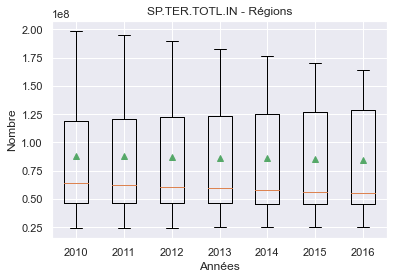

2014
Pays
Median:  594905.0
Mean:  3080556.553846154
Std:  11753540.096847855


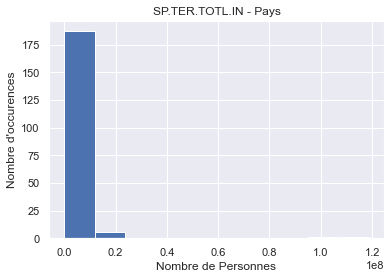

Régions
Median:  57917924.0
Mean:  86044976.0
Std:  59983195.82877391


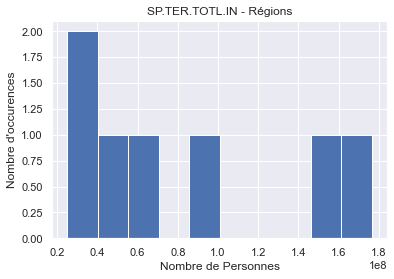

2016
Pays
Median:  589675.0
Mean:  3032523.487008547
Std:  11284319.487551749


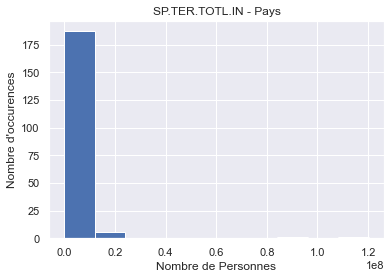

Régions
Median:  54949364.0
Mean:  84783474.28571428
Std:  57852846.47421718


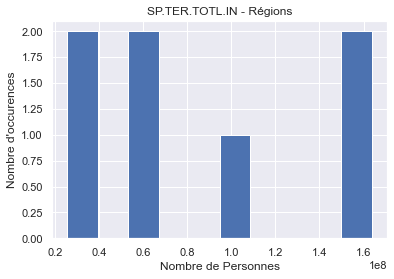

In [64]:
plot_boxplot(ind, data_clean, unit = "Nombre", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "Nombre de Personnes", ind = ind)
print_info_year('2016', data_clean, unit = "Nombre de Personnes", ind = ind)

#### Résumé: SP.TER.TOTL.IN
* **Garde 195 pays et 7 régions**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont   590 000,  3 030 000 et 11 200 000 personnes pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 54 900 000, 84 800 000 et 57 900 000 personnes pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne information sur la taille du marché - nombre absolute des potentielle clients.

In [65]:
#save the cleaned data
data_clean['indicator'] = ind
#DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEAN = pd.concat([DATA_CLEAN, deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'}))])

#### SE.TERR.ENRL

**************************************************
SE.TER.ENRL


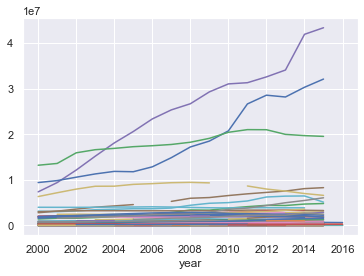

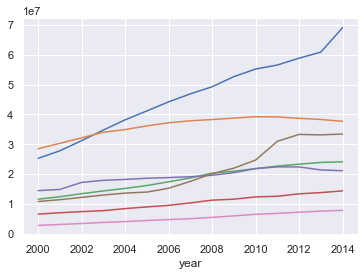

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 201 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLR' 'BLZ' 'BMU'
 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV'
 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE'
 'DEU' 'DJI' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB'
 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL'
 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM'
 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO'
 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' '

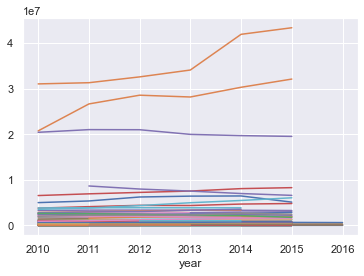

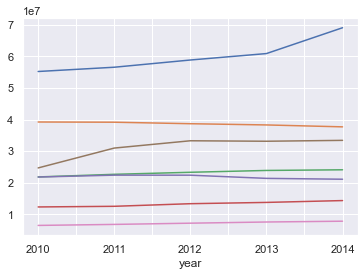

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 179 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE'
 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLR' 'BLZ' 'BMU' 'BRA'
 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DNK' 'DOM'
 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FRA' 'GBR'
 'GEO' 'GHA' 'GIN' 'GMB' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HUN'
 'IDN' 'IND' 'IRL' 'IRN' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KGZ'
 'KHM' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO'
 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC' 'NER'
 'NGA' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'POL'
 'PRI' 'PRK' 'PRT' 'PRY' 'PSE'

In [66]:
ind = 'SE.TER.ENRL'
initial_investigation(ind)[0].T.info()

#### Résumé: SE.TER.ENRL
* Pour 172 pays, il y a de la data pour les années 2010-2016.
    * 45 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 66% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Le plus complète année entre 2010-2016 est 2011.**
* **Presque pas de data pour 2016**
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [67]:
ind = 'SE.TER.ENRL'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop data, where half of the data points are missing and there are no data points for the last 7 years (2010 - 2016)
data = drop_countries(data,7)
len(data.columns.values)

The following countries were dropped :
['ASM', 'BHS', 'BOL', 'CAN', 'CHI', 'CYM', 'DMA', 'FJI', 'FRO', 'FSM', 'GAB', 'GIB', 'GNB', 'GNQ', 'GRL', 'GUM', 'HTI', 'IMN', 'IRQ', 'KEN', 'KIR', 'LBY', 'MAF', 'MCO', 'MNP', 'NAM', 'NCL', 'NIC', 'NRU', 'PNG', 'PYF', 'SLB', 'SLE', 'SOM', 'SSD', 'SUR', 'TON', 'TTO', 'TUV', 'VCT', 'VEN', 'VIR', 'VUT', 'WSM', 'XKX']


179

In [68]:
data_clean = fill_indicator_linear(data)
data_clean.T[years].describe()

2010          2011          2012          2013          2014  \
count  1.740000e+02  1.760000e+02  1.780000e+02  1.790000e+02  1.790000e+02   
mean   2.033117e+06  2.119672e+06  2.169032e+06  2.194427e+06  2.309677e+06   
std    6.685459e+06  6.995208e+06  7.189889e+06  7.260554e+06  7.886376e+06   
min    5.000000e+00  6.120000e+01  1.000000e+02  1.736000e+02  1.780000e+02   
25%    3.343775e+04  3.541150e+04  3.951850e+04  3.935750e+04  4.146000e+04   
50%    1.954315e+05  1.930655e+05  1.933920e+05  2.052470e+05  2.091700e+05   
75%    6.367699e+05  6.598178e+05  6.608245e+05  6.838275e+05  7.422880e+05   
max    5.523363e+07  5.658473e+07  5.887421e+07  6.091618e+07  6.909780e+07   

               2015          2016  
count  1.790000e+02  1.790000e+02  
mean   2.371853e+06  2.434170e+06  
std    8.356682e+06  8.849926e+06  
min    1.940000e+02  2.100000e+02  
25%    4.165600e+04  4.253450e+04  
50%    2.164680e+05  2.158995e+05  
75%    7.342255e+05  7.338490e+05  
max    7.727942e+07  8.546105e+07

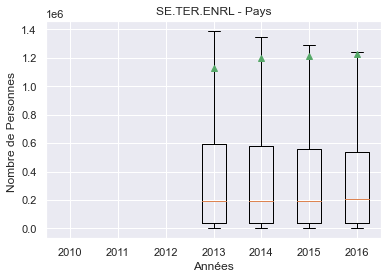

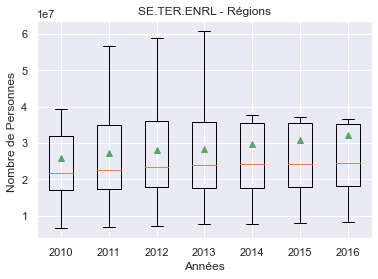

2014
Pays
Median:  190638.5
Mean:  1197189.7753050125
Std:  4309610.820330442


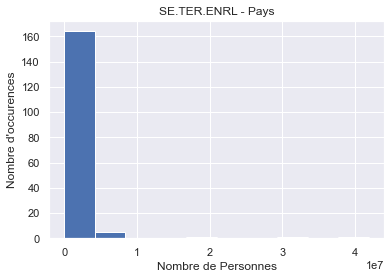

Régions
Median:  24087544.0
Mean:  29645084.214285713
Std:  20212674.8408585


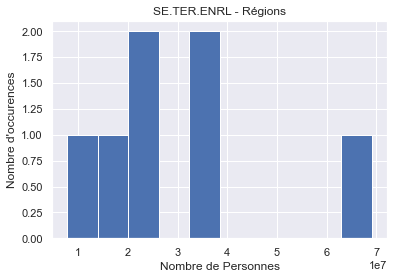

2016
Pays
Median:  207552.5
Mean:  1226464.124146626
Std:  4602886.837419653


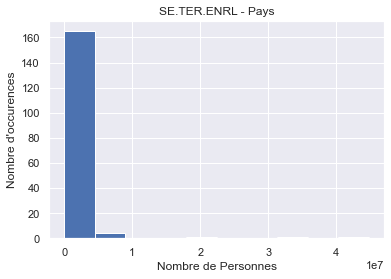

Régions
Median:  24503504.0
Mean:  32109215.92857143
Std:  25505352.558783434


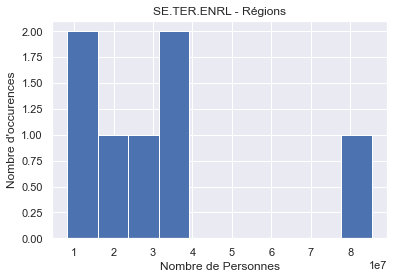

In [69]:
plot_boxplot(ind, data_clean, unit = "Nombre de Personnes ", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "Nombre de Personnes", ind = ind)
print_info_year('2016', data_clean, unit = "Nombre de Personnes", ind = ind)

#### Résumé: SE.TER.ENRL
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont   207 000,  1 230 000 et 4 600 000 personnes pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 24 500 000, 32 100 000 et 25 500 000 personnes pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne information sur la taille du marché - nombre absolute des potentielle clients.

In [70]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()
print(DATA.isna().sum().sum())
print(DATA_CLEANED.isna().sum().sum())

164156
163108


#### SE.TER.ENRR

**************************************************
SE.TER.ENRR


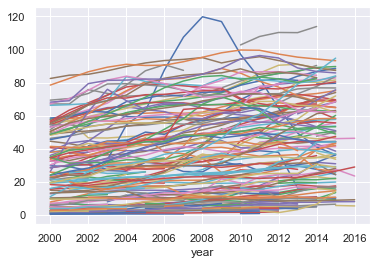

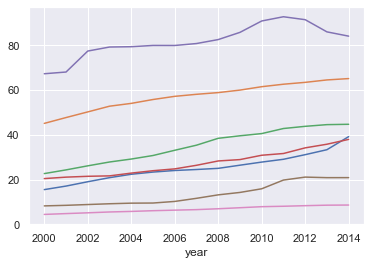

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 192 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB'
 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DNK' 'DOM'
 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA'
 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM'
 'GUY' 'HKG' 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KNA' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC'
 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE'
 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' '

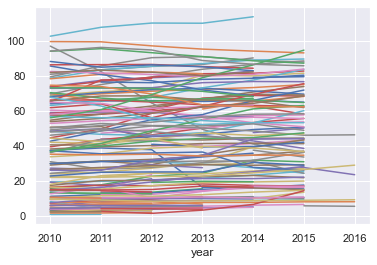

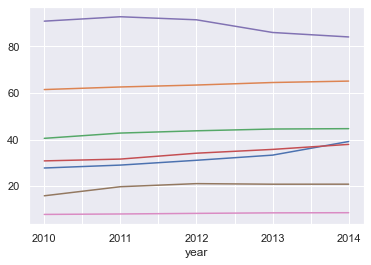

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 172 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BLR' 'BLZ' 'BMU' 'BRA' 'BRB' 'BRN' 'BTN'
 'BWA' 'CAF' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS'
 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FRA' 'GBR' 'GEO' 'GHA' 'GIN'
 'GMB' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL'
 'IRN' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KGZ' 'KHM' 'KNA' 'KOR'
 'KWT' 'LAO' 'LBN' 'LBR' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR'
 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC' 'NER' 'NGA' 'NLD' 'NOR'
 'NPL' 'NZL' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'POL' 'PRI' 'PRK' 'PRT' 'PRY'
 'PSE' 'QAT' 'ROU' 'RUS' 'RWA'

In [71]:
ind = 'SE.TER.ENRR'
initial_investigation(ind)[0].T.info()

#### Résumé: SE.TER.ENRR
* Pour 165 pays, il y a de la data pour les années 2010-2016.
    * 52 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 66% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Le plus complète année entre 2010-2016 est 2011.**
* **Presque pas de data pour 2016**
* Garder que tous ces 175 pays (pour l'instant).
* Voir si on peut remplir cette variable avec SE.TER.ENRL and SP.TER.TOTL.IN
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [72]:
ind = 'SE.TER.ENRR'
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]

ind2 = 'SE.TER.ENRL'
ind3 = 'SP.TER.TOTL.IN'
data2 = make_2D_map(DATA_CLEANED, ind2, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
data3 = make_2D_map(DATA_CLEANED, ind3, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
data4 = data2.div(data3).multiply(100)

In [73]:
print(data.T.isna().sum())
print(data4.T.isna().sum())

year
2000     98
2001     96
2002     86
2003     87
2004     86
2005     92
2006     92
2007     94
2008     91
2009     84
2010     84
2011     79
2012     81
2013     92
2014     98
2015    124
2016    217
dtype: int64
year
2000    96
2001    86
2002    76
2003    70
2004    66
2005    66
2006    65
2007    64
2008    61
2009    56
2010    56
2011    54
2012    53
2013    52
2014    52
2015    52
2016    52
dtype: int64


In [74]:
#fill holes will cleand data from the previous two indicators
years = [str(y) for y in range(2010, 2017)]
data_clean = data.fillna(value = data4)
data_clean.T[years].describe()

year         2010        2011        2012        2013        2014        2015  \
count  168.000000  170.000000  171.000000  172.000000  172.000000  172.000000   
mean    36.741256   37.415041   38.009371   38.661046   39.413400   39.830921   
std     27.010125   27.308132   27.144390   27.104799   27.402937   27.666776   
min      0.692570    0.797730    0.901064    0.997396    1.086190    1.170342   
25%     12.346864   12.149930   12.331515   13.277122   13.468025   14.452610   
50%     32.604329   32.383079   32.231331   34.332636   37.702419   36.794924   
75%     58.178133   59.595551   59.823154   62.172310   63.241416   62.792811   
max    102.730873  107.828552  110.263123  110.162682  113.871788  117.625553   

year         2016  
count  172.000000  
mean    40.250979  
std     28.214153  
min      1.250207  
25%     15.418338  
50%     36.352352  
75%     62.524028  
max    121.424768

In [75]:
#drop countries for which there is no data in the 2010-2016
data_clean = drop_countries(data_clean.loc[years,:],7)
data_clean.T.describe()

The following countries were dropped :
['AND', 'ARE', 'ASM', 'BHS', 'BIH', 'BOL', 'CAN', 'CHI', 'CYM', 'DMA', 'FJI', 'FRO', 'FSM', 'GAB', 'GIB', 'GNB', 'GNQ', 'GRL', 'GUM', 'HTI', 'IMN', 'IRQ', 'KEN', 'KIR', 'LBY', 'MAF', 'MCO', 'MNP', 'NAM', 'NCL', 'NIC', 'NRU', 'OMN', 'PNG', 'PYF', 'SGP', 'SLB', 'SLE', 'SOM', 'SSD', 'SUR', 'SXM', 'TCA', 'TON', 'TTO', 'TUV', 'VCT', 'VEN', 'VIR', 'VUT', 'WSM', 'XKX']


year         2010        2011        2012        2013        2014        2015  \
count  168.000000  170.000000  171.000000  172.000000  172.000000  172.000000   
mean    36.741256   37.415041   38.009371   38.661046   39.413400   39.830921   
std     27.010125   27.308132   27.144390   27.104799   27.402937   27.666776   
min      0.692570    0.797730    0.901064    0.997396    1.086190    1.170342   
25%     12.346864   12.149930   12.331515   13.277122   13.468025   14.452610   
50%     32.604329   32.383079   32.231331   34.332636   37.702419   36.794924   
75%     58.178133   59.595551   59.823154   62.172310   63.241416   62.792811   
max    102.730873  107.828552  110.263123  110.162682  113.871788  117.625553   

year         2016  
count  172.000000  
mean    40.250979  
std     28.214153  
min      1.250207  
25%     15.418338  
50%     36.352352  
75%     62.524028  
max    121.424768

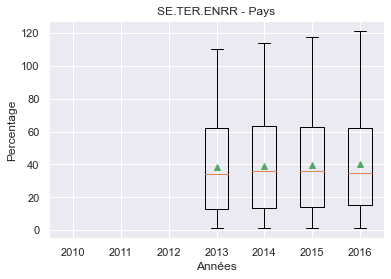

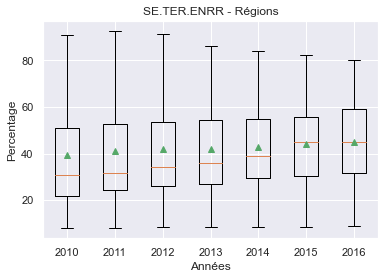

2014
Pays
Median:  35.7533302307129
Mean:  39.26564681410641
Std:  27.544802548059355


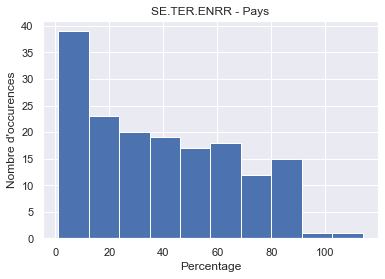

Régions
Median:  39.1477203369141
Mean:  42.89615508488248
Std:  25.460831132711878


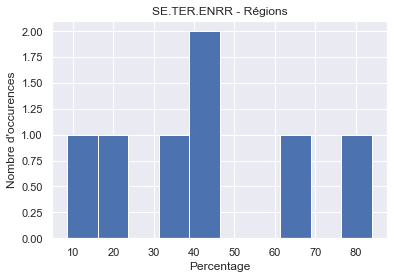

2016
Pays
Median:  34.608745120348395
Mean:  40.04410691173803
Std:  28.40114885669824


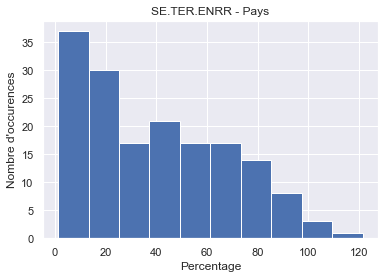

Régions
Median:  44.970908533516415
Mean:  45.12724820549618
Std:  24.706674832090915


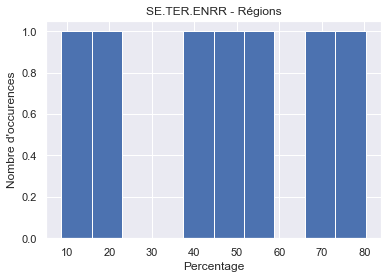

In [76]:
plot_boxplot(ind, data_clean, unit = "Percentage", years = years, showmeans = True)
print_info_year('2014', data_clean, unit = "Percentage", ind = ind)
print_info_year('2016', data_clean, unit = "Percentage", ind = ind)

#### Résumé: SE.TER.ENRR
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 34.6%, 40.0% et 28.4% pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 45.0%, 45.1% et 24.7% pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne une indication sur le niveau d'education du pays / de la région.

In [77]:
#See which countries have a rate above 100%
for c in data_clean.loc[:, data_clean.loc['2016',:] >= 100].columns.values:
    print(c, RAW_DATA[RAW_DATA['Country Code'] == c]['Country Name'].iloc[0])

GRC Greece
TUR Turkey


In [78]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### Education secondaire

In [79]:
my_indicators = ['SE.SEC.ENRL', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRR.UP', 
                 'UIS.E.3','UIS.E.3.GPV','UIS.NERA.3',
                 'SP.SEC.UTOT.IN']

In [80]:
num_c = []
for ind in my_indicators :
    print(50*'*')
    print(ind)
    data, dy, dc = initial_investigation(ind, output=False)
    num_c.append(len(dc))
    print()
    print(f"There are {len(dc)} countries for the indicator {ind}.")
    
print()
print(f"{my_indicators[num_c.index(max(num_c))]} has the most countries.")

**************************************************
SE.SEC.ENRL
Completeness for the years 2010-2016: 0.6768885564697082

year           2010          2011          2012          2013          2014  \
count  1.580000e+02  1.630000e+02  1.570000e+02  1.480000e+02  1.480000e+02   
mean   6.585123e+06  6.555549e+06  6.847195e+06  7.388847e+06  7.183491e+06   
std    2.199931e+07  2.205076e+07  2.274832e+07  2.361695e+07  2.367130e+07   
min    2.029000e+03  1.923000e+03  9.450000e+02  1.672000e+03  1.028000e+03   
25%    1.247535e+05  1.288475e+05  1.259070e+05  2.159632e+05  1.285220e+05   
50%    6.302390e+05  6.631150e+05  6.595580e+05  7.190543e+05  6.368005e+05   
75%    2.659874e+06  2.605746e+06  2.611168e+06  2.757749e+06  2.648677e+06   
max    1.626082e+08  1.616448e+08  1.597344e+08  1.596127e+08  1.542121e+08   

year           2015          2016  
count  1.230000e+02  8.000000e+00  
mean   3.442501e+06  1.678644e+06  
std    1.424738e+07  1.533353e+06  
min    1.289000e+03  1.

In [81]:
ind = 'SP.SEC.UTOT.IN'
ind2 = 'UIS.E.3'
ind3 = 'SE.SEC.ENRR.UP'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data = drop_countries(data,len(years))

data2 = make_2D_map(DATA, ind2, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data3 = make_2D_map(DATA, ind3, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data4 = data2.div(data3).multiply(100)

The following countries were dropped :
['AND', 'ASM', 'BIH', 'CHI', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM', 'IMN', 'MAF', 'MCO', 'MNP', 'NCL', 'PYF', 'SGP', 'SXM', 'TCA', 'VIR', 'XKX']


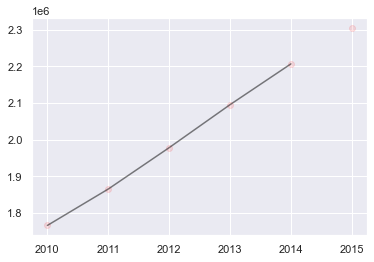

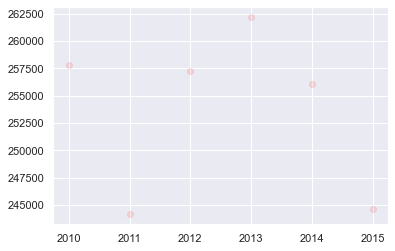

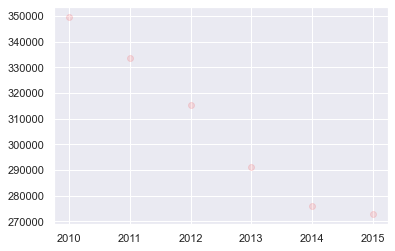

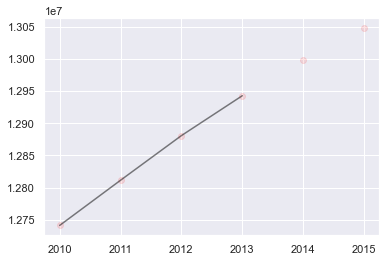

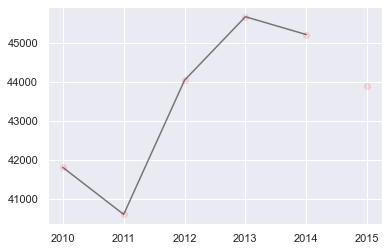

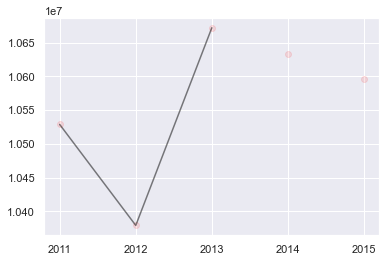

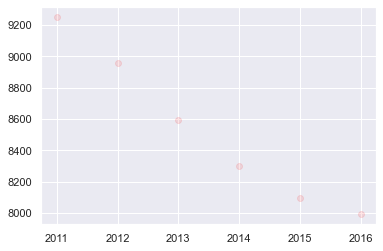

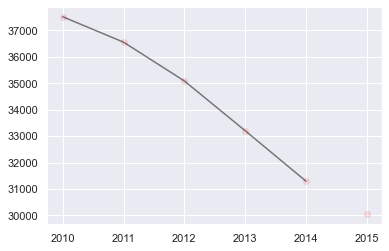

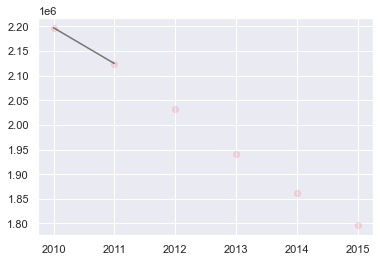

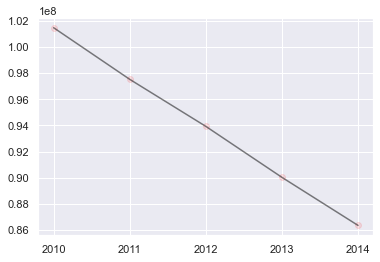

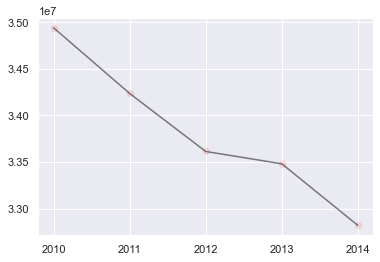

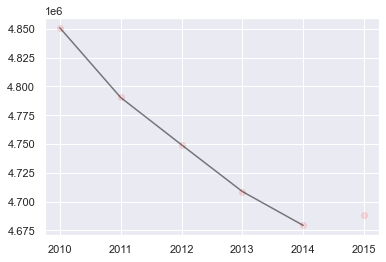

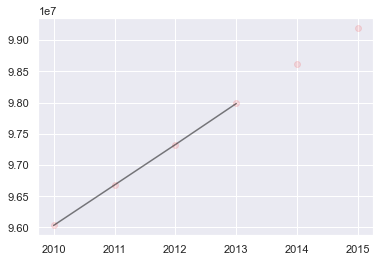

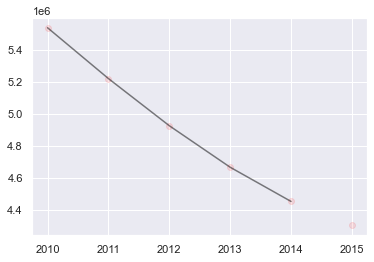

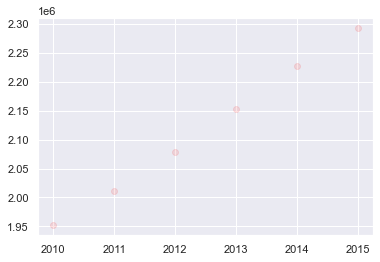

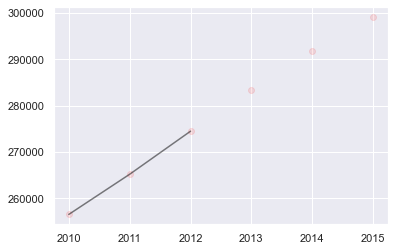

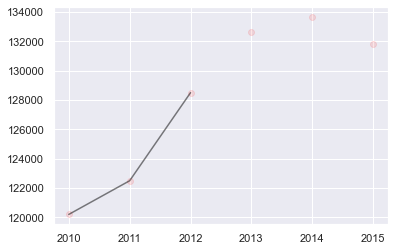

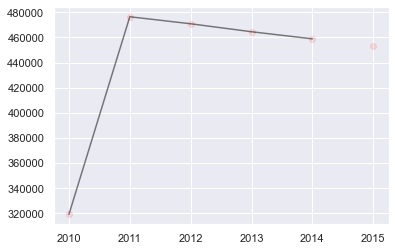

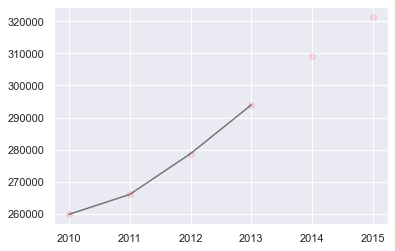

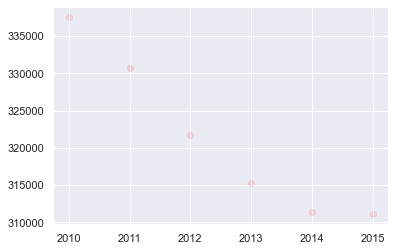

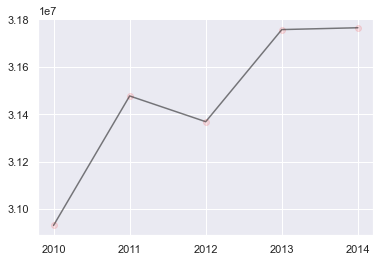

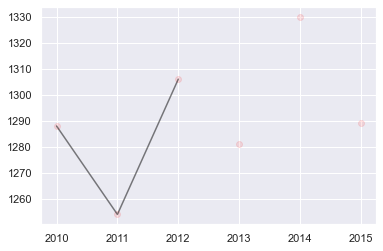

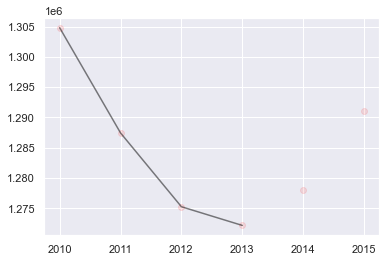

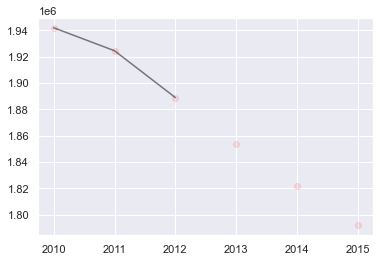

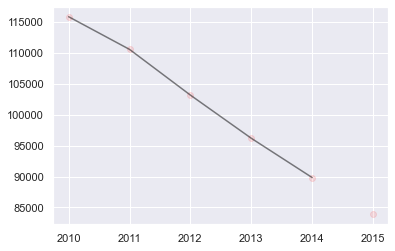

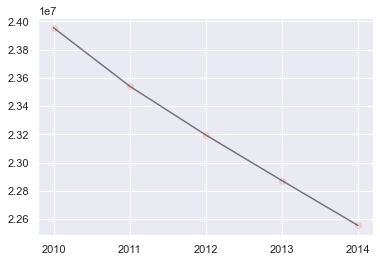

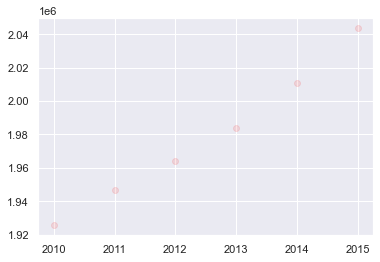

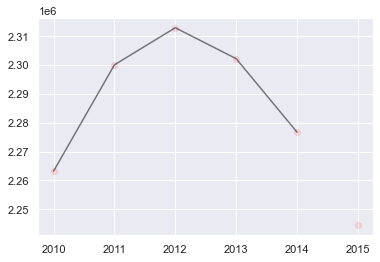

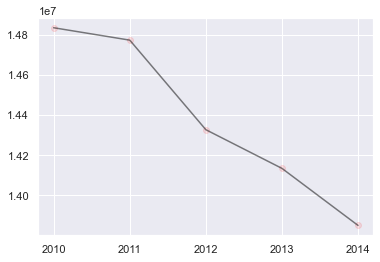

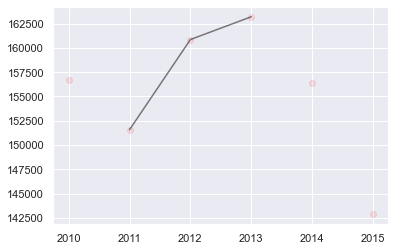

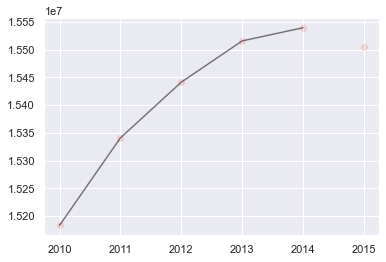

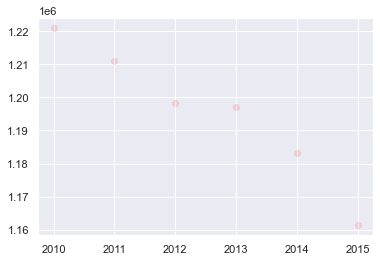

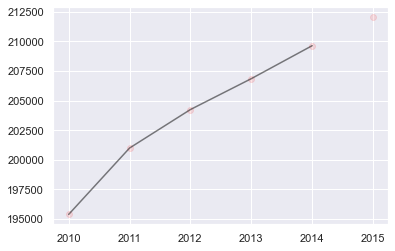

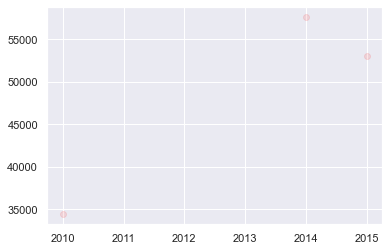

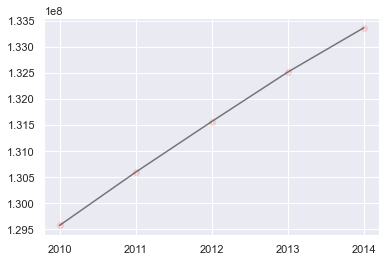

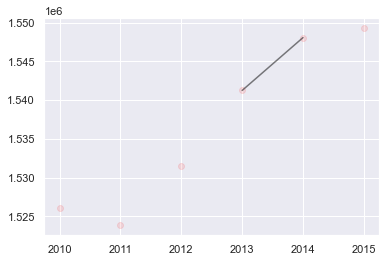

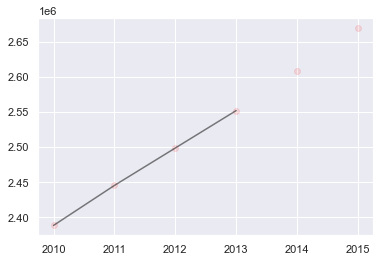

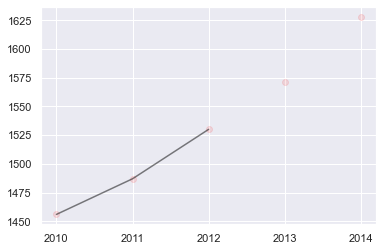

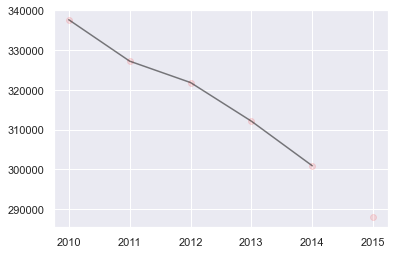

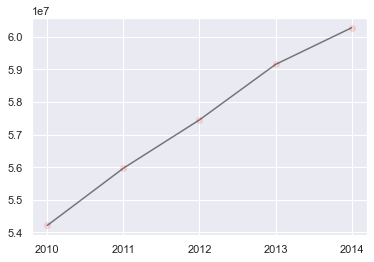

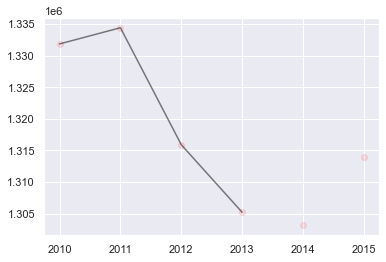

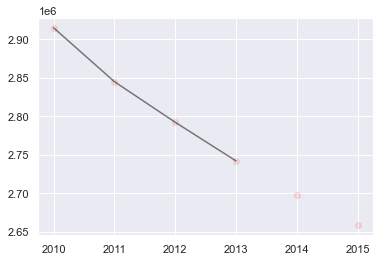

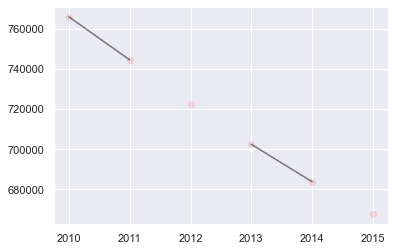

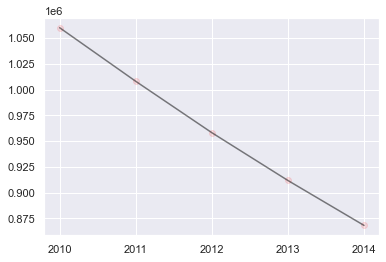

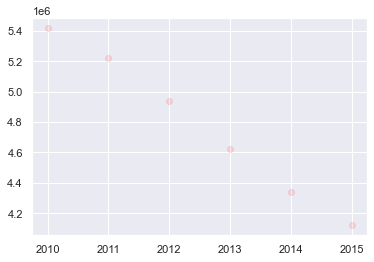

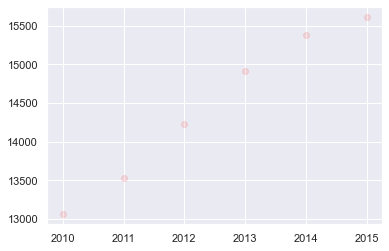

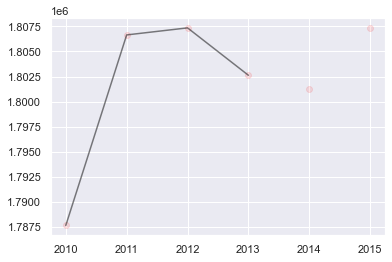

In [82]:
data_holes = data.loc[: ,data.isna().sum() != 0]
for c in data_holes.columns.values :
    plt.plot(data_holes[c], 'o', alpha=0.1, color = 'red')
    plt.plot(data4[c],'-', alpha=0.5, color = 'black')
    plt.show()

#### Résumé : SP.SEC.UTOT.IN, UIS.E.3, SE.SEC.ENRR.UP
* SE.SEC.ENRR.UP = UIS.E.3 / SP.SEC.UTOT.IN

#### SP.SEC.UTOT.IN

**************************************************
SP.SEC.UTOT.IN


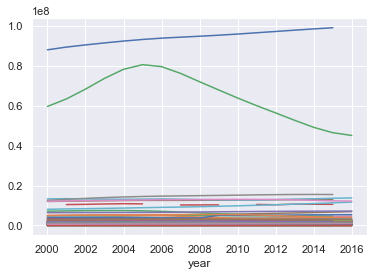

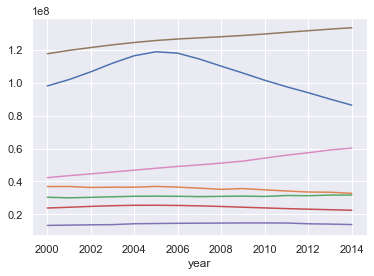

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 205 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI'
 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA'
 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD'
 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA'
 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN'
 'FJI' 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ'
 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL'
 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM'
 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA'
 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' '

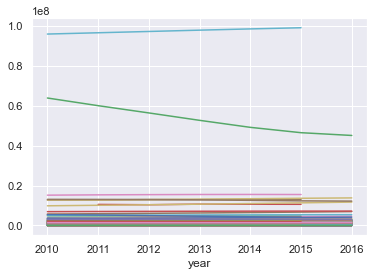

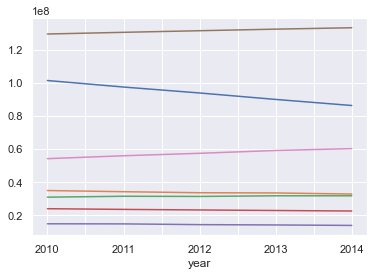

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 204 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI'
 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA'
 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD'
 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA'
 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN'
 'FJI' 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC'
 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN'
 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR'
 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO'
 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC' 'NAM'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR'

In [83]:
ind = 'SP.SEC.UTOT.IN'
initial_investigation(ind)[0].T.info()

#### Résumé: SP.SEC.UTOT.IN
* Pour 197 pays, il y a de la data pour les années 2010-2016.
    * 20 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 95% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Pour les 207 pays et régions, il y a de data pour l'année 2014.**
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [84]:
ind = 'SP.SEC.UTOT.IN'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop data, where half of the data points are missing and there are no data points for the last 7 years (2010 - 2016)
data = drop_countries(data,7)
data.T[years].describe()

The following countries were dropped :
['AND', 'ASM', 'BIH', 'CHI', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM', 'IMN', 'MAF', 'MCO', 'MNP', 'NCL', 'PYF', 'SGP', 'SXM', 'TCA', 'VIR', 'XKX']


year           2010          2011          2012          2013          2014  \
count  2.020000e+02  2.030000e+02  2.030000e+02  2.030000e+02  2.040000e+02   
mean   3.809156e+06  3.822181e+06  3.795956e+06  3.780282e+06  3.735734e+06   
std    1.489671e+07  1.475462e+07  1.465482e+07  1.456892e+07  1.444357e+07   
min    4.320000e+02  3.570000e+02  3.630000e+02  3.750000e+02  3.930000e+02   
25%    8.389075e+04  8.490000e+04  8.405200e+04  8.104250e+04  7.675700e+04   
50%    3.525685e+05  3.687200e+05  3.835140e+05  3.717900e+05  3.669760e+05   
75%    1.387539e+06  1.463500e+06  1.461264e+06  1.474812e+06  1.467564e+06   
max    1.295778e+08  1.305978e+08  1.315686e+08  1.325174e+08  1.333664e+08   

year           2015          2016  
count  1.950000e+02  1.580000e+02  
mean   1.943047e+06  1.255435e+06  
std    8.080003e+06  4.045436e+06  
min    4.080000e+02  4.160000e+02  
25%    7.299050e+04  5.009550e+04  
50%    3.301490e+05  2.953205e+05  
75%    1.296611e+06  1.073032e+06  
max    9.919816e+07  4.514491e+07

In [85]:
data_clean = fill_indicator_linear(data)
data_clean.T[years].describe()

2010          2011          2012          2013          2014  \
count  2.030000e+02  2.040000e+02  2.040000e+02  2.040000e+02  2.040000e+02   
mean   3.841700e+06  3.803642e+06  3.777574e+06  3.762005e+06  3.735734e+06   
std    1.486703e+07  1.472061e+07  1.462104e+07  1.453534e+07  1.444357e+07   
min    4.320000e+02  3.570000e+02  3.630000e+02  3.750000e+02  3.930000e+02   
25%    8.398350e+04  8.193450e+04  7.998800e+04  7.849925e+04  7.675700e+04   
50%    3.543780e+05  3.632660e+05  3.779025e+05  3.684380e+05  3.669760e+05   
75%    1.414082e+06  1.451153e+06  1.450089e+06  1.444523e+06  1.467564e+06   
max    1.295778e+08  1.305978e+08  1.315686e+08  1.325174e+08  1.333664e+08   

               2015          2016  
count  2.040000e+02  2.040000e+02  
mean   3.714450e+06  3.698120e+06  
std    1.437181e+07  1.432687e+07  
min    4.080000e+02  4.160000e+02  
25%    7.696375e+04  7.671250e+04  
50%    3.616355e+05  3.524605e+05  
75%    1.489494e+06  1.520759e+06  
max    1.342154e+08  1.350644e+08

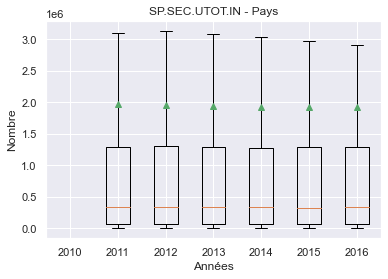

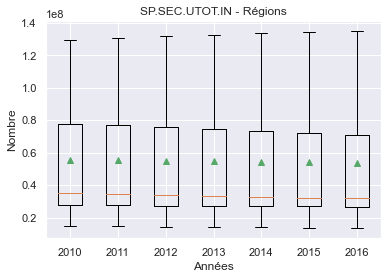

2014
Pays
Median:  337891.0
Mean:  1934550.3147208123
Std:  8079897.4907415295


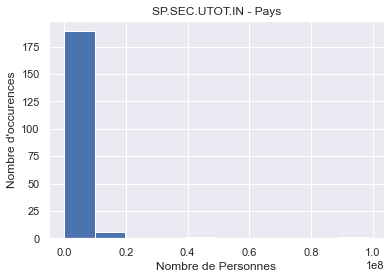

Régions
Median:  32818504.0
Mean:  54426201.428571425
Std:  42676279.99977718


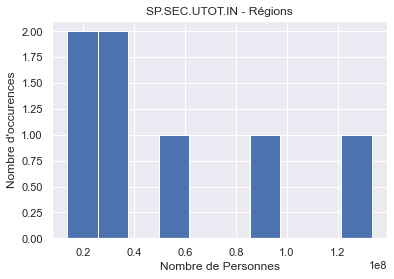

2016
Pays
Median:  333591.0
Mean:  1925609.2335025382
Std:  8041586.734902801


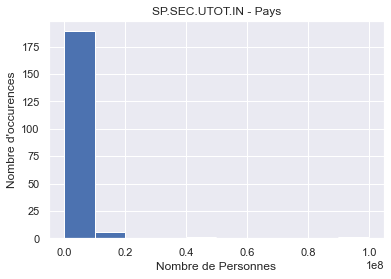

Régions
Median:  31780436.0
Mean:  53581634.0
Std:  42730535.42920336


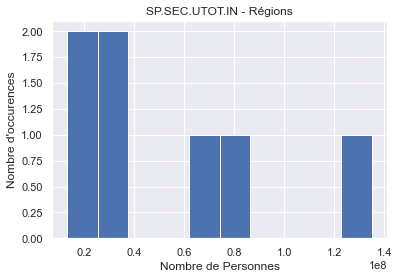

In [86]:
plot_boxplot(ind, data_clean, unit = "Nombre", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "Nombre de Personnes", ind = ind)
print_info_year('2016', data_clean, unit = "Nombre de Personnes", ind = ind)

#### Résumé: SP.SEC.UTOT.IN
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont   334 000,  1 930 000 et 8 040 000 personnes pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 31 800 000, 53 600 000 et 42 700 000 personnes pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne information sur la taille du marché - nombre absolute des potentielle clients.

In [87]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### UIS.E.3

**************************************************
UIS.E.3


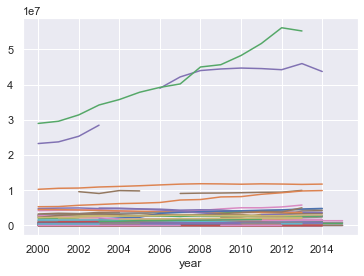

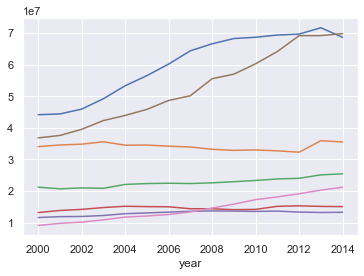

We have data between 2000 and 2015.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015']

We have data for the 207 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE'
 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU'
 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV'
 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE'
 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HUN' 'IDN'
 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN'
 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN'
 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV'
 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'M

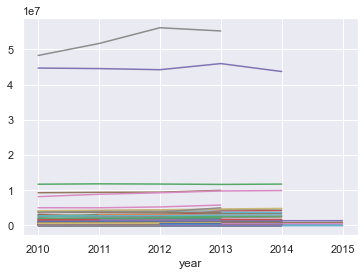

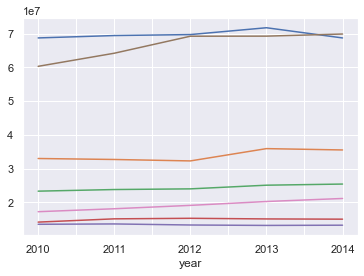

We have data between 2010 and 2015.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015']

We have data for the 188 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE'
 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BMU'
 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV'
 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE'
 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GRC' 'GRD'
 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MEA' 'MEX' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT'
 'MUS' 'MWI' 'MYS' 'NAC' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NRU' 'NZL'
 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 

In [88]:
ind = 'UIS.E.3'
initial_investigation(ind)[0].T.info()

#### Résumé: UIS.E.3
* Pour 181 pays, il y a de la data pour les années 2010-2016.
    * 36 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 67% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Il n'y a pas de data pour l'année 2016.**
* **Il n'y a presque pas de data pour l'année 2015.**
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [89]:
ind = 'UIS.E.3'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop data, where half of the data points are missing and there are no data points for the last 7 years (2010 - 2016)
data2 = drop_countries(data.loc[years,:],7)
print(len(data2.columns.values))
data.T[years].describe()

The following countries were dropped :
['ASM', 'CHI', 'FRO', 'FSM', 'GAB', 'GIB', 'GNB', 'GNQ', 'GRL', 'GUM', 'HTI', 'IMN', 'IRQ', 'KHM', 'KIR', 'LBY', 'MAF', 'MDV', 'MHL', 'MNP', 'NAM', 'NCL', 'PRK', 'PYF', 'SEN', 'SGP', 'SOM', 'SSD', 'TON', 'TTO', 'UGA', 'VGB', 'VIR', 'VNM', 'XKX', 'ZMB']
188


year           2010          2011          2012          2013          2014  \
count  1.560000e+02  1.610000e+02  1.590000e+02  1.470000e+02  1.250000e+02   
mean   2.845537e+06  2.837781e+06  2.936010e+06  3.277591e+06  3.047275e+06   
std    9.581047e+06  9.741906e+06  1.015763e+07  1.073568e+07  1.043027e+07   
min    1.221000e+03  1.259000e+03  2.540000e+02  1.150000e+03  3.530000e+02   
25%    6.487025e+04  6.895500e+04  6.193450e+04  9.068100e+04  5.081500e+04   
50%    2.492330e+05  2.443700e+05  2.415230e+05  2.835860e+05  2.312500e+05   
75%    9.911418e+05  9.799870e+05  9.244300e+05  1.258817e+06  8.043760e+05   
max    6.869628e+07  6.940019e+07  6.968986e+07  7.171130e+07  6.985116e+07   

year           2015  2016  
count  7.000000e+00   0.0  
mean   3.883340e+05   NaN  
std    5.298411e+05   NaN  
min    8.000000e+02   NaN  
25%    1.449950e+04   NaN  
50%    2.936400e+04   NaN  
75%    6.590840e+05   NaN  
max    1.341007e+06   NaN

In [90]:
data_clean = fill_indicator_linear(data[data2.columns.values])
data_clean.T.describe()

2000          2001          2002          2003          2004  \
count  1.480000e+02  1.640000e+02  1.710000e+02  1.760000e+02  1.760000e+02   
mean   2.096641e+06  1.957804e+06  1.992274e+06  2.066772e+06  2.147531e+06   
std    6.557442e+06  6.339898e+06  6.474601e+06  6.789779e+06  7.143830e+06   
min    2.820000e+02  3.800000e+01  3.500000e+01  6.900000e+01  1.030000e+02   
25%    3.922900e+04  3.126900e+04  2.939800e+04  2.916412e+04  3.099250e+04   
50%    1.632185e+05  1.471025e+05  1.441510e+05  1.505450e+05  1.602905e+05   
75%    7.590758e+05  6.527372e+05  6.296465e+05  7.039428e+05  6.561965e+05   
max    4.415272e+07  4.440643e+07  4.592420e+07  4.922797e+07  5.332024e+07   

               2005          2006          2007          2008          2009  \
count  1.780000e+02  1.800000e+02  1.810000e+02  1.820000e+02  1.830000e+02   
mean   2.199765e+06  2.250646e+06  2.307995e+06  2.386019e+06  2.416535e+06   
std    7.449501e+06  7.779612e+06  8.092785e+06  8.523447e+06  8.657913e+06   
min    1.370000e+02  1.710000e+02  2.050000e+02  2.148000e+02  2.246000e+02   
25%    3.219425e+04  3.361450e+04  3.262500e+04  3.208000e+04  3.588900e+04   
50%    1.704101e+05  1.803285e+05  1.844630e+05  1.850165e+05  1.884750e+05   
75%    6.749932e+05  6.810532e+05  7.368130e+05  8.392440e+05  8.723670e+05   
max    5.653658e+07  6.019380e+07  6.440735e+07  6.661838e+07  6.828774e+07   

               2010          2011          2012          2013          2014  \
count  1.860000e+02  1.860000e+02  1.880000e+02  1.880000e+02  1.880000e+02   
mean   2.446498e+06  2.520975e+06  2.562426e+06  2.646542e+06  2.643870e+06   
std    8.821416e+06  9.103019e+06  9.387029e+06  9.572745e+06  9.414671e+06   
min    2.344000e+02  2.442000e+02  2.540000e+02  3.120000e+02  3.530000e+02   
25%    3.965225e+04  4.430125e+04  4.633125e+04  4.663525e+04  4.727025e+04   
50%    1.913155e+05  2.026150e+05  2.122550e+05  2.187775e+05  2.265370e+05   
75%    8.826610e+05  8.824365e+05  8.863252e+05  9.104930e+05  9.404215e+05   
max    6.869628e+07  6.940019e+07  6.968986e+07  7.171130e+07  6.985116e+07   

               2015          2016  
count  1.880000e+02  1.880000e+02  
mean   2.641812e+06  2.639754e+06  
std    9.264906e+06  9.123993e+06  
min    3.702308e+02 -5.923400e+04  
25%    4.354525e+04  3.412950e+04  
50%    1.994285e+05  2.087415e+05  
75%    9.107715e+05  9.204480e+05  
max    7.047616e+07  7.110116e+07

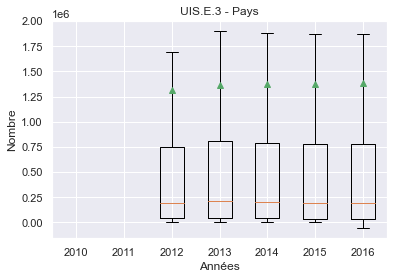

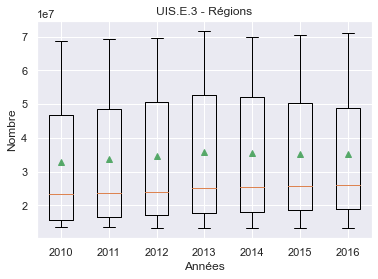

2014
Pays
Median:  200900.0
Mean:  1370822.920733579
Std:  5371576.907691944


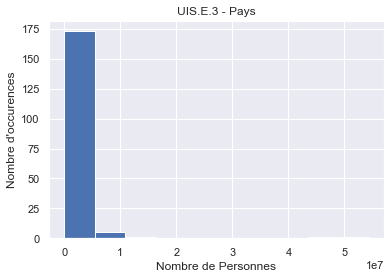

Régions
Median:  25425662.0
Mean:  35561217.14285714
Std:  24162802.240447517


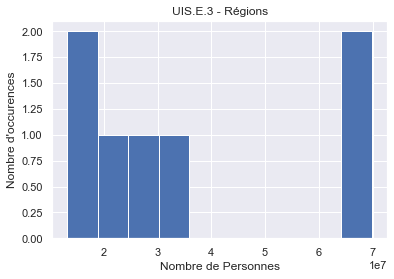

2016
Pays
Median:  193102.25
Mean:  1383772.9305540798
Std:  5128756.465520181


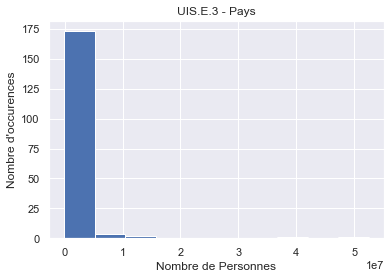

Régions
Median:  26097022.0
Mean:  35115825.71428572
Std:  22964096.589051504


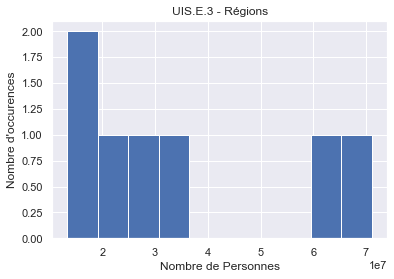

In [91]:
plot_boxplot(ind, data_clean, unit = "Nombre", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "Nombre de Personnes", ind = ind)
print_info_year('2016', data_clean, unit = "Nombre de Personnes", ind = ind)

#### Résumé: UIS.E.3
* **Pour l'année 2014 la médian, le moyenne et l'écart-type sont   201 000,  1 370 000 et 5 370 000 personnes pour les pays**
* **Pour l'année 2014 la médian, le moyenne et l'écart-type sont 25 400 000, 35 600 000 et 24 200 000 personnes pour les régions**
* **Pour l'année 2016 la médian, le moyenne et l'écart-type sont   193 000,  1 380 000 et 5 130 000 personnes pour les pays**
* **Pour l'année 2016 la médian, le moyenne et l'écart-type sont 26 100 000, 35 100 000 et 23 000 000 personnes pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne information sur la taille du marché - nombre absolute des potentielle clients.

In [92]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### SE.SEC.ENRR.UP

**************************************************
SE.SEC.ENRR.UP


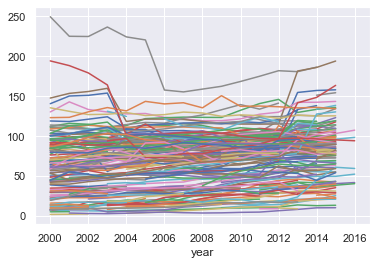

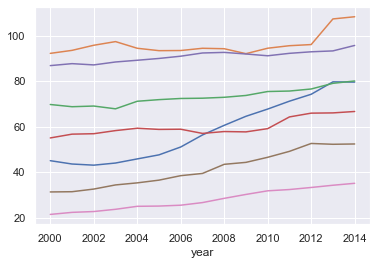

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 199 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN'
 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL'
 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA'
 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM'
 'GUY' 'HKG' 'HND' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT'
 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR'
 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' '

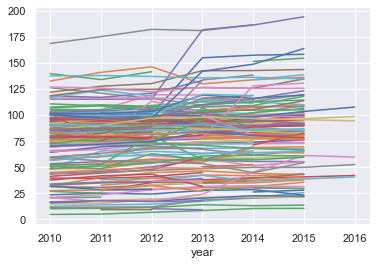

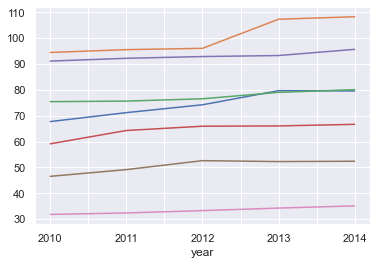

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 184 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN'
 'BTN' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM'
 'CPV' 'CRI' 'CUB' 'CUW' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'GBR'
 'GEO' 'GHA' 'GIN' 'GMB' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND' 'HRV' 'HUN'
 'IDN' 'IND' 'IRL' 'IRN' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KGZ'
 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU'
 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT'
 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC' 'NER' 'NGA' 'NIC'
 'NLD' 'NOR' 'NPL' 'NRU' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG'
 'POL' 'PRI' 'PRK' 'PRT' 'PRY'

In [93]:
ind = 'SE.SEC.ENRR.UP'
initial_investigation(ind)[0].T.info()

#### Résumé: SE.SEC.ENRR.UP
* Pour 177 pays, il y a de la data pour les années 2010-2016.
    * 40 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 68% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Le plus complète année entre 2010-2016 est 2011.**
* **Presque pas de data pour 2016**
* Voir si on peut remplir cette variable avec UIS.E.3 and SP.SEC.UTOT.IN
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [94]:
ind = 'SE.SEC.ENRR.UP'
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]

ind2 = 'UIS.E.3'
ind3 = 'SP.SEC.UTOT.IN'
data2 = make_2D_map(DATA_CLEANED, ind2, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
data3 = make_2D_map(DATA_CLEANED, ind3, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
data4 = data2.div(data3).multiply(100)

In [95]:
print(data.T.isna().sum())
print(data4.T.isna().sum())

year
2000     77
2001     73
2002     71
2003     75
2004     65
2005     64
2006     72
2007     67
2008     73
2009     72
2010     72
2011     67
2012     71
2013     80
2014     82
2015    109
2016    216
dtype: int64
year
2000    73
2001    56
2002    50
2003    47
2004    45
2005    44
2006    43
2007    44
2008    44
2009    45
2010    44
2011    43
2012    42
2013    42
2014    42
2015    42
2016    42
dtype: int64


In [96]:
#fill holes will cleand data from the previous two indicators
years = [str(y) for y in range(2010, 2017)]
data_clean = data.fillna(value = data4)
data_clean.T[years].describe()

year         2010        2011        2012        2013        2014        2015  \
count  181.000000  183.000000  183.000000  183.000000  184.000000  187.000000   
mean    70.697760   71.639824   73.320119   76.803752   77.657950   79.160216   
std     31.406552   31.598845   31.606309   34.502389   35.160904   37.215797   
min      4.539990    4.614590    6.595380    8.227430    5.893076    5.020860   
25%     47.085247   47.263718   49.352152   52.310698   51.859070   51.714381   
50%     75.415329   76.223846   77.882736   80.714943   80.976017   82.024597   
75%     93.307961   92.954090   94.812717   98.519215   98.118362   99.983200   
max    168.520767  175.029724  181.990967  181.605743  186.427887  194.101990   

year         2016  
count  182.000000  
mean    80.961761  
std     41.760949  
min     -9.463003  
25%     50.283073  
50%     82.696126  
75%    104.742004  
max    207.824575

In [97]:
data2 = drop_countries(data_clean.loc[years,:],7)
data_clean[data2.columns.values].T[years].describe()

The following countries were dropped :
['AND', 'ASM', 'BIH', 'CHI', 'CYM', 'FRO', 'FSM', 'GAB', 'GIB', 'GNB', 'GNQ', 'GRL', 'GUM', 'HTI', 'IMN', 'IRQ', 'KHM', 'KIR', 'LBY', 'MAF', 'MCO', 'MDV', 'MNP', 'NAM', 'NCL', 'PYF', 'SGP', 'SOM', 'SXM', 'TCA', 'TTO', 'UGA', 'VIR', 'VNM', 'XKX', 'ZMB']


year         2010        2011        2012        2013        2014        2015  \
count  181.000000  183.000000  183.000000  183.000000  184.000000  187.000000   
mean    70.697760   71.639824   73.320119   76.803752   77.657950   79.160216   
std     31.406552   31.598845   31.606309   34.502389   35.160904   37.215797   
min      4.539990    4.614590    6.595380    8.227430    5.893076    5.020860   
25%     47.085247   47.263718   49.352152   52.310698   51.859070   51.714381   
50%     75.415329   76.223846   77.882736   80.714943   80.976017   82.024597   
75%     93.307961   92.954090   94.812717   98.519215   98.118362   99.983200   
max    168.520767  175.029724  181.990967  181.605743  186.427887  194.101990   

year         2016  
count  182.000000  
mean    80.961761  
std     41.760949  
min     -9.463003  
25%     50.283073  
50%     82.696126  
75%    104.742004  
max    207.824575

In [98]:
data_clean = fill_indicator_linear(data_clean[data2.columns.values])
data_clean.T[years].describe()

2010        2011        2012        2013        2014        2015  \
count  185.000000  187.000000  188.000000  188.000000  188.000000  188.000000   
mean    70.720909   71.602066   72.841603   76.192835   77.101359   79.012615   
std     31.386441   31.531633   31.819996   34.657459   35.360100   37.171290   
min      4.539990    4.614590    4.716158    4.817725    4.919293    5.020860   
25%     47.085247   47.263718   49.157682   51.771240   51.436852   51.288172   
50%     75.415329   76.223846   77.773572   80.192394   80.626278   81.995463   
75%     93.307961   92.954090   94.737085   97.814043   97.752191   99.963299   
max    168.520767  175.029724  181.990967  181.605743  186.427887  194.101990   

             2016  
count  188.000000  
mean    80.130448  
std     41.670793  
min     -9.463003  
25%     48.849576  
50%     82.273093  
75%    103.494818  
max    207.824575

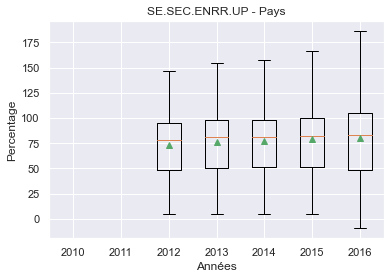

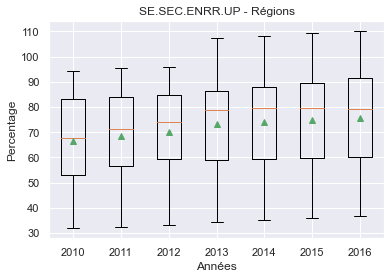

2014
Pays
Median:  81.0454864501953
Mean:  77.22351946980481
Std:  35.74577663696868


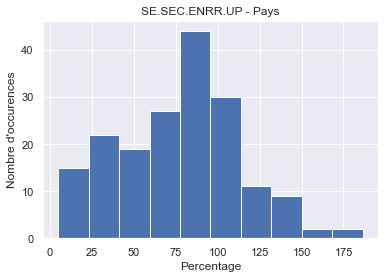

Régions
Median:  79.5493469238281
Mean:  73.94263512747628
Std:  24.97835649005094


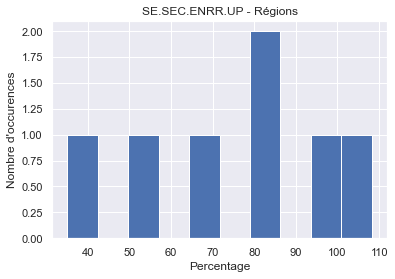

2016
Pays
Median:  82.7377853393554
Mean:  80.30267777674578
Std:  42.2020694524826


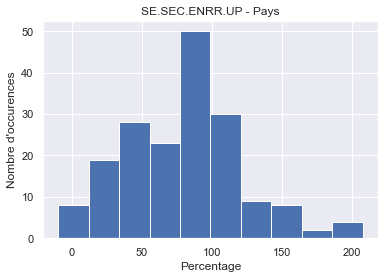

Régions
Median:  79.3032215416714
Mean:  75.67708570678174
Std:  25.788378318004487


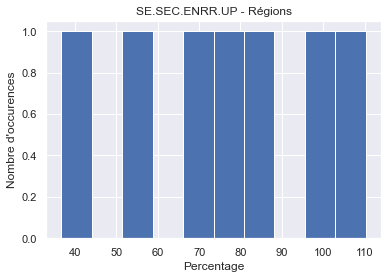

In [99]:
plot_boxplot(ind, data_clean, unit = "Percentage", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "Percentage", ind = ind)
print_info_year('2016', data_clean, unit = "Percentage", ind = ind)

#### Résumé: SE.SEC.ENRR.UP
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 82.7%, 80.3% et 42.2% pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 79.3%, 75.7% et 25.8% pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne une indication sur le niveau d'ecducation du pays / la régions.

In [100]:
#See which countries have a rate above 100%
print(data_clean.loc[:, data_clean.loc['2016',:] >= 100])
for c in data_clean.loc[:, data_clean.loc['2016',:] >= 100].columns.values:
    print(c, RAW_DATA[RAW_DATA['Country Code'] == c]['Country Name'].iloc[0])

country         ABW         AUS         AZE         BEL         BGR  \
2000      82.165443  249.607498         NaN  140.671967  101.134552   
2001      85.361458  225.125687         NaN  150.290283  102.303978   
2002      88.880478  224.854965         NaN  151.160828  104.499741   
2003      89.847588  236.741791         NaN  153.979172   84.427452   
2004      86.599899  224.360306         NaN  104.403603   89.033051   
2005      84.785622  220.559540         NaN  105.426781   90.763153   
2006      86.693459  157.797073  107.761619  106.723442   92.481628   
2007      98.751671  155.434784  108.805957  107.022377   93.818207   
2008      89.368263  158.950897  111.546248  105.188988   93.479012   
2009      86.303452  162.460724  113.421871  103.545998   94.448219   
2010      84.642014  168.520767  113.364468  102.225456   96.561630   
2011      86.417068  175.029724  115.213142  101.621918  101.196510   
2012     106.325500  181.990967  118.697327  100.904678   98.992943   
2013  

In [101]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### 4.2.3 Marché / pouvoir d'achat
* PIB et PIB per habitant
* choisi PIB / habitant - 'NY.GDP.PCAP.CD'
* la population et le nombres des personnes inscrites dans l'education (secondaire et tertiare) donne aussi information sur la taille du marché.

#### NY.GDP.PCAP.CD
* PIB (Produit Intérieur Brut) per habitant
* donne information sur la richesse du pays /régions - sur le marché en générale

**************************************************
NY.GDP.PCAP.CD


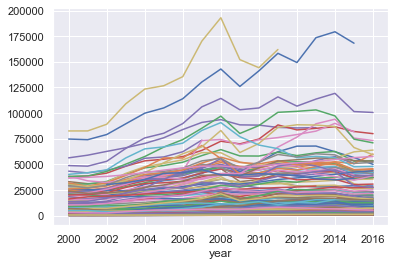

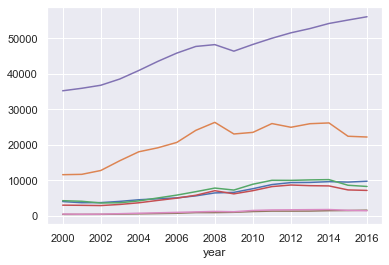

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 216 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI'
 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND'
 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA'
 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC'
 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' '

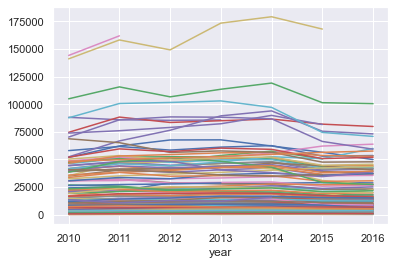

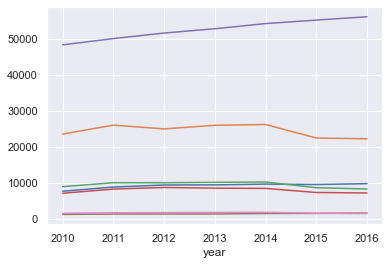

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 211 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN'
 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU'
 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB'
 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV' 'HTI'
 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG'
 'MNP' 'MOZ' 'MRT' 'MUS' 'MWI'

In [102]:
ind = 'NY.GDP.PCAP.CD'
initial_investigation(ind)[0].T.info()

#### Résumé: NY.GDP.PCAP.CD
* Pour 204 pays, il y a de la data pour les années 2010-2016.
    * 13 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 97% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Le plus complète année entre 2010-2016 est 2011.**.
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [103]:
ind = 'NY.GDP.PCAP.CD'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop data, where half of the data points are missing and there are no data points for the last 7 years (2010 - 2016)
data2 = drop_countries(data.loc[years,:],7)
print(len(data2.columns.values))
data.T[years].describe()

The following countries were dropped :
['CHI', 'CUW', 'CYM', 'GIB', 'MAF', 'NCL', 'NRU', 'PRK', 'PYF', 'SXM', 'SYR', 'TCA', 'VGB']
211


year            2010           2011           2012           2013  \
count     210.000000     210.000000     206.000000     207.000000   
mean    15362.394127   16882.923062   16135.532080   16644.524102   
std     22948.091782   25382.070112   22914.352265   24208.321211   
min       231.194326     260.479907     265.285605     282.755525   
25%      1501.494867    1685.371763    1770.871134    1865.654630   
50%      5563.604181    5965.269402    6406.863200    6597.211381   
75%     19275.457330   21505.951836   20365.519606   20081.506235   
max    144246.368775  162009.877819  149295.646044  173528.150454   

year            2014           2015           2016  
count     204.000000     203.000000     196.000000  
mean    16568.321231   14842.064439   13377.976868  
std     24307.888662   21701.939919   18039.795507  
min       312.748979     300.676557     285.727442  
25%      2015.603992    1892.104331    1853.821155  
50%      6487.818716    5814.863134    5235.308547  
75%     19430.097692   17088.226055   15928.850971  
max    179308.075616  168146.015281  100573.139978

In [104]:
data_clean = fill_indicator_linear(data[data2.columns.values])
data_clean.T[years].describe()

2010           2011           2012           2013  \
count     210.000000     210.000000     210.000000     211.000000   
mean    15362.394127   16882.923062   16808.754449   17363.669278   
std     22948.091782   25382.070112   25411.015383   27105.208195   
min       231.194326     260.479907    -915.463301   -7433.476036   
25%      1501.494867    1685.371763    1756.864855    1848.995704   
50%      5563.604181    5965.269402    6406.863200    6597.211381   
75%     19275.457330   21505.951836   21312.590259   20757.874728   
max    144246.368775  162009.877819  179773.386864  197536.895908   

                2014           2015           2016  
count     211.000000     211.000000     211.000000  
mean    17665.502458   16081.702009   15997.086110  
std     28093.474745   26694.670269   26966.216525  
min    -13951.488771  -20469.501506  -26987.514241  
25%      1992.558665    1847.333163    1941.810508  
50%      6491.052450    5949.106307    5805.605385  
75%     20204.016823   17893.196816   19165.791631  
max    215300.404952  233063.913997  250827.423041

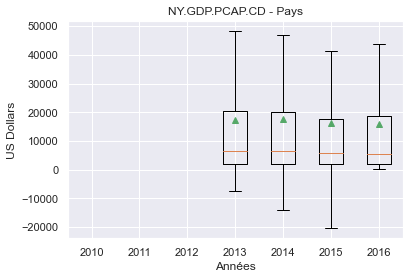

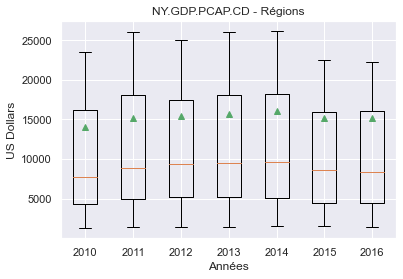

2014
Pays
Median:  6440.607733002995
Mean:  17722.342311783974
Std:  28390.09495041479


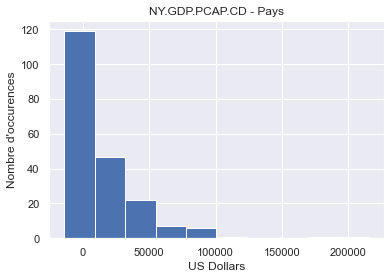

Régions
Median:  9665.05607927331
Mean:  16009.02671265367
Std:  18724.94187978487


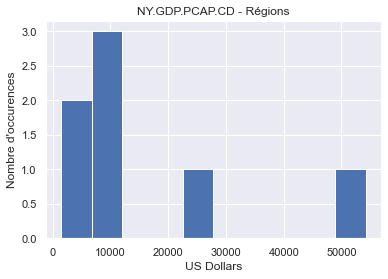

2016
Pays
Median:  5355.7507752448
Mean:  16022.8985280936
Std:  27225.472466026924


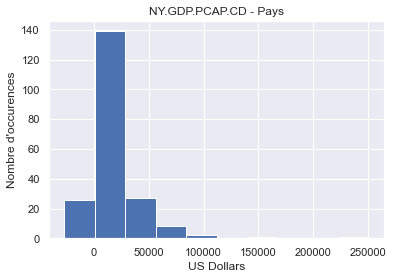

Régions
Median:  8311.37017802892
Mean:  15244.838504984276
Std:  19296.324162122706


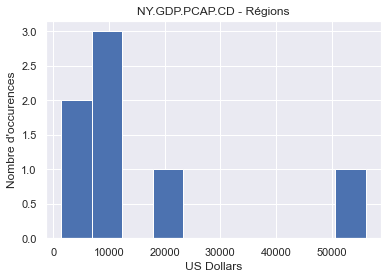

In [105]:
plot_boxplot(ind, data_clean, unit = "US Dollars", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "US Dollars", ind = ind)
print_info_year('2016', data_clean, unit = "US Dollars", ind = ind)

#### Résumé: NP.GDP.PCAP.CD
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 5 360, 16 000 et 27 200 US-Dollar pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 8 310, 15 200 et 19 300 US-Dollar pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne une indication sur la taille du marché du pays / régions (par personne).

In [106]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEAN = DATA_CLEAN.drop_duplicates()
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### 4.2.4 Population
* Population = donne information sur le nombre de potentiels clients = taille de marché
* C'est aussi une unité avec laquelle ont peut normaliser des autre variables
* Choisi SP.POP.TOTL car c'est la variable le plus complète.

#### SP.POP.TOTL

**************************************************
SP.POP.TOTL


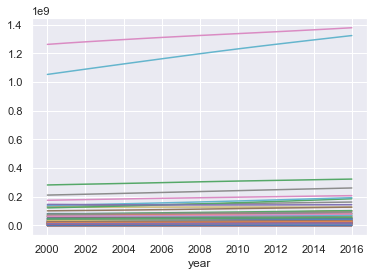

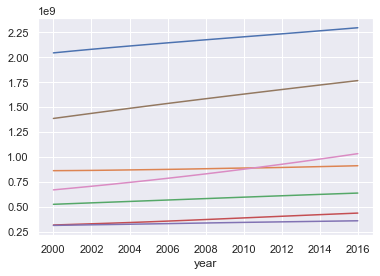

We have data between 2000 and 2016.
The exact years are :
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 222 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM'
 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY'
 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO'
 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR'
 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' '

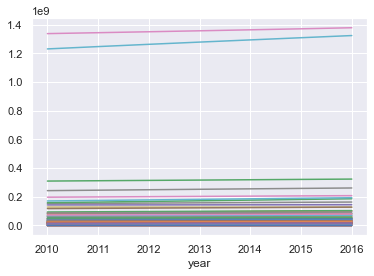

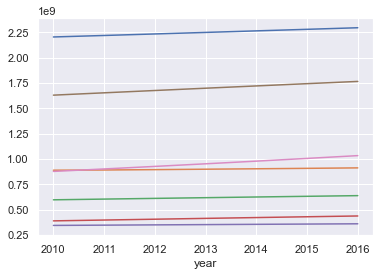

We have data between 2010 and 2016.
The exact years are :
['2010' '2011' '2012' '2013' '2014' '2015' '2016']

We have data for the 222 countries. 
The countries are :
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM'
 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAS' 'ECS' 'ECU' 'EGY'
 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO'
 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR'
 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LCN' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG'

In [107]:
ind = 'SP.POP.TOTL'
initial_investigation(ind)[0].T.info()

#### Résumé: SP.POP.TOTL
* Pour 215 pays, il y a de la data pour les années 2010-2016.
    * que 2 des 217 pays n'ont pas de data pour cette variable.
* Il y a de la data pour les 7 régions.
* La data pour cette variable est complète à 98.9% pour les années 2010-2016 (après avoir écarter les pays, pour lequels il n'y a pas de data)
* **Les années 2010 et 2011 sont complètes, mais même les autres années sont est quasi complète**
* Utiliser interpolation / extrapolation lineaire pour remplir les trous dans les données.

In [108]:
ind = 'SP.POP.TOTL'
years = [str(y) for y in range(2010, 2017)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[YEARS, :]
#drop data, where half of the data points are missing and there are no data points for the last 7 years (2010 - 2016)
data2 = drop_countries(data.loc[years,:],7)
print(len(data2.columns.values))
data.T[years].describe()

The following countries were dropped :
['NRU', 'VGB']
222


year           2010          2011          2012          2013          2014  \
count  2.220000e+02  2.220000e+02  2.210000e+02  2.210000e+02  2.170000e+02   
mean   6.233340e+07  6.307390e+07  6.410391e+07  6.487695e+07  6.681123e+07   
std    2.386456e+08  2.410239e+08  2.439683e+08  2.464174e+08  2.510360e+08   
min    1.053100e+04  1.062800e+04  1.072500e+04  1.081900e+04  1.090800e+04   
25%    8.827385e+05  8.988870e+05  8.811850e+05  8.966880e+05  1.152309e+06   
50%    6.352497e+06  6.472590e+06  6.766103e+06  6.922079e+06  7.130576e+06   
75%    2.406775e+07  2.460478e+07  2.509615e+07  2.599834e+07  2.696256e+07   
max    2.205615e+09  2.220358e+09  2.235430e+09  2.250552e+09  2.265898e+09   

year           2015          2016  
count  2.170000e+02  2.170000e+02  
mean   6.760359e+07  6.840231e+07  
std    2.535391e+08  2.560779e+08  
min    1.100100e+04  1.109700e+04  
25%    1.175389e+06  1.221490e+06  
50%    7.177991e+06  7.127822e+06  
75%    2.785930e+07  2.881346e+07  
max    2.281203e+09  2.296786e+09

In [109]:
data_clean = fill_indicator_linear(data[data2.columns.values])
data_clean.T[years].describe()

2010          2011          2012          2013          2014  \
count  2.220000e+02  2.220000e+02  2.220000e+02  2.220000e+02  2.220000e+02   
mean   6.233340e+07  6.307390e+07  6.383568e+07  6.460563e+07  6.538173e+07   
std    2.386456e+08  2.410239e+08  2.434485e+08  2.458925e+08  2.483603e+08   
min    1.053100e+04  1.062800e+04  1.072500e+04  1.081900e+04  1.090800e+04   
25%    8.827385e+05  8.988870e+05  9.205370e+05  9.434525e+05  9.664790e+05   
50%    6.352497e+06  6.472590e+06  6.590636e+06  6.708318e+06  6.827780e+06   
75%    2.406775e+07  2.460478e+07  2.504960e+07  2.589284e+07  2.675193e+07   
max    2.205615e+09  2.220358e+09  2.235430e+09  2.250552e+09  2.265898e+09   

               2015          2016  
count  2.220000e+02  2.220000e+02  
mean   6.615870e+07  6.694189e+07  
std    2.508371e+08  2.533492e+08  
min    1.100100e+04  1.109700e+04  
25%    9.858068e+05  9.992810e+05  
50%    6.879675e+06  6.907882e+06  
75%    2.741617e+07  2.805110e+07  
max    2.281203e+09  2.296786e+09

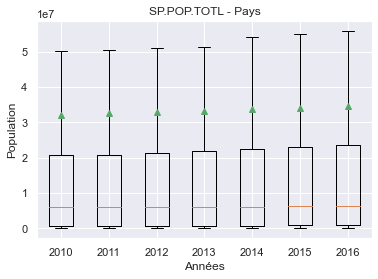

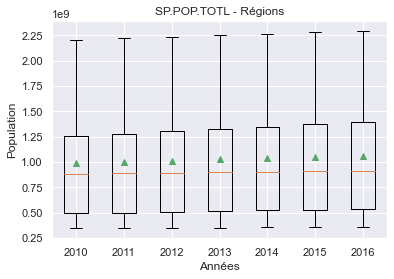

2014
Pays
Median:  6204108.0
Mean:  33701202.1243682
Std:  132762074.00437006


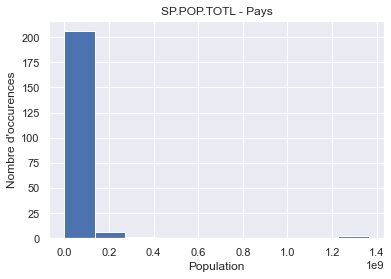

Régions
Median:  903094668.0
Mean:  1038426596.5341661
Std:  709048234.7089626


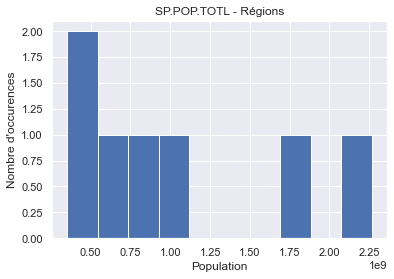

2016
Pays
Median:  6293253.0
Mean:  34506809.739534885
Std:  135048310.4802969


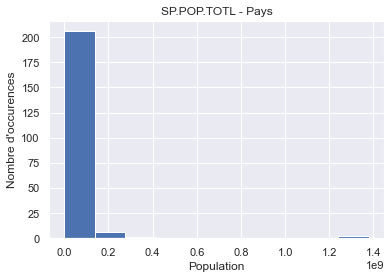

Régions
Median:  911995305.0
Mean:  1063162225.4285715
Std:  719809003.3983943


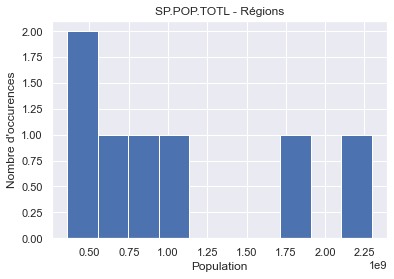

In [110]:
plot_boxplot(ind, data_clean, unit = "Population", years = years, showmeans = True, showfliers = False)
print_info_year('2014', data_clean, unit = "Population", ind = ind)
print_info_year('2016', data_clean, unit = "Population", ind = ind)

#### Résumé: SP.POP.TOTL
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 6.29, 34.5 et 135 million Personnes pour les pays**
* Pour l'année 2016 **la médian, le moyenne et l'écart-type sont 911, 1 060 et 720 million Personnes pour les régions**
* Il y a une grande écarte entre les différents pays / régions.
* Cette variable donne une indication sur la taille du marché du pays / régions (par personne).

In [111]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEAN = DATA_CLEAN.drop_duplicates()
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### 4.2.5 Future potentiel 
* Population avec ....
* PRJ.POP.ALL.4.MF , PRJ.ATT.25UP.4.MF

#### PRJ.POP.ALL.4.MF

**************************************************
PRJ.POP.ALL.4.MF


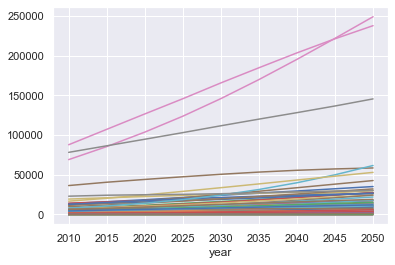

No data to plot.
We have data between 2010 and 2050.
The exact years are :
['2010' '2015' '2020' '2025' '2030' '2035' '2040' '2045' '2050']

We have data for the 166 countries. 
The countries are :
['ABW' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'CAF' 'CAN'
 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB'
 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN'
 'FRA' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LCA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'PAK' 'PAN' 'PER' 'PHL' 'POL'
 'PRI' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN' 'SEN'

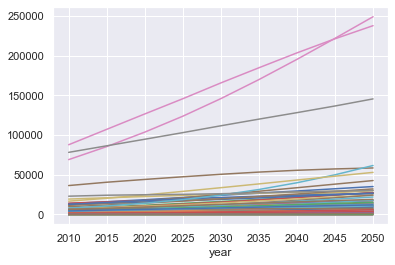

No data to plot.
We have data between 2010 and 2050.
The exact years are :
['2010' '2015' '2020' '2025' '2030' '2035' '2040' '2045' '2050']

We have data for the 166 countries. 
The countries are :
['ABW' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'CAF' 'CAN'
 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB'
 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN'
 'FRA' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LCA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'PAK' 'PAN' 'PER' 'PHL' 'POL'
 'PRI' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN' 'SEN'

In [112]:
ind = 'PRJ.POP.ALL.4.MF'
initial_investigation(ind, is_projection_data = True )[0].T.info()

#### Résumé: PRJ.POP.ALL.4.MF
* Pour 166 pays, il y a de la data pour les années 2010-2050 (en intervales de 5 ans).
    * 51 des 217 pays n'ont pas de data pour cette variable.
* Il n'y a pas de la data pour les régions.
* **La data pour cette variable est complète à 100% (par construction)**

The following countries were dropped :
['AFG', 'AGO', 'AND', 'ASM', 'ATG', 'BMU', 'BRB', 'BRN', 'BWA', 'CHI', 'CUW', 'CYM', 'DJI', 'DMA', 'EAS', 'ECS', 'ERI', 'FJI', 'FRO', 'FSM', 'GIB', 'GRD', 'GRL', 'GUM', 'IMN', 'KIR', 'KNA', 'LBY', 'LCN', 'LIE', 'LKA', 'MAF', 'MCO', 'MEA', 'MHL', 'MNP', 'MRT', 'NAC', 'NRU', 'OMN', 'PLW', 'PNG', 'PRK', 'SAS', 'SLB', 'SMR', 'SSD', 'SSF', 'SXM', 'SYC', 'TCA', 'TGO', 'TUV', 'UZB', 'VGB', 'VIR', 'XKX', 'YEM']


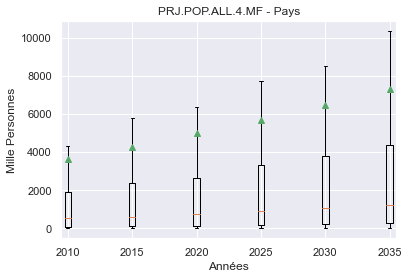

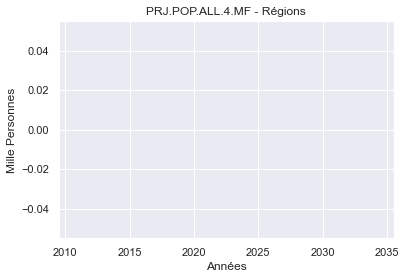

2020
Pays
Median:  739.36
Mean:  4977.415542168675
Std:  15326.409312893655


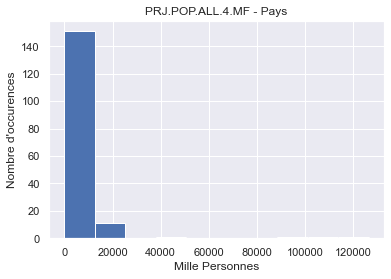

Régions
Median:  nan
Mean:  nan
Std:  nan


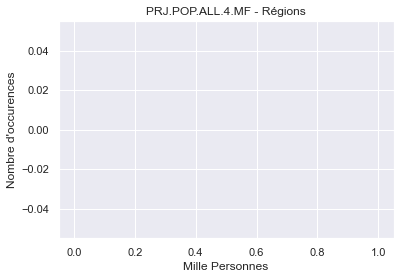

2025
Pays
Median:  890.73
Mean:  5698.443192771085
Std:  17542.132794187102


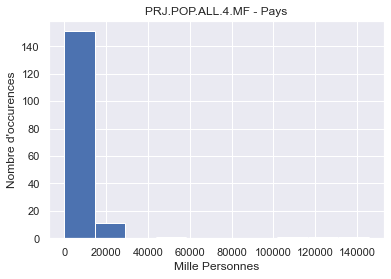

Régions
Median:  nan
Mean:  nan
Std:  nan


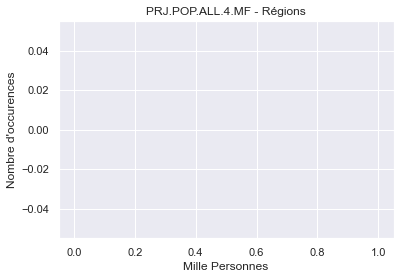

In [113]:
years = [str(y) for y in range(2010, 2036, 5)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data_clean = drop_countries(data, 3)
plot_boxplot(ind, data_clean, unit = "Mille Personnes", years = years, showmeans = True, showfliers = False)
print_info_year('2020', data_clean, unit = "Mille Personnes", ind = ind)
print_info_year('2025', data_clean, unit = "Mille Personnes", ind = ind)

#### Résumé: PRJ.POP.ALL.4.MF
* Pour l'année 2020 **la médian, le moyenne et l'écart-type sont 739, 4 980 et 15 300 mille Personnes pour les pays**
* Pour l'année 2025 **la médian, le moyenne et l'écart-type sont 891, 5 700 et 17 500 mille Personnes pour les pays**
* Il y a une grande écarte entre les différents pays.
* Cette variable donne une indication sur l'evolution de la population avec une degrée d'education de BAC+

In [114]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEAN = DATA_CLEAN.drop_duplicates()
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

#### PRJ.ATT.25UP.4.MF

**************************************************
PRJ.ATT.25UP.4.MF


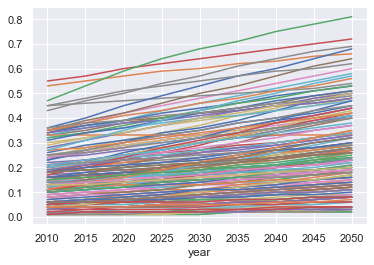

No data to plot.
We have data between 2010 and 2050.
The exact years are :
['2010' '2015' '2020' '2025' '2030' '2035' '2040' '2045' '2050']

We have data for the 166 countries. 
The countries are :
['ABW' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'CAF' 'CAN'
 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB'
 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN'
 'FRA' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LCA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'PAK' 'PAN' 'PER' 'PHL' 'POL'
 'PRI' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN' 'SEN'

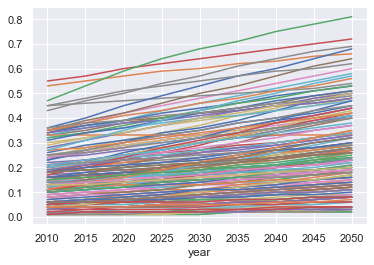

No data to plot.
We have data between 2010 and 2050.
The exact years are :
['2010' '2015' '2020' '2025' '2030' '2035' '2040' '2045' '2050']

We have data for the 166 countries. 
The countries are :
['ABW' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BTN' 'CAF' 'CAN'
 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB'
 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN'
 'FRA' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR'
 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LCA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'PAK' 'PAN' 'PER' 'PHL' 'POL'
 'PRI' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN' 'SEN'

In [115]:
ind = 'PRJ.ATT.25UP.4.MF'
initial_investigation(ind, is_projection_data = True )[0].T.info()

#### Résumé: PRJ.ATT.25UP.4.MF
* Pour 166 pays, il y a de la data pour les années 2010-2050 (en intervales de 5 ans).
    * 51 des 217 pays n'ont pas de data pour cette variable.
* Il n'y a pas de la data pour les régions.
* **La data pour cette variable est complète à 100% (par construction)**

The following countries were dropped :
['AFG', 'AGO', 'AND', 'ASM', 'ATG', 'BMU', 'BRB', 'BRN', 'BWA', 'CHI', 'CUW', 'CYM', 'DJI', 'DMA', 'EAS', 'ECS', 'ERI', 'FJI', 'FRO', 'FSM', 'GIB', 'GRD', 'GRL', 'GUM', 'IMN', 'KIR', 'KNA', 'LBY', 'LCN', 'LIE', 'LKA', 'MAF', 'MCO', 'MEA', 'MHL', 'MNP', 'MRT', 'NAC', 'NRU', 'OMN', 'PLW', 'PNG', 'PRK', 'SAS', 'SLB', 'SMR', 'SSD', 'SSF', 'SXM', 'SYC', 'TCA', 'TGO', 'TUV', 'UZB', 'VGB', 'VIR', 'XKX', 'YEM']


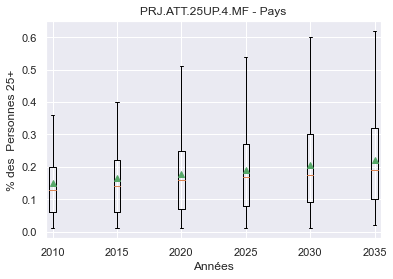

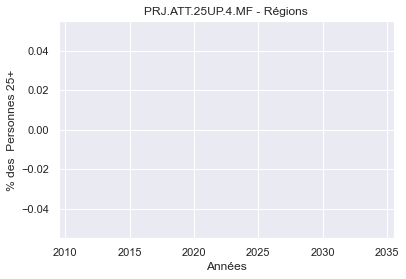

2020
Pays
Median:  0.16
Mean:  0.17789156626506025
Std:  0.1294829355363389


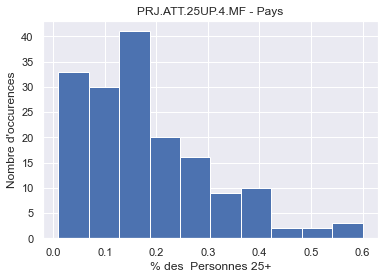

Régions
Median:  nan
Mean:  nan
Std:  nan


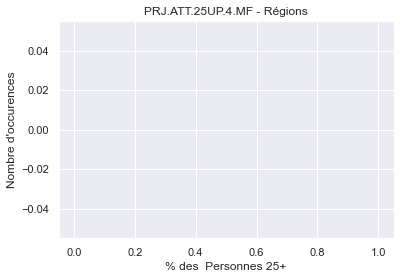

2025
Pays
Median:  0.17
Mean:  0.1916265060240964
Std:  0.13729112715759528


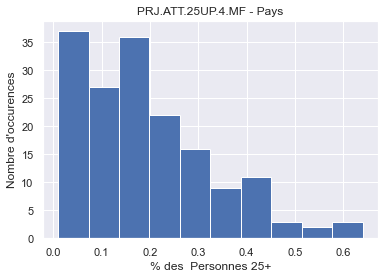

Régions
Median:  nan
Mean:  nan
Std:  nan


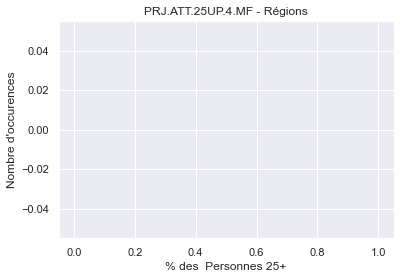

In [116]:
years = [str(y) for y in range(2010, 2036, 5)]
data = make_2D_map(DATA, ind, ['indicator', 'year'], 'country').drop(columns = ['indicator']).set_index('year').loc[years, :]
data_clean = drop_countries(data, 3)
plot_boxplot(ind, data_clean, unit = "% des  Personnes 25+", years = years, showmeans = True, showfliers = False)
print_info_year('2020', data_clean, unit = "% des  Personnes 25+", ind = ind)
print_info_year('2025', data_clean, unit = "% des  Personnes 25+", ind = ind)

#### Résumé: PRJ.ATT.25UP.4.MF
* Pour l'année 2020 **la médian, le moyenne et l'écart-type sont 16.0%, 17.8% et 12.9% des Personnes 25+ pour les pays**
* Pour l'année 2025 **la médian, le moyenne et l'écart-type sont 17.0%, 19.2% et 13.7% des Personnes pour les pays**
* Cette variable donne une indication sur le niveau d'education d'un pays - le percentages des personnes 25+ avec une degrée d'education de BAC+ (post secondary)

In [117]:
#save the cleaned data
data_clean['indicator'] = ind
DATA_CLEAN = DATA_CLEAN.append(deconstruct_df(data_clean.copy().reset_index().rename(columns={'index':'year'})))
DATA_CLEAN = DATA_CLEAN.drop_duplicates()
DATA_CLEANED = DATA.set_index(INDEX_NAMES).fillna(value = DATA_CLEAN.set_index(INDEX_NAMES)).reset_index()

### 4.3 Re-filtrer les pays
Choisir les pays qui ont assez de données et qui ont une population plus large que 500 000 inhabitants.

In [118]:
my_indicators = ['IT.NET.USER.P2',
                 'SP.TER.TOTL.IN', 'SE.TER.ENRL', 'SE.TER.ENRR',
                 'SP.SEC.UTOT.IN', 'UIS.E.3', 'SE.SEC.ENRR.UP',
                 'NY.GDP.PCAP.CD',
                 'SP.POP.TOTL']
my_indicators_proj = ['PRJ.POP.ALL.4.MF', 'PRJ.ATT.25UP.4.MF']

my_years = [str(y) for y in range(2010, 2017)]
my_years_proj = [str(y) for y in range(2010,2036,5)]

select =  [i and j for i, j in zip(DATA.indicator.isin(my_indicators),DATA.year.isin(my_years))]
select_proj = [i and j for i, j in zip(DATA.indicator.isin(my_indicators_proj),DATA.year.isin(my_years_proj))]

DATA_MIN = DATA[select]
DATA_MIN_CLEANED = DATA_CLEANED[select]

DATA_MIN_LAST = DATA_MIN.set_index(['country', 'indicator']).sort_values(by=['year']).dropna()
DATA_MIN_LAST = DATA_MIN_LAST[[not d for d in DATA_MIN_LAST.index.duplicated(keep='last')]].reset_index()
DATA_MIN_PROJ = DATA[select_proj].dropna()

In [119]:
def indicators_per_country(my_indicators, frac = 0.5, output = True):
    data = DATA_MIN_LAST[DATA_MIN_LAST.indicator.isin(my_indicators)]
    num_ind_cc = {} 
    for cc in data.country.unique():
        num_ind_cc[cc] = data[data.country == cc].value.count().sum()
        
    if output:
        print("Number of countries with at least one indicator:",len(data.country.unique()))
        cc_complete = []
        cc_morefrac = []
        cc_lessfrac = []
        num_ind = len(my_indicators)
        for cc, n in num_ind_cc.items() :
            if n == num_ind :
                cc_complete.append(cc)
            elif n >= num_ind*frac :
                cc_morefrac.append(cc)
            else :
                cc_lessfrac.append(cc)
        print("For these countries we have data for all the indicators:\n", cc_complete)
        print(f"For these countries we have more than {frac*100}% of the indicators:\n", cc_morefrac)
        print(f"For these countries we have less than {frac*100}% of the indicators:\n", cc_lessfrac)    
    
    return data, num_ind_cc


def fill_in_education_indicator(my_indicators, output = False) :
    '''function used only in two very specific cases'''
    data, num_ind_cc = indicators_per_country(my_indicators, frac = 0.5, output = output)
    cc_list1 = [cc for cc, n in num_ind_cc.items() if n == len(my_indicators)]
    data_frame = pd.DataFrame()
    for cc in cc_list1 :
        #print(cc, num_ind_cc[cc], sep=": ")
        country_indicators = data[data.country == cc].indicator.values
        #print("The indicators available are", country_indicators, sep=":\n")
        data_row = {}
        for ind in my_indicators:
            if ind not in country_indicators:
                data_row['indicator'] = ind
                data_row['country'] = cc
                data_row['year'] = 'XXXX'
                if ind == my_indicators[1]:
                    val = (data[data.country == cc][data.indicator == my_indicators[0]].value.values[0]*
                           data[data.country == cc][data.indicator == my_indicators[2]].value.values[0])
                elif ind == my_indicators[2]:
                    val = (data[data.country == cc][data.indicator == my_indicators[1]].value.values[0]/
                           data[data.country == cc][data.indicator == my_indicators[0]].value.values[0])
                elif ind == my_indicators[0]:
                    val = (data[data.country == cc][data.indicator == my_indicators[1]].value.values[0]/
                           data[data.country == cc][data.indicator == my_indicators[2]].value.values[0])
                data_row['value'] = val
                data_frame = data_frame.append(data_row, ignore_index = True) 
    return DATA_MIN_LAST.append(data_frame, ignore_index = True)

In [120]:
#These indicators are linked, if only one is missing use the other two to fill in the value.
my_indicators = ['SP.TER.TOTL.IN', 'SE.TER.ENRL', 'SE.TER.ENRR']
DATA_MIN_LAST = fill_in_education_indicator(my_indicators)
my_indicators = ['SP.SEC.UTOT.IN', 'UIS.E.3', 'SE.SEC.ENRR.UP']
DATA_MIN_LAST = fill_in_education_indicator(my_indicators)

In [121]:
my_indicators = ['IT.NET.USER.P2', 'SE.TER.ENRR','SE.TER.ENRL','NY.GDP.PCAP.CD', 'SP.POP.TOTL']
data, num_ind_cc = indicators_per_country(my_indicators, output = False)
my_countries = [cc for cc, n in num_ind_cc.items() if n == len(my_indicators) and cc in COUNTRIES]
my_regions = [cc for cc, n in num_ind_cc.items() if n == len(my_indicators) and cc in REGIONS]
data = data[data.country.isin(my_countries)]
data = data[data.indicator == 'SP.POP.TOTL']
my_countries = data[data.value >= 500000].country.unique()
print(len(my_countries))
print(len(my_regions))

143
7


### 4.4 Le Score
* Définir un score sur une échelle de 0 et 10 pour les variables pertiantes. 
* Faire un score total et classer les pays.

#### Le Score d'Attractivité
* L'usage d'internet et le niveau d'education d'un pays.
    * Personnes qui ont utilisé l'internet par 100 inhabitants (**IT.NET.USER.P2**). Par construction cette variable est entre 0 et 100.
    * Etudiants inscrits dans l'education tertaire par la population avec la tranche d'âge correspondent (**SE.TER.ENRR**). Cette variable peut être plus grande que 100, parce qu'il peut avoir des personnes en dehors de la tranche d'âge inscrites. Cependent la valeur maximum va être "proche" de 100, i.e. avoir la même ordre de magnitude.
* Ces deux variables sont normalisées.
* Utiliser un score linéaire entre 0 et 100. 
    * Pour les valeurs plus grandes que 100 on va donner un 10. (pour SE.TER.ENRR)

#### Le Score de Marché
* Le nombre de potentiels clients et leur pouvoir d'âchat 
    * L'nombre de personnes inscrites dans l'education tertiaire (**SE.TER.ENRL**). Cette variable n'est pas normalisées et varie beaucoup entre les différents pays.
    * La PIB per inhabitant  (**NY.GDP.PCAP.CD**). Cette variable est normalisée par inhabitant, mais peut prendre n'importe quel valeur et varie beaucoup entre les differents pays.
* Utiliser un score exponentiel 

#### 4.4.1 Quels fonctions

In [122]:
def score_lin(data_series, maxvalue=None, minvalue=None, name = None):
    data_values = data_series.values
    
    if maxvalue == None:
        maxvalue = max(data_values)
    if minvalue == None:
        minvalue = min(data_values)

    vals = [v if isinstance(v,(float, int)) and v >= minvalue else minvalue for v in data_values ]
    vals = [v if v <= maxvalue else maxvalue for v in vals]
    scale = 10/(maxvalue-minvalue)
    scores = [(v-minvalue)*scale for v in vals]
    #for v in vals :
     #   print(v*scale, (v-minvalue)*scale, (((v-minvalue)*scale) // 10) )
    
    
    #scores = [(v-minvalue)*scale
    #          if 0 <= (v-minvalue)*scale <= 10
    #          else 10*( (((v-minvalue)*scale) // 10) >= 1 )
    #          for v in vals]
    
    data_scores = pd.Series(scores, index = data_series.index, name = name)
    return data_scores

def score_pow(data_series, maxvalue=None, minvalue=None, name = None):
    data_values = data_series.values
    
    if maxvalue == None :
        maxvalue = max(data_values)
    if minvalue == None :
        minvalue = maxvalue/1024
        base = 2
    else :
        base = (maxvalue/minvalue)**(0.1) 
    norm = 10 - math.log(maxvalue, base)
    
    vals = [v if v >= minvalue and isinstance(v,(float, int)) else minvalue for v in data_values]
    vals = [v if v <= maxvalue else maxvalue for v in vals]
    scores = [math.log(v,base) + norm for v in vals]
    
    #scores = [math.log(v, base) + norm
    #          if 0 <= math.log(v,base) + norm <= 10
    #         else 10*( ((math.log(v, base) + norm) // 10) >= 1 )
    #         for v in vals]
    
    data_scores = pd.Series(scores, index = data_series.index, name = name)
    return data_scores

In [123]:
def output_data(years, countries) :
    data_df = DATA_MIN_LAST
    data_df['year'] = 'LAST'
    data_df = data_df.set_index(INDEX_NAMES)
    data_df = pd.concat([data_df, DATA_MIN_CLEANED.set_index(INDEX_NAMES)]).sort_values(INDEX_NAMES).reset_index()
    select = [i and j for i, j in zip(data_df.country.isin(countries), data_df.year.isin(years))]
    data_df = data_df[select]
    return data_df

def output_data_scores(data_df, score_dict):
    data_all_scores = pd.DataFrame()
    groups = []
    suffix = '_Score'
    
    for ind,p in score_dict.items() :
        data_series = data_df[data_df.indicator == ind].drop(columns = ('indicator')).set_index(['country','year'])
        
        p0 = p[1:3]
        name0 = ind + suffix
        score_func = score_lin if p[0] else score_pow
        
        data_series_score = data_series.copy()
        for y in data_df.year.unique():
            df_tmp = pd.DataFrame(score_func(data_series.xs(y, level='year').value, *p0, name = 'value'))
            df_tmp['year'] = y
            df_tmp = df_tmp.set_index('year', append = True)
            data_series_score.update(df_tmp)
        data_series_score = data_series_score.rename(columns = {'value' : name0})
        data_all_scores = pd.concat([data_all_scores, data_series_score], axis = 1)
        
        groups.append(p[3])
    
    groups = list(set(groups))
    for g in groups :
        ind_in_group = [ind + suffix for ind, p in score_dict.items() if p[3] == g]
        data_series = pd.DataFrame(data_all_scores.loc[:,ind_in_group].T.mean(), columns = [g + suffix])
        data_all_scores = pd.concat([data_all_scores, data_series], axis = 1)
    
    score_groups = [g + suffix for g in groups]
    data_series = pd.DataFrame(data_all_scores.loc[:,score_groups].T.mean(), columns = ['Total' + suffix])
    data_all_scores = pd.concat([data_all_scores, data_series], axis = 1)
        
    return data_all_scores

In [124]:
def make_2D_dataarray(data_df, x, x_column):
    ind = x
    data_df = data_df[data_df[x_column]== ind].drop(columns = [x_column])
    data_out = pd.DataFrame()
    y_column = INDEX_NAMES[(INDEX_NAMES.index(x_column) + 1) % 3]
    z_column = INDEX_NAMES[(INDEX_NAMES.index(x_column) + 2) % 3]

    for z in data_df[z_column].unique() :
        data_series = data_df[data_df[z_column] == z]
        data_tmp = pd.concat([data_series[data_series[y_column] == y].set_index(z_column).drop(columns = [y_column]).rename(columns = {'value' : y}) 
                                for y in data_series[y_column].unique()], axis = 1)
        data_out = pd.concat([data_out, data_tmp])
    
    return data_out

In [125]:
def plot_boxplot2(ind, data_df, unit = "", savefigures = False, **kwags) :

    for countries, titlename in zip([COUNTRIES, REGIONS], ["Pays","Régions"]) :
        
        data_plot = data_df[data_df.country.isin(countries)] 
        data_plot = make_2D_dataarray(data_plot, ind, 'indicator').T

        fig, ax = plt.subplots()
        data_years = data_plot.columns.values
        ax.boxplot(data_plot.values, **kwags)
        #ax.plot(data_years, data_plot.mean().values,'o', alpha=0.5, color = 'black')
        ax.set_xlabel("Années")
        ax.set_xticklabels(data_years)
        ax.set_ylabel(unit)
        title = " - ".join((ind, titlename))
        ax.set_title(title)
        if savefigures :
            plt.savefig(os.getcwd() + '\\Figures\\' + title.replace('.','_') + '_Boxplot', dpi = 200)
        plt.show()

In [126]:
def output_info(ind, data_df, saveinfo = False):
    data_all = pd.DataFrame()
    for countries, titlename in zip([COUNTRIES, REGIONS], ["Countries","Regions"]) :
        #print(ind, titlename, sep = ' - ')
        data_out = make_2D_dataarray(data_df[data_df.country.isin(countries)], ind, 'indicator').T
        data_out = pd.concat([data_out.median(),data_out.mean(), data_out.std()], axis = 1, 
                             keys = ['Median - '+titlename, 'Mean - '+titlename, 'Std - '+titlename])
        data_all = pd.concat([data_all, data_out], axis = 1)
        
        if saveinfo :
            data_all.to_csv(os.getcwd() + '\\Output\\' + ind.replace('.','_'))
            
        
    return (data_all)

In [127]:
def plot_histogramm(ind, data_df, unit = '', savefigures = False, **kwags):
        
        for y in data_df.year.unique() :
            data_tmp = data_df[data_df.year == y]
            
            for countries, titlename in zip([COUNTRIES, REGIONS], ["Pays","Régions"]) :

                data_plot = data_tmp[data_tmp.country.isin(countries)] 
                data_plot = make_2D_dataarray(data_plot, ind, 'indicator').T

                fig, ax = plt.subplots()
                data_years = data_plot.columns.values
                ax.hist(data_plot.values, **kwags)

                ax.set_xlabel(unit)
                ax.set_ylabel("Fréquence")
                title = " - ".join(("_".join((ind, y)), titlename))
                ax.set_title(title)
                if savefigures :
                    plt.savefig(os.getcwd() + '\\Figures\\' + title.replace('.','_') + '_Histogram', dpi = 200)
                plt.show()

#### Les indicateurs résumées
* Donner des informations statistiques sur les différents variables
* Illustrer le jeu de données avec des graphs
* Sauvegarder les informations (si souhaité)

In [128]:
years = ['LAST','2014','2016']
countries = list(my_countries) + list(my_regions)

data_df = output_data(years = ['LAST','2014','2016'], countries = list(my_countries) + list(my_regions))

#regarder soit les minimum / maximum valeurs pour déterminer les limites pour le scoring
data_tmp = data_df[data_df.indicator == 'NY.GDP.PCAP.CD'].sort_values('value', ascending = False)
data_tmp[data_tmp.country.isin(my_countries)].head(20)

indicator country  year          value
2731  NY.GDP.PCAP.CD     LUX  2014  119225.380023
2734  NY.GDP.PCAP.CD     LUX  LAST  100573.139978
2733  NY.GDP.PCAP.CD     LUX  2016  100573.139978
2977  NY.GDP.PCAP.CD     NOR  2014   97199.919096
2747  NY.GDP.PCAP.CD     MAC  2014   94004.389829
3118  NY.GDP.PCAP.CD     QAT  2014   86852.710189
2047  NY.GDP.PCAP.CD     CHE  2014   86605.563376
2050  NY.GDP.PCAP.CD     CHE  LAST   79890.524005
2049  NY.GDP.PCAP.CD     CHE  2016   79890.524005
2750  NY.GDP.PCAP.CD     MAC  LAST   73186.960143
2749  NY.GDP.PCAP.CD     MAC  2016   73186.960143
2980  NY.GDP.PCAP.CD     NOR  LAST   70911.757159
2979  NY.GDP.PCAP.CD     NOR  2016   70911.757159
2517  NY.GDP.PCAP.CD     IRL  2016   63861.921982
2518  NY.GDP.PCAP.CD     IRL  LAST   63861.921982
2204  NY.GDP.PCAP.CD     DNK  2014   62548.985017
1863  NY.GDP.PCAP.CD     AUS  2014   62214.609121
3120  NY.GDP.PCAP.CD     QAT  2016   59324.338773
3121  NY.GDP.PCAP.CD     QAT  LAST   59324.338773
3286  NY.GDP.PCAP.CD     SWE  2014   59180.198978

**************************************************
NY.GDP.PCAP.CD

      Median - Countries  Mean - Countries  Std - Countries  Median - Regions  \
year                                                                            
2014         5466.425778      15066.700239     22230.759086       9665.056079   
2016         4529.139412      13224.698980     18935.682184       8311.370178   
LAST         4529.139412      13197.756712     18922.843114       8311.370178   

      Mean - Regions  Std - Regions  
year                                 
2014    16009.026713   18724.941880  
2016    15244.838505   19296.324162  
LAST    15244.838505   19296.324162  


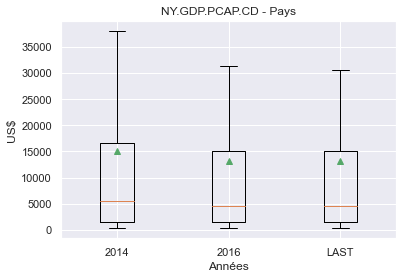

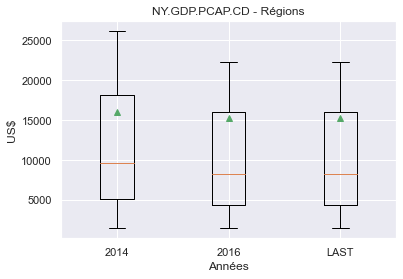

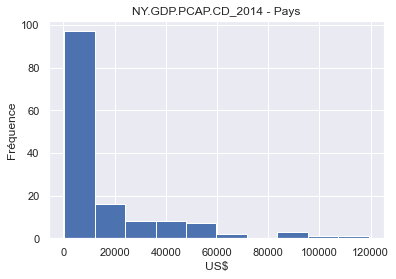

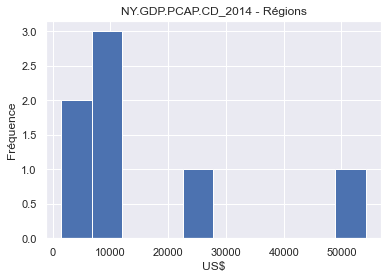

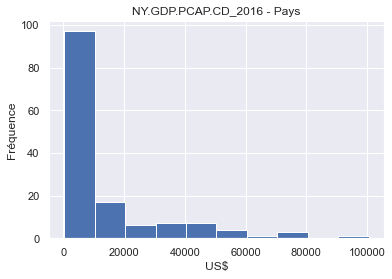

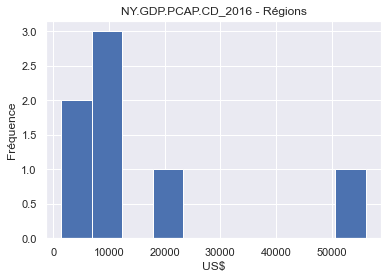

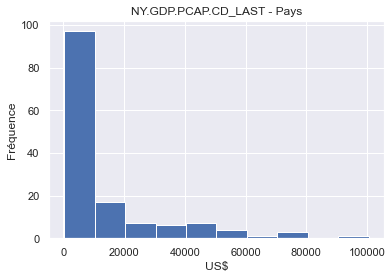

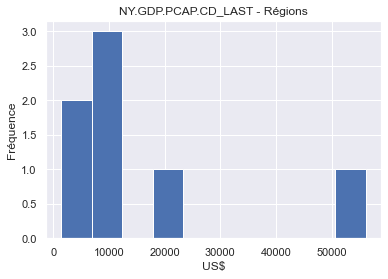

**************************************************
**************************************************
SE.TER.ENRL

      Median - Countries  Mean - Countries  Std - Countries  Median - Regions  \
year                                                                            
2014            253602.0      1.425259e+06     4.695593e+06        24087544.0   
2016            239260.0      1.460406e+06     5.018008e+06        24503504.0   
LAST            261413.0      1.435061e+06     4.851943e+06        24087544.0   

      Mean - Regions  Std - Regions  
year                                 
2014    2.964508e+07   2.021267e+07  
2016    3.210922e+07   2.550535e+07  
LAST    2.964508e+07   2.021267e+07  


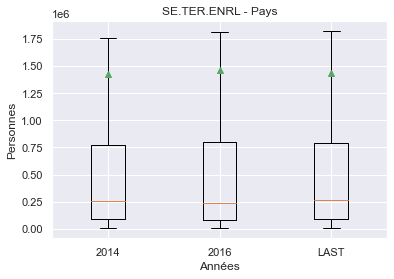

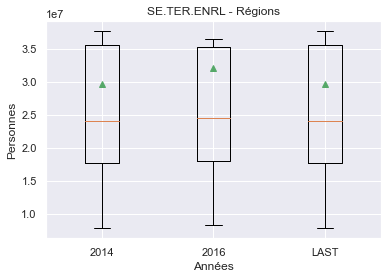

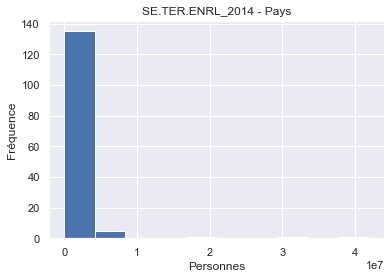

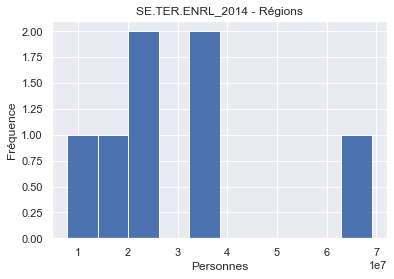

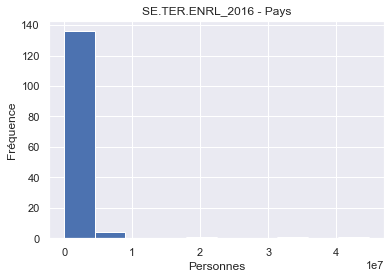

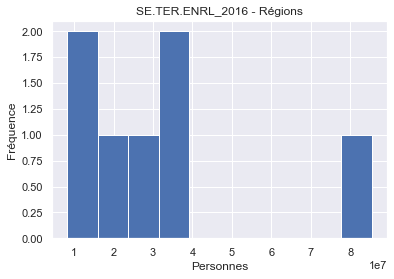

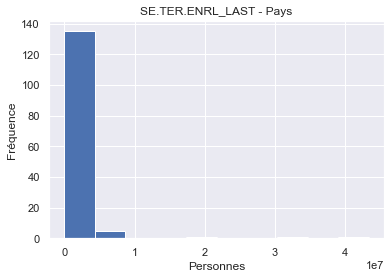

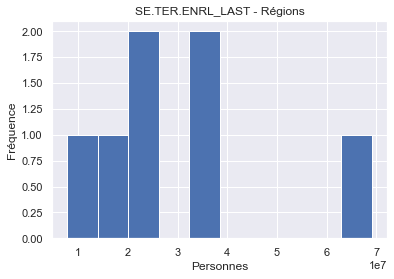

**************************************************
**************************************************
IT.NET.USER.P2

      Median - Countries  Mean - Countries  Std - Countries  Median - Regions  \
year                                                                            
2014           44.920000         44.470066        28.757639         46.812103   
2016           53.226178         50.191637        28.448887         52.796321   
LAST           53.226178         50.191637        28.448887         52.796321   

      Mean - Regions  Std - Regions  
year                                 
2014       44.701409      22.600324  
2016       50.672946      21.738012  
LAST       50.672946      21.738012  


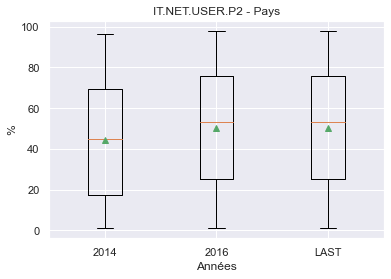

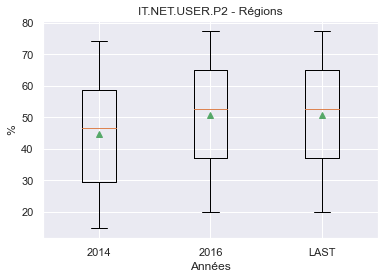

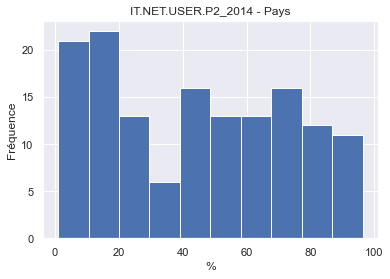

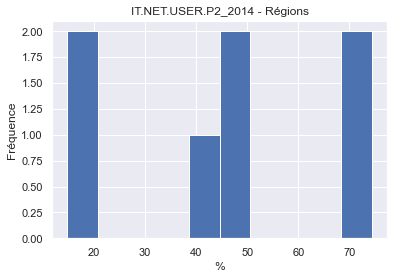

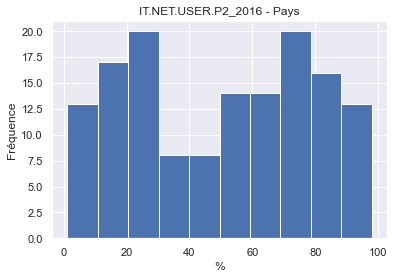

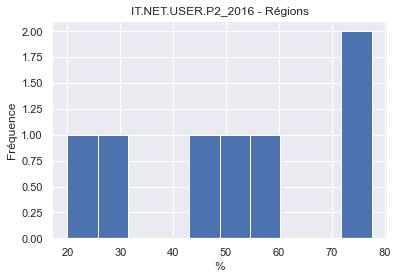

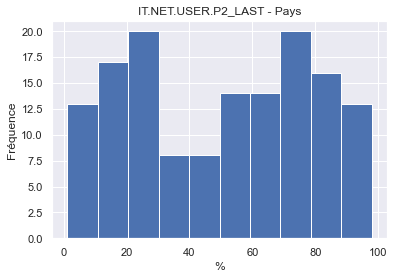

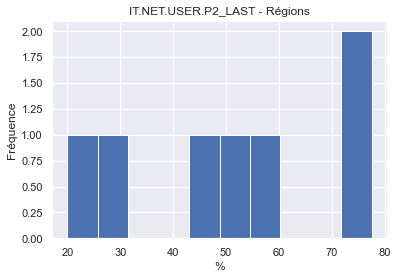

**************************************************
**************************************************
SE.TER.ENRR

      Median - Countries  Mean - Countries  Std - Countries  Median - Regions  \
year                                                                            
2014           34.593811         39.230695        28.292627         39.147720   
2016           34.608745         40.028632        29.183303         44.970909   
LAST           36.280399         39.448677        28.579777         39.147720   

      Mean - Regions  Std - Regions  
year                                 
2014       42.896155      25.460831  
2016       45.127248      24.706675  
LAST       42.896155      25.460831  


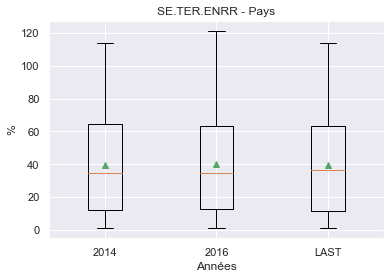

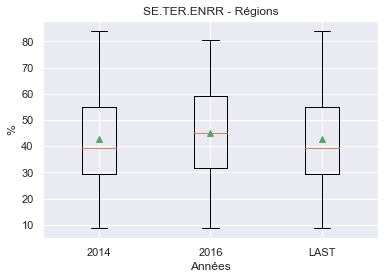

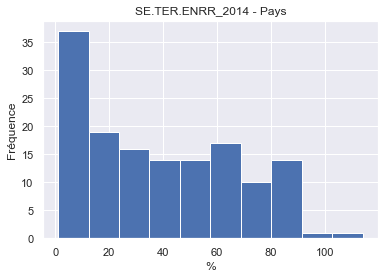

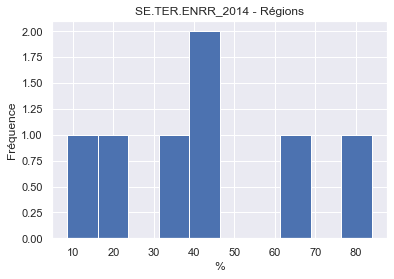

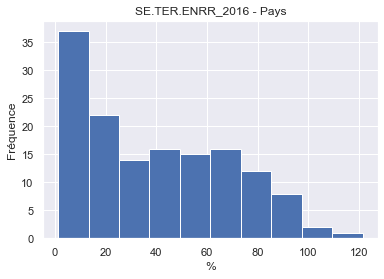

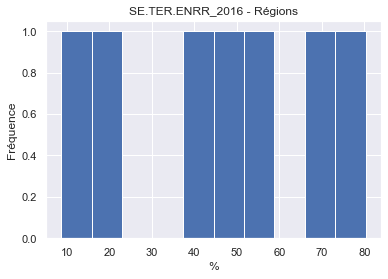

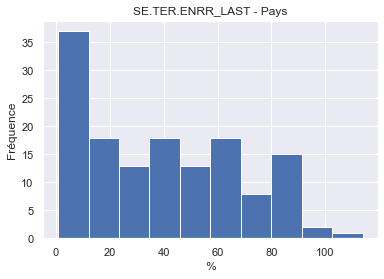

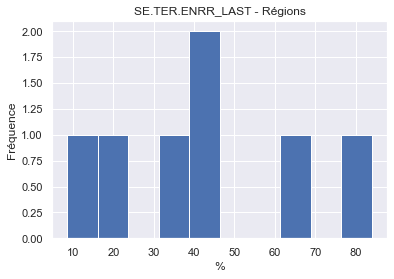

**************************************************


In [129]:
score_dict = {'NY.GDP.PCAP.CD' : (False, 5e4, 500, 'Market', 'US$'), 'SE.TER.ENRL' : (False, 1e6, 1e3, 'Market', 'Personnes'), 
              'IT.NET.USER.P2' : (True, 100, 0, 'Attr', '%'), 'SE.TER.ENRR' : (True, 100, 0, 'Attr', '%')}

#afficher (et si souhaité sauvgarder) les informations statistiques sur les indicateurs
for ind in score_dict :
    print(50*'*')
    print(ind)
    print()
    print(output_info(ind, data_df))
    plot_boxplot2(ind, data_df, unit = score_dict[ind][4],showmeans = True, showfliers = False)
    plot_histogramm(ind, data_df, unit = score_dict[ind][4])
    print(50*'*')

#### 4.4.3 Le Score
Faire un scoring des pays et choisir les 15 top pays

In [130]:
#faire le scoring avec les parameter dans score_dict
data_scores_df = output_data_scores(data_df, score_dict)
print(data_scores_df)

              NY.GDP.PCAP.CD_Score  SE.TER.ENRL_Score  IT.NET.USER.P2_Score  \
country year                                                                  
AFG     2014              0.439154           8.065825              0.700000   
        2016              0.252977           8.572831              1.059573   
        LAST              0.252977           8.065825              1.059573   
AGO     2014              4.869937           7.807141              1.020000   
        2016              4.103437           7.822584              1.300000   
...                            ...                ...                   ...   
ZMB     2016              2.023439           5.935927              2.550658   
        LAST              2.023439           5.844766              2.550658   
ZWE     2014              1.571664           6.867040              1.636474   
        2016              1.567389           7.313243              2.311999   
        LAST              1.567389           7.10726

In [131]:
#selectionner les top 15 pays et afficher leurs noms
data_scores_df_sorted = data_scores_df.xs('2016', level='year').sort_values('Total_Score', ascending = False)
top_fifteen = [top for top in data_scores_df_sorted.index.values[:22]
               if top in my_countries][:15]
list_countrynames(top_fifteen)
data_scores_df_sorted[data_scores_df_sorted.index.get_level_values('country').isin(top_fifteen)].iloc[:,-3:]

AUS Australia
KOR Korea
NLD Netherlands
DNK Denmark
USA United States
ESP Spain
DEU Germany
NOR Norway
FIN Finland
AUT Austria
JPN Japan
NZL New Zealand
IRL Ireland
BEL Belgium
FRA France


Market_Score  Attr_Score  Total_Score
country                                       
AUS          9.998431    9.364418     9.681425
KOR          9.352438    9.242790     9.297614
NLD          9.791560    8.734016     9.262788
DNK          9.188947    9.048235     9.118591
USA         10.000000    8.055345     9.027673
ESP          9.316400    8.542451     8.929425
DEU          9.812496    8.040827     8.926662
NOR          9.058293    8.695528     8.876910
FIN          8.972189    8.681106     8.826648
AUT          9.268092    8.371516     8.819804
JPN          9.727465    7.867732     8.797598
NZL          8.818556    8.773177     8.795866
IRL          8.921436    8.620904     8.771170
BEL          9.308454    8.164522     8.736488
FRA          9.668815    7.734754     8.701784

In [132]:
def plot_countryindictors_vs_years(ind, data_df, unit = '', savefigures = False, *kwags) :
    data_plot = make_2D_dataarray(data_df, ind, 'indicator')
    data_plot = data_plot.sort_values(max(data_plot.index.values), axis = 1, ascending = False)
    #print(data_plot)
    fig, ax = plt.subplots()
    ax.plot(data_plot)

    ax.set_xlabel("Année")
    ax.set_ylabel(unit)
    title = ind
    ax.set_title(title)
    ax.legend(data_plot.columns.values, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.tight_layout(pad=0.4, w_pad=1, h_pad=0.5)
    
    if savefigures :
        plt.savefig(os.getcwd() + '\\Figures\\' + title.replace('.','_') + '_Plots', dpi = 200)
    plt.show()
    

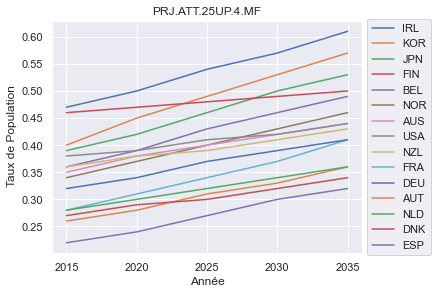

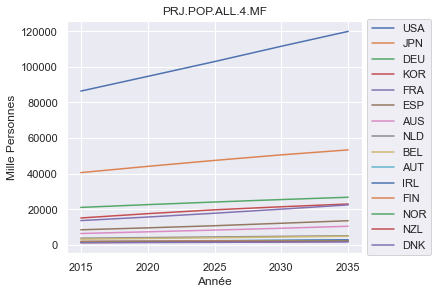

In [133]:
years_proj = ['2015','2020','2025','2030', '2035']
proj_inds = [('PRJ.ATT.25UP.4.MF',' Taux de Population'), ('PRJ.POP.ALL.4.MF', 'Mille Personnes')]

data_df_proj = DATA_MIN_PROJ
select = [i and j for i, j in zip(data_df_proj.country.isin(top_fifteen), 
                                  data_df_proj.year.isin(years_proj))]
data_df_proj = data_df_proj[select]

for t in proj_inds :
    plot_countryindictors_vs_years(t[0], data_df_proj, savefigures=True, unit = t[1])

In [134]:
#look at the projected growth rate
data_df_proj_growth = pd.DataFrame()
for ind in ['PRJ.ATT.25UP.4.MF','PRJ.POP.ALL.4.MF', ] :
    data_tmp = data_df_proj[data_df_proj.indicator == ind].drop(columns = ['indicator']).set_index('country')
    data_tmp[data_tmp.year == '2035'].values 
    data_tmp1 = (data_tmp[data_tmp.year == '2035'].drop(columns = ['year']) - data_tmp[data_tmp.year == '2015'].drop(columns = ['year']))
    data_tmp1 = data_tmp1 / data_tmp[data_tmp.year == '2015'].drop(columns = ['year'])
    data_tmp1 = data_tmp1.rename(columns = {'value' : ind + "_GrowthRate"})
    data_df_proj_growth = pd.concat([data_df_proj_growth, data_tmp1], axis = 1)

data_df_proj_growth_score = data_df_proj_growth.T.mean().rename('Proj_GrowthRate_Score')
data_df_proj_growth = pd.concat([data_df_proj_growth, data_df_proj_growth_score], axis = 1)
print(data_df_proj_growth)
data_df_proj_growth.sort_values('Proj_GrowthRate_Score',ascending = False)

         PRJ.ATT.25UP.4.MF_GrowthRate  PRJ.POP.ALL.4.MF_GrowthRate  \
country                                                              
AUS                          0.257143                     0.647854   
AUT                          0.384615                     0.479164   
BEL                          0.361111                     0.524315   
DNK                          0.259259                     0.434003   
FIN                          0.086957                     0.193212   
FRA                          0.464286                     0.652579   
DEU                          0.281250                     0.272528   
IRL                          0.297872                     0.631855   
JPN                          0.358974                     0.315325   
KOR                          0.425000                     0.523447   
NLD                          0.285714                     0.374852   
NZL                          0.194444                     0.505462   
NOR                 

PRJ.ATT.25UP.4.MF_GrowthRate  PRJ.POP.ALL.4.MF_GrowthRate  \
country                                                              
FRA                          0.464286                     0.652579   
ESP                          0.454545                     0.610575   
NOR                          0.352941                     0.633566   
KOR                          0.425000                     0.523447   
IRL                          0.297872                     0.631855   
AUS                          0.257143                     0.647854   
BEL                          0.361111                     0.524315   
AUT                          0.384615                     0.479164   
NZL                          0.194444                     0.505462   
DNK                          0.259259                     0.434003   
JPN                          0.358974                     0.315325   
NLD                          0.285714                     0.374852   
DEU                          0.281250                     0.272528   
USA                          0.157895                     0.388915   
FIN                          0.086957                     0.193212   

         Proj_GrowthRate_Score  
country                         
FRA                   0.558433  
ESP                   0.532560  
NOR                   0.493254  
KOR                   0.474224  
IRL                   0.464863  
AUS                   0.452499  
BEL                   0.442713  
AUT                   0.431889  
NZL                   0.349953  
DNK                   0.346631  
JPN                   0.337150  
NLD                   0.330283  
DEU                   0.276889  
USA                   0.273405  
FIN                   0.140084

**************************************************
PRJ.ATT.25UP.4.MF

      Median - Countries  Mean - Countries  Std - Countries  Median - Regions  \
2015                0.35          0.342667         0.072256               NaN   
2020                0.38          0.367333         0.074399               NaN   
2025                0.40          0.394000         0.077533               NaN   
2030                0.42          0.418667         0.080166               NaN   
2035                0.44          0.444667         0.084165               NaN   

      Mean - Regions  Std - Regions  
2015             NaN            NaN  
2020             NaN            NaN  
2025             NaN            NaN  
2030             NaN            NaN  
2035             NaN            NaN  


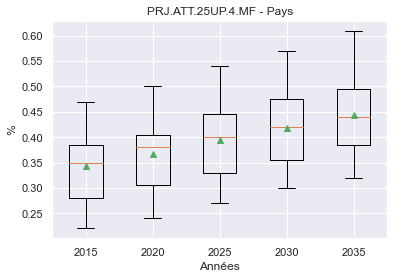

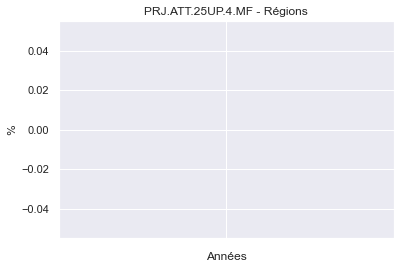

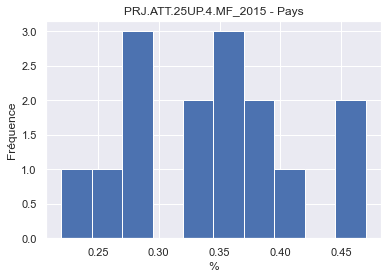

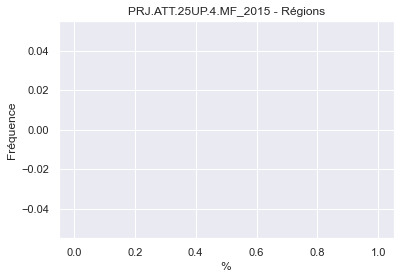

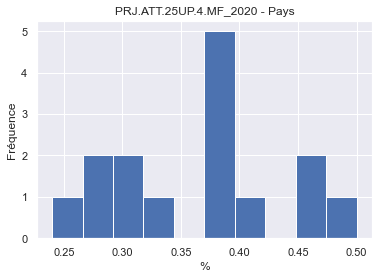

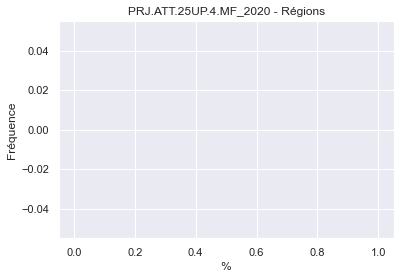

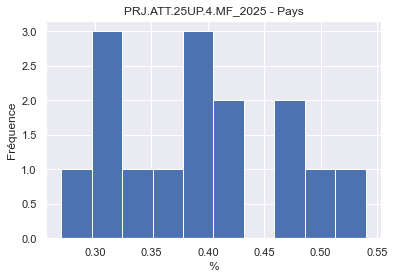

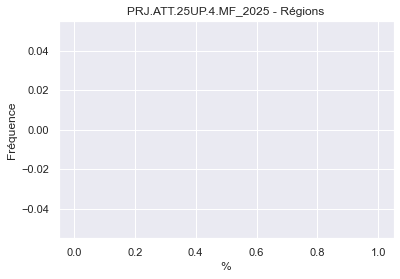

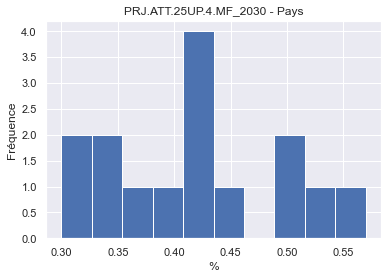

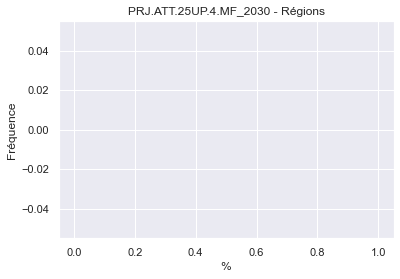

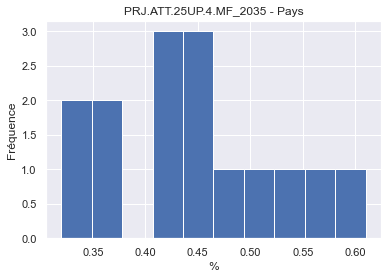

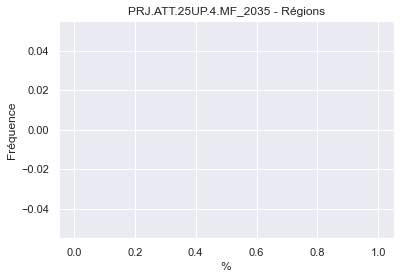

                indicator country  year  value
131763  PRJ.ATT.25UP.4.MF     AUS  2015   0.35
135428  PRJ.ATT.25UP.4.MF     AUT  2015   0.26
161083  PRJ.ATT.25UP.4.MF     BEL  2015   0.36
289358  PRJ.ATT.25UP.4.MF     DNK  2015   0.27
337003  PRJ.ATT.25UP.4.MF     FIN  2015   0.46
...                   ...     ...   ...    ...
604548  PRJ.ATT.25UP.4.MF     NLD  2035   0.36
611878  PRJ.ATT.25UP.4.MF     NZL  2035   0.43
630203  PRJ.ATT.25UP.4.MF     NOR  2035   0.46
747483  PRJ.ATT.25UP.4.MF     ESP  2035   0.32
850103  PRJ.ATT.25UP.4.MF     USA  2035   0.44

[75 rows x 4 columns]
**************************************************
**************************************************
PRJ.POP.ALL.4.MF

      Median - Countries  Mean - Countries  Std - Countries  Median - Regions  \
2015             3635.41      13777.822667     22755.978931               NaN   
2020             3979.74      15214.305333     24877.310269               NaN   
2025             4334.84      16640.942667     269

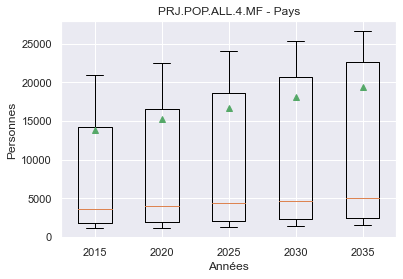

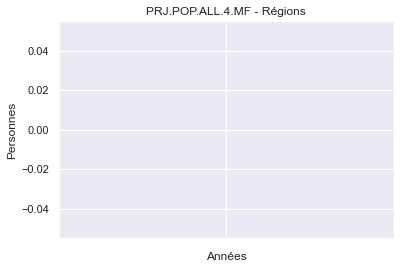

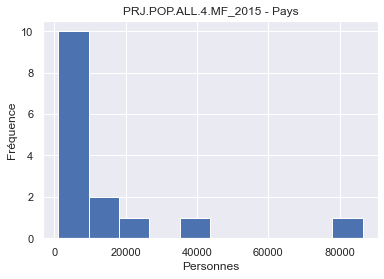

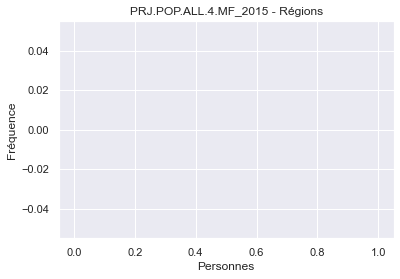

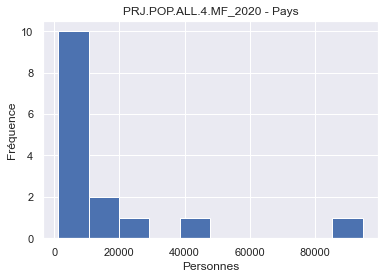

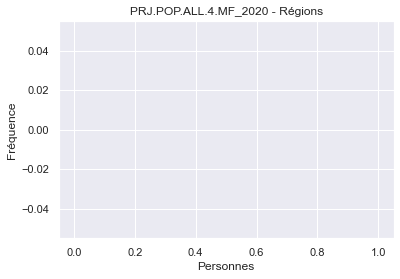

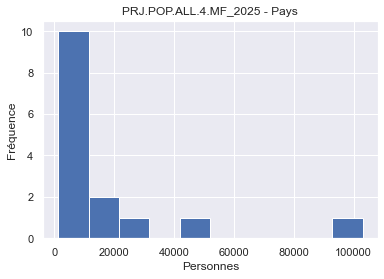

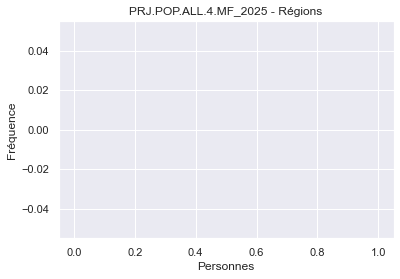

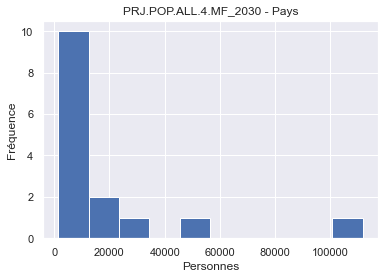

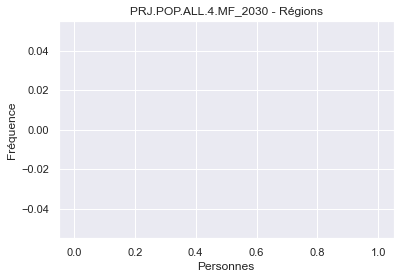

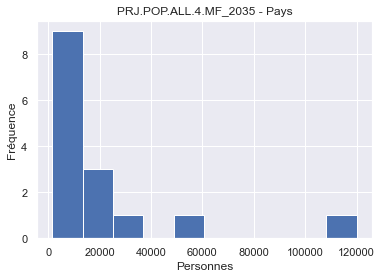

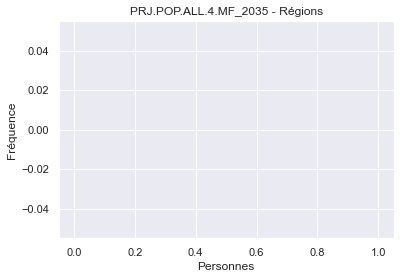

               indicator country  year      value
131925  PRJ.POP.ALL.4.MF     AUS  2015    6276.89
135590  PRJ.POP.ALL.4.MF     AUT  2015    1817.25
161245  PRJ.POP.ALL.4.MF     BEL  2015    3107.79
289520  PRJ.POP.ALL.4.MF     DNK  2015    1084.90
337165  PRJ.POP.ALL.4.MF     FIN  2015    1843.21
...                  ...     ...   ...        ...
604710  PRJ.POP.ALL.4.MF     NLD  2035    4998.15
612040  PRJ.POP.ALL.4.MF     NZL  2035    1827.51
630365  PRJ.POP.ALL.4.MF     NOR  2035    2089.07
747645  PRJ.POP.ALL.4.MF     ESP  2035   13469.87
850265  PRJ.POP.ALL.4.MF     USA  2035  119972.68

[75 rows x 4 columns]
**************************************************


In [135]:
score_dict_proj = {'PRJ.ATT.25UP.4.MF' : (True, 0.6, 0, 'Proj', '%'), 'PRJ.POP.ALL.4.MF' : (False, 1e5, 10, 'Proj', 'Personnes')}
for ind, vals in score_dict_proj.items() :
    print(50*'*')
    print(ind)
    print()
    print(output_info(ind, data_df_proj, saveinfo = False))
    plot_boxplot2(ind, data_df_proj, unit = vals[4], savefigures = False, showmeans = True, showfliers = False)
    plot_histogramm(ind, data_df_proj, unit = vals[4], savefigures = False)
    print(data_df_proj[data_df_proj.indicator == ind])
    print(50*'*')

         PRJ.ATT.25UP.4.MF_Score  PRJ.POP.ALL.4.MF_Score  Proj_Score  \
country                                                                
JPN                     8.833333                9.316828    9.075081   
KOR                     9.500000                8.398036    8.949018   
USA                     7.333333               10.000000    8.666667   
IRL                    10.000000                6.066746    8.033373   
DEU                     6.833333                8.565042    7.699187   
FRA                     6.833333                8.374394    7.603864   
AUS                     7.333333                7.536658    7.434996   
BEL                     8.166667                6.688816    7.427741   
FIN                     8.333333                5.855731    7.094532   
NOR                     7.666667                5.799882    6.733275   
ESP                     5.333333                7.823409    6.578371   
NZL                     7.166667                5.654649    6.41

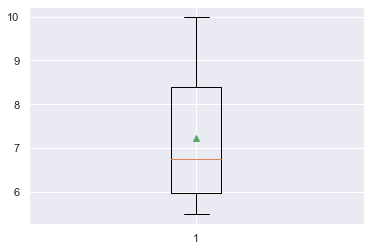

In [136]:
data_scores_df_proj = output_data_scores(data_df_proj, score_dict_proj).reset_index().sort_values(['country', 'year'])
#print(data_scores_df_proj)
plt.boxplot(data_scores_df_proj.loc[data_scores_df_proj.year == '2035', 'PRJ.POP.ALL.4.MF_Score'], showmeans = True)

data_tmp = data_scores_df_proj.set_index(['country', 'year']).xs('2035', level='year').sort_values('Total_Score', ascending = False)
clist = data_tmp.head(20).index.values
print(data_tmp)
list_countrynames(clist)

In [137]:
CURRENT_STOP

NameError: name 'CURRENT_STOP' is not defined